In [1]:
from alpha_vantage.timeseries import TimeSeries
from pprint import pprint
from selenium import webdriver
from bs4 import BeautifulSoup
import edgar
import time
from pathlib import Path
import pandas as pd
import os
import re
from datetime import datetime
from datetime import date
import json
import requests
import sys

In [2]:
key='8NBLCOTKI465W93V'
secKey = "d76154d8c11c709dbdaaa8cdf25c2b69424847ba85f2a569742d588d0d53c8b0"

In [3]:
ts = TimeSeries(key=key, output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='full')
pprint(data.head(2))

                     1. open  2. high  3. low  4. close  5. volume
date                                                              
2022-01-13 20:00:00   305.70    305.7  305.70     305.7     1006.0
2022-01-13 19:59:00   305.69    305.7  305.69     305.7      823.0


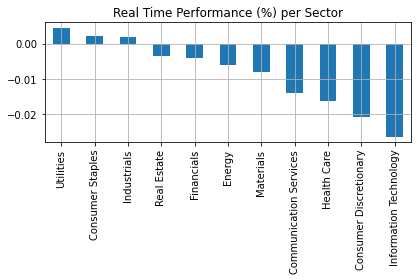

In [4]:
from alpha_vantage.sectorperformance import SectorPerformances
import matplotlib.pyplot as plt

sp = SectorPerformances(key=key, output_format='pandas')
data, meta_data = sp.get_sector()
data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title('Real Time Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show()

In [5]:
import requests
url = 'https://www.alphavantage.co/query?function=GLOBAL_QUOTE&symbol=IBM&apikey=demo'
print(url)

https://www.alphavantage.co/query?function=GLOBAL_QUOTE&symbol=IBM&apikey=demo


In [6]:
r = requests.get(url)
output = r.json()

In [7]:
print(output["Global Quote"]["05. price"])

134.7600


In [8]:
import pandas as pd
from io import StringIO
url = 'https://www.alphavantage.co/query?function=EARNINGS_CALENDAR&symbol=MSFT&horizon=3month&apikey=8NBLCOTKI465W93V'
r = requests.get(url)
content = r.text
print(str(content))

symbol,name,reportDate,fiscalDateEnding,estimate,currency
MSFT,Microsoft Corporation,2022-01-25,2021-12-31,2.31,USD



In [9]:
content = str(content)
f = StringIO(content)
#col_list = ["symbol"]
tbl = pd.read_csv(f, nrows=1)
#print(tbl)
#print(tbl["reportDate"][0])
print (len(tbl["reportDate"]))
if len(tbl["reportDate"]) > 0:
    dateStr = tbl["reportDate"][0]
    print(dateStr)

1
2022-01-25


In [10]:
import datetime
date = datetime.datetime.strptime(dateStr, "%Y-%m-%d").date()
d = date.strftime("%b %d")
print("Output 3:", d)

Output 3: Jan 25


In [11]:
#qtrs = [[1,3],[4,6],[7,9],[10,12]]
months = 12
qtr_len = 3
qtr_no = int(months/qtr_len)
qtrs = list()
start = 0
for i in range(qtr_no):
    qtr = list()
    start = 1 + start
    end = start + 2
    qtr.append(start)
    qtr.append(end)
    qtrs.append(qtr)
    start = end

print(qtrs)
month = 10
for o in qtrs:
    #print (o)
    if month >= o[0] and month <= o[1]:
        print(o)
        break

[[1, 3], [4, 6], [7, 9], [10, 12]]
[10, 12]


In [12]:
def get_qtrs():
    months = 12
    qtr_len = 3
    qtr_no = int(months/qtr_len)
    qtrs = list()
    start = 0
    for i in range(qtr_no):
        qtr = list()
        start = 1 + start
        end = start + 2
        qtr.append(start)
        qtr.append(end)
        qtrs.append(qtr)
        start = end
    return qtrs

In [13]:
def get_qtr_range(month, qtrs):
    #print(month)
    for o in qtrs:
        if month >= o[0] and month <= o[1]:
            return o

In [14]:
def get_stock_earningDate_detail(stock):
    url = 'https://www.alphavantage.co/query?function=EARNINGS_CALENDAR&symbol=' + stock + '&horizon=3month&apikey=8NBLCOTKI465W93V'
    try:
        r = requests.get(url)
        content = r.text
        return content
    except e:
        print(e)
        return None
    return None

In [15]:
import sys
from colorama import Fore, init, Back, Style
import openpyxl
import re

path = "../../Summary/stocks.xlsx"
wb_obj = openpyxl.load_workbook(path.strip())
# from the active attribute 
sheet_obj = wb_obj.active
sheet_obj

<Worksheet "12-Sep-2020">

In [16]:
max_column=sheet_obj.max_column
max_row=sheet_obj.max_row
max_column, max_row

(12, 58)

In [17]:
data = sheet_obj.cell(1,2)
print(data.value)

Quantity


In [18]:
path = "../../Summary/stocks_csv.csv"
d = pd.read_csv(path)
d["Ticker"]

0        NIO
1        BTI
2       ABBV
3        EPD
4        ENB
       ...  
132     DGRO
133     TD6C
134     TDG0
135    PTTRX
136      NaN
Name: Ticker, Length: 137, dtype: object

In [19]:
from datetime import datetime
qtrs = get_qtrs()
print(qtrs)
month = datetime.now().month
year = datetime.now().year
print(month, year)
qtr = get_qtr_range(month, qtrs)
qtr

[[1, 3], [4, 6], [7, 9], [10, 12]]
1 2022


[1, 3]

In [20]:
import math
months = ["0", "JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
print(months[qtr[0]], months[qtr[1]])
cell = months[qtr[0]]+"-"+months[qtr[1]]+" "+ str(year)
#cell = months[7]+"-"+months[9]+" "+ str(year)
print(cell)
if cell not in d:
    d[cell] = None
    d.to_csv(path, index=False)
print(d[cell][3])
#if math.isnan(d[cell][3]):
#    print("Hello")

for index, value in enumerate(d[cell]):
    #print(index, value)
    #print(type(value))
    if type(value) is str:
        print(value)

JAN MAR
JAN-MAR 2022
01-Feb
28-Feb
01-Feb
01-Feb
10-Feb
26-Jan
24-Jan
16-Feb
16-Mar
04-Feb
16-Feb
26-Jan
09-Feb
14-Mar
09-Mar
16-Feb
02-Mar
23-Feb
01-Feb
02-Feb
14-Feb
07-Mar
09-Mar
25-Jan
16-Feb
22-Feb
15-Feb
09-Feb
28-Feb
23-Feb
15-Feb
15-Feb
31-Jan
15-Feb
21-Feb
28-Feb
03-Feb
07-Feb
22-Feb
14-Feb
08-Feb
28-Feb
08-Feb
02-Feb
02-Feb
08-Feb
08-Mar
07-Mar
09-Mar
23-Feb
21-Mar
08-Mar
02-Mar
22-Feb
09-Feb
22-Feb
31-Jan
26-Jan
01-Feb
23-Feb
14-Feb
22-Feb
15-Mar
23-Feb
17-Feb
01-Mar
28-Feb
23-Feb
16-Feb
09-Feb
21-Feb
31-Jan
24-Feb
23-Feb
25-Jan
21-Feb
01-Mar
22-Mar
14-Feb
22-Feb
23-Feb
23-Feb
08-Feb
09-Feb
22-Feb
23-Feb
02-Feb
09-Feb
16-Feb
25-Jan
25-Jan
21-Mar
17-Mar
23-Feb
31-Jan
26-Jan
31-Jan
23-Feb
08-Feb
28-Mar
09-Feb
22-Feb
31-Jan
14-Jan
09-Feb
25-Jan
28-Feb
21-Feb
16-Feb
20-Jan
18-Jan


In [21]:
def get_dateStr(dateStr):
    date = datetime.strptime(dateStr, "%Y-%m-%d").date()
    month = date.month
    dStr = date.strftime("%d-%b")
    return month, dStr

In [22]:
def get_month(dateStr):
    date = datetime.strptime(dateStr, "%Y-%m-%d").date()
    month = date.month
    #print(month)
    return month

In [23]:
def is_currentQtr(month):
    qtrs = get_qtrs()
    currMonth = datetime.now().month
    qtr = get_qtr_range(currMonth, qtrs)
    earningQtr = get_qtr_range(month, qtrs)
    if qtr == earningQtr:
        return True
    return False

In [24]:
status = is_currentQtr(7)
print(status)

False


In [25]:
from datetime import timedelta
print(d[cell][0])
content = d[cell][0]
if "(" not in content:
    print(True)
    #data = content.split(" ")
    #dateStr = (data[0].strip() + "-" + str(year))
    dateStr = (content.strip() + "-" + str(year))
    print(dateStr)
    date = datetime.strptime(dateStr, "%d-%b-%Y").date()
    nextDate = date + timedelta(days=1)
    print(str(date), str(nextDate))
    date = str(date)
    nextDate = str(nextDate)
    #month = date.month
    #dStr = date.strftime("%Y-%m-%d")
    #nStr = nextDate.strftime("%Y-%m-%d")
    #print(dStr)
    #return month, dStr



28-Feb
True
28-Feb-2022
2022-02-28 2022-03-01


In [26]:
url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=NIO&apikey=8NBLCOTKI465W93V"
r = requests.get(url)
output = r.json()

#curr = output.get("Time Series (Daily)").get('2021-04-30').get("5. adjusted close")
#prev = output.get("Time Series (Daily)").get('2021-04-29').get("5. adjusted close")
if(output):
    curr = output.get("Time Series (Daily)").get(nextDate).get("5. adjusted close")
    prev = output.get("Time Series (Daily)").get(date).get("5. adjusted close")
    print(curr, prev)
    diff = float(curr) - float(prev)
    print(diff)
    if (diff > 0):
        print("UP")
    elif (diff < 0):
        print(" - DN" + " (" + curr + ")")
    else:
        print("NC")

AttributeError: 'NoneType' object has no attribute 'get'

In [27]:
from datetime import datetime
from datetime import timedelta
import dateutil

def is_earningReport(title, earningDate, newsDate):
    #print(earningDate, newsDate)
    temp = earningDate
    if newsDate != temp:
        temp = temp + timedelta(days=1)
        if newsDate != temp:
            temp = earningDate
            temp = temp + timedelta(days=-1)
            if newsDate != temp:
                return False
    
    words1 = ["Announces", "Reports", "Releases", "Increase", "Raises"]
    words2 = ["Earnings", "Results", "Billable", "Revenue", "Revenues", "Income", "Letter"]
    if any(word in title for word in words1) and any(word in title for word in words2):
        #print(True)
        return True
    return False

In [28]:
def get_newsMarketTime(hour):
    if (hour > 12):
        return "AH"
    else:
        return "PM"

In [29]:
def get_newsDate(l):
    #print(l)
    interval = l.split(" ")
    num = interval[0]
    date = datetime.now()
    newsDate = None
    #print(date)
    if num == "yesterday":
        newsDate = date + timedelta(days=-1)
        newsDate = newsDate + timedelta(hours=-12.30) #For US time
    elif interval[1] == "days":
        newsDate = date + timedelta(days=-int(interval[0]))
        newsDate = newsDate + timedelta(hours=-12.30) #For US time
        #print(newsDate)
    elif interval[1] == "hours":
        newsDate = date + timedelta(hours=-int(interval[0]))
        newsDate = newsDate + timedelta(hours=-12.30) #For US time
        #print(newsDate)
    elif interval[1] == "months":
        a_month = dateutil.relativedelta.relativedelta(months=int(interval[0]))
        newsDate = date - a_month
    else:
        newsDate = date
        newsDate = newsDate + timedelta(hours=-9.30) #For US Eastern time
        #print(newsDate)
    return newsDate

In [30]:
def get_cell(d):
    qtrs = get_qtrs()
    #print(qtrs)
    month = datetime.now().month
    year = datetime.now().year
    #print(month, year)
    qtr = get_qtr_range(month, qtrs)
    #print(qtr)

    months = ["0", "JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
    #print(months[qtr[0]], months[qtr[1]])
    cell = months[qtr[0]]+"-"+months[qtr[1]]+" "+ str(year)
    
    if cell not in d:
        d[cell] = None
        d.to_csv(path, index=False)
    return cell

In [31]:
import traceback
def getElement(element, source):
    try:
        elem = list()
        soup = BeautifulSoup(source, "html.parser")
        
        if(element == "PREVELEM"):
            cnt = -1
            for t in soup.find_all("div", class_="caas-table"):
                cnt = cnt + 1
                if t and t.previous_element:
                    #print("PREVIOUS ELEMENT "+str(cnt), t.previous_element)
                    #print("\n")
                    elem.append(str(t.previous_element).upper())
                else:
                    elem.append("NONE")
            return(elem)
    except Exception as e:
        print(e)
        print(traceback.format_exc())
        return None
    return None

In [32]:
import numpy as np
def findHeaders(table, match):
    hj = -1
    hstart = -1
    hend = -1
    #match = [str(cyr), str(pyr), str(nyr), nbr1, nbr2, nbr3]
    headers = list()
    
    for i in range(0,len(table)):
        for j in range(1,len(table.columns)):
            cell = table.iloc[i,j]
            #print(len(str(cell).split(" ")), cell)
            if(len(str(cell).split(" ")) < 10 and any(qtr in str(cell) for qtr in match)):
                #print("HEADER CELL CENTER", i, j)
                hj = i
                k = i
                hstart = -1
                hend = -1
                metric = table.iloc[k,0]
                # Multiple Headers may present inside single table
                if(len(headers) > 0):
                    #print(metric, k)
                    #hstart = i
                    while((str(metric) == "nan" or str(metric) == cell) and k>=0):
                        hstart = k 
                        k = k - 1
                        #print(metric, k)
                        if(k>=0):
                            metric = table.iloc[k,0]
                        else:
                            break
                # Header always start from 0 index
                else:
                    hstart = 0
                if(i+1 < len(table)):
                    k = i+1
                    hend = i
                    metric = table.iloc[k,0]
                    while(str(metric) == "nan" or "thousands" in str(metric) or "millions" in str(metric)):
                        hend = k 
                        #print("HEND", hend)
                        k = k + 1
                        if(k < len(table)):
                            metric = table.iloc[k,0]
                        else:
                            break
                else:
                    hend = i
                #print("HEADER BOUNDARY", hstart, hend)
                if(hstart > -1 and hend > -1):
                    hstr = str(hstart) + ":" + str(hend)
                    headers.append(hstr)
                    break
    
    for i in range(0,len(table)):
        for j in range(1,len(table.columns)):
            cell = table.iloc[i,j]
            if(table.iloc[i,0] == cell):
                #print(cell)
                table.iloc[i,j] = np.nan
                
    return headers,table

In [33]:
def dedupHeaderColumns(header, report):
    mstr = None
    mindex = -1
    lvalidx = -1
    lvalsum = -1
    mdict = dict()
    
    # Check for columns where special character like $ present, need to preserve these columns in header
    rd = report.where(report=="$")
    rd = rd.dropna(axis=1, how="all")
    #print("SPECIAL COLUMNS NEED TO BE PRESERVED")
    #print(rd.columns)
    
    for i,v in enumerate(header.columns):
        #print(i,v)
        #print(header[v].astype(str).values)
        l = " ".join((header[v].astype(str).values))
        #print(l)
        # Find out which consecutive duplicate columns need to be removed
        if not mstr:
            mstr = l
            mindex = i
        else:
            if(l == mstr):
                if(lvalsum == -1):
                    lvalsum = report[v].isna().sum()
                    lvalidx = v
                if mindex not in mdict:
                    mdict[mindex] = list()
                    if(header.columns[i-1] not in rd.columns and v not in rd.columns):
                        if(report[header.columns[i-1]].isna().sum() > lvalsum):
                            mdict[mindex].append(header.columns[i-1])
                        else:
                            mdict[mindex].append(v)
                            lvalsum = report[v].isna().sum()
                            lvalidx = v
                    elif v in rd.columns and header.columns[i-1] in rd.columns:
                        mdict[mindex].append(v)
                        lvalsum = -2
                        lvalidx = header.columns[i-1]
                    elif v in rd.columns and header.columns[i-1] not in rd.columns:
                        mdict[mindex].append(header.columns[i-1])
                        lvalsum = -2
                        lvalidx = v
                    else:
                        mdict[mindex].append(v)
                        lvalsum = -2
                        lvalidx = header.columns[i-1]
                else:
                    if(report[v].isna().sum() >= lvalsum):
                        mdict[mindex].append(v)
                    else:
                        mdict[mindex].append(lvalidx)
                        lvalsum = report[v].isna().sum()
                        lvalidx = v
            else:
                mstr = l
                mindex = i
                lvalsum = -1
                lvalidx = -1
    #print("DUPLICATE HEADER COLUMNS TO BE DELETED")
    print(mdict)
    for item in mdict:
        header = header.drop(mdict[item], axis=1)
    return header

In [34]:
tableRules = [
    {
        "SOURCE":["COLUMN:FIRST"], # Search within original first column name (renamed by "METRIC")
        "MATCH":"ANY",
        "CONDITIONS":["NON-GAAP FINANCIAL", "NON-GAAP OPERATING EXPENSES"],
        "ACTIONS":["ACCOUNTING"]
    },
    {
        "SOURCE":["COLUMN:FIRST"], # Search within original first column name (renamed by "METRIC")
        "MATCH":"ANY",
        "CONDITIONS":["KEY FINANCIAL RESULT"],
        "ACTIONS":["HIGHLIGHT"]
    },
    {
        "SOURCE":["COLUMN:FIRST"], # Search within original first column name (renamed by "METRIC")
        "MATCH":"ANY",
        "CONDITIONS":["NON-GAAP NET INCOME"],
        "ACTIONS":["ACCOUNTING"]
    },
    {
        "SOURCE":["COLUMN:FIRST"], # Search within original first column name (renamed by "METRIC")
        "MATCH":"ANY",
        "CONDITIONS":["NON-GAAP GROSS PROFIT"],
        "ACTIONS":["ACCOUNTING"]
    },
    {
        "SOURCE":["COLUMN:FIRST"], # Search within original first column name (renamed by "METRIC")
        "MATCH":"ANY",
        "CONDITIONS":["STATEMENTS OF INCOME"],
        "ACTIONS":["STMTOP"] # Statement of Operation/Income
    },
    {
        "SOURCE":["COLUMN:FIRST"], # Search within original first column name (renamed by "METRIC")
        "MATCH":"EXACT",
        "CONDITIONS":["ASSETS"],
        "ACTIONS":["BALANCESHEET"]
    },
    {
        "SOURCE":["COLUMN:FIRST"], # Search within original first column name (renamed by "METRIC")
        "MATCH":"ANY",
        "CONDITIONS":["BALANCE SHEETS"],
        "ACTIONS":["BALANCESHEET"]
    },
    {
        "SOURCE":["COLUMN:FIRST"], # Search within original first column name (renamed by "METRIC")
        "MATCH":"ANY",
        "CONDITIONS":["SEGMENTED ADJUSTED GROSS MARGIN"],
        "ACTIONS":["SEGNGGM"]
    },
    {
        "SOURCE":["COLUMN:FIRST"], # Search within original first column name (renamed by "METRIC")
        "MATCH":"ANY",
        "CONDITIONS":["ADJUSTED GROSS MARGIN"],
        "ACTIONS":["NGGM"]
    },
    {
        "SOURCE":["COLUMN:FIRST"], # Search within original first column name (renamed by "METRIC")
        "MATCH":"ANY",
        "CONDITIONS":["SEGMENTED GROSS MARGIN"],
        "ACTIONS":["SEGGM"]
    },
    {
        "SOURCE":["COLUMN:FIRST"], # Search within original first column name (renamed by "METRIC")
        "MATCH":"ANY",
        "CONDITIONS":["ADJUSTED EBITDA"],
        "ACTIONS":["NGEBITDA"]
    },
    {
        "SOURCE":["COLUMN:FIRST"], # Search table description
        "MATCH":"ANY",
        "CONDITIONS":["EARNINGS BEFORE INTEREST AND TAXES"],
        "ACTIONS":["NGEBIT"]
    },
    {
        "SOURCE":["COLUMN:FIRST"], # Search within original first column name (renamed by "METRIC")
        "MATCH":"ANY",
        "CONDITIONS":["DIVISIONAL REVENUES"],
        "ACTIONS":["REVENUECHN"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"EXACT",
        "CONDITIONS":["ADJUSTED EBITDA MARGIN"],
        "ACTIONS":["HIGHLIGHT"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"EXACT",
        "CONDITIONS":["TOTAL CURRENT ASSETS"],
        "ACTIONS":["BALANCESHEET"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"EXACT",
        "CONDITIONS":["FREE CASH FLOW"],
        "ACTIONS":["FCF"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"EXACT",
        "CONDITIONS":["COST OF REVENUE"],
        "ACTIONS":["STMTOP"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"EXACT",
        "CONDITIONS":["COST OF SALES"],
        "ACTIONS":["STMTOP"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"ANY",
        "CONDITIONS":["PER SHARE DATA"],
        "ACTIONS":["PERSHARE"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"ANY",
        "CONDITIONS":["NET INVESTMENT INCOME"],
        "ACTIONS":["STMTOP"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"EXACT",
        "CONDITIONS":["COST OF GOODS SOLD"],
        "ACTIONS":["STMTOP"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"EXACT",
        "CONDITIONS":["OPERATING ACTIVITIES"],
        "ACTIONS":["STMTCASHFLOW"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"EXACT",
        "CONDITIONS":["CASH, ENDING"],
        "ACTIONS":["STMTCASHFLOW"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"EXACT",
        "CONDITIONS":["CASH FLOWS FROM OPERATING ACTIVITIES"],
        "ACTIONS":["STMTCASHFLOW"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"EXACT",
        "CONDITIONS":["CASH FLOWS FROM OPERATING ACTIVITIES:"],
        "ACTIONS":["STMTCASHFLOW"]
    },
    {
        "SOURCE":["COLUMN:METRIC"], # Search data only from "METRIC" column
        "MATCH":"ANY",
        "CONDITIONS":["ARPU", "DELIVERIES", "MAUS", "LOSS RATIO", "GROSS WRITTEN PREMIUMS", "ACTIVE BUYERS", "ACTIVE CLIENTS", "ASSETS AT FLOATING RATES", "NUMBER OF PORTFOLIO COMPANIES", "TOTAL ORIGINATIONS", "# OF INVESTMENTS"],
        "ACTIONS":["OPMETRIC"]
    },
    {
        "SOURCE":["COLUMN:METRIC"],
        "MATCH":"EXACT",
        "CONDITIONS":["GAAP INCOME FROM OPERATIONS"],
        "ACTIONS":["ACCOUNTING"]
    },
    {
        "SOURCE":["COLUMN:ANY"], # No specific column name, search any column name
        "MATCH":"ANY", # Match any condition
        "CONDITIONS":["GUIDANCE"],
        "ACTIONS":["GUIDANCE"]
    },
    {
        "SOURCE":["DESCRIPTION:ANY"], # Search table description
        "MATCH":"ANY",
        "CONDITIONS":["GUIDANCE", "OUTLOOK"],
        "ACTIONS":["GUIDANCE"]
    },
    {
        "SOURCE":["DESCRIPTION:ANY"], # Search table description
        "MATCH":"ANY",
        "CONDITIONS":["ADJUSTED EBITDA"],
        "ACTIONS":["NGEBITDA"]
    },
    {
        "SOURCE":["DESCRIPTION:ANY"], # Search table description
        "MATCH":"ANY",
        "CONDITIONS":["GAAP FINANCIAL METRICS", "EARNINGS PER SHARE RECONCILE"],
        "ACTIONS":["ACCOUNTING"]
    },
    {
        "SOURCE":["DESCRIPTION:ANY"], # Search table description
        "MATCH":"EXACT",
        "CONDITIONS":["NET REVENUE"],
        "ACTIONS":["REVENUE"]
    },
    {
        "SOURCE":["DESCRIPTION:ANY"], # Search table description
        "MATCH":"EXACT",
        "CONDITIONS":["REVENUE BY CHANNEL"],
        "ACTIONS":["REVENUECHN"]
    },
    {
        "SOURCE":["DESCRIPTION:ANY"], # Search table description
        "MATCH":"EXACT",
        "CONDITIONS":["REVENUE BY FORM"],
        "ACTIONS":["REVENUEFORM"]
    },
    {
        "SOURCE":["DESCRIPTION:ANY"],
        "MATCH":"EXACT",
        "CONDITIONS":["FINANCIAL RESULTS"],
        "ACTIONS":["STMTOP"]
    },
    {
        "SOURCE":["DESCRIPTION:ANY"], # Search table description
        "MATCH":"EXACT",
        "CONDITIONS":["ADJUSTED GROSS MARGIN"],
        "ACTIONS":["NGGM"] # Non-GAAP Gross Margin
    },
    {
        "SOURCE":["DESCRIPTION:ANY"], # Search table description
        "MATCH":"ANY",
        "CONDITIONS":["OPERATING METRIC"],
        "ACTIONS":["OPMETRIC"]
    }
]
print(tableRules)

[{'SOURCE': ['COLUMN:FIRST'], 'MATCH': 'ANY', 'CONDITIONS': ['NON-GAAP FINANCIAL', 'NON-GAAP OPERATING EXPENSES'], 'ACTIONS': ['ACCOUNTING']}, {'SOURCE': ['COLUMN:FIRST'], 'MATCH': 'ANY', 'CONDITIONS': ['KEY FINANCIAL RESULT'], 'ACTIONS': ['HIGHLIGHT']}, {'SOURCE': ['COLUMN:FIRST'], 'MATCH': 'ANY', 'CONDITIONS': ['NON-GAAP NET INCOME'], 'ACTIONS': ['ACCOUNTING']}, {'SOURCE': ['COLUMN:FIRST'], 'MATCH': 'ANY', 'CONDITIONS': ['NON-GAAP GROSS PROFIT'], 'ACTIONS': ['ACCOUNTING']}, {'SOURCE': ['COLUMN:FIRST'], 'MATCH': 'ANY', 'CONDITIONS': ['STATEMENTS OF INCOME'], 'ACTIONS': ['STMTOP']}, {'SOURCE': ['COLUMN:FIRST'], 'MATCH': 'EXACT', 'CONDITIONS': ['ASSETS'], 'ACTIONS': ['BALANCESHEET']}, {'SOURCE': ['COLUMN:FIRST'], 'MATCH': 'ANY', 'CONDITIONS': ['BALANCE SHEETS'], 'ACTIONS': ['BALANCESHEET']}, {'SOURCE': ['COLUMN:FIRST'], 'MATCH': 'ANY', 'CONDITIONS': ['SEGMENTED ADJUSTED GROSS MARGIN'], 'ACTIONS': ['SEGNGGM']}, {'SOURCE': ['COLUMN:FIRST'], 'MATCH': 'ANY', 'CONDITIONS': ['ADJUSTED GROSS M

In [35]:
import traceback
def getOneTable(tables, tableNum, tblDesc):
    if not tables:
        print("TABLES CORRUPTED")
        return None
    if(tableNum >= len(tables)):
        print("INVALID TABLE INDEX")
        return None
    try:
        
        todays_date = date.today()
        cyr = todays_date.year
        pyr = cyr - 1
        ppyr = cyr - 2
        nyr = cyr + 1
        nbr = str(nyr)[2:4]
        nbr1 = "FY’"+nbr
        nbr2 = "FY"+nbr
        nbr3 = "’"+nbr
        
        hdmatch = [str(cyr), str(pyr), str(ppyr), str(nyr), nbr1, nbr2, nbr3, "2016", "2017", "2018", "FY16", "FY17", "FY18"]
        
        mn = ["MILLIONS", "MILLION", "millions", "million"]
        bn = ["BILLIONS", "BILLION", "billions", "billion"]
        t = ["THOUSANDS", "THOUSAND", "thousands", "thousand", "$000"]
        
        stmt = tables[tableNum]
        print("ORIGINAL TABLE ", tableNum)
        print(stmt)
    
        #stmt=stmt.T.drop_duplicates().T
        stmt[stmt.columns[0]] = stmt[stmt.columns[0]].astype(str)
        stmt[stmt.columns[0]] = stmt[stmt.columns[0]].str.encode("ascii", "ignore")
        stmt[stmt.columns[0]] = stmt[stmt.columns[0]].str.decode(encoding="utf8")
        stmt[stmt.columns[0]] = stmt[stmt.columns[0]].replace(r'^\s*$', np.nan, regex=True)
        stmt[stmt.columns[0]] = stmt[stmt.columns[0]].replace(r'nan', np.nan)
        stmt = stmt.dropna(axis=1, how="all")
        stmt = stmt.dropna(axis=0, how="all")
        columns = [i for i, x in enumerate(list(stmt.columns))]
        #print(columns)
        stmt.columns = columns
        #print("TABLE AFTER REMOVING DUPLICATE ROWS AND COLUMNS")
        #print(stmt)
    
        headers,stmt = findHeaders(stmt, hdmatch)
        #print(headers)
    
        if(len(headers) == 0):
            print("INVALID TABLE, HEADER NOT FOUND")
            return None
    
        #print("TABLE AFTER REMOVING DUPLICATES")
        #print(stmt)
    
        #Itereate through headers
        cnt = 0
        ft = dict()
        for i in list(headers):
            #print(i)
            tblName = None
            tblType = None
            cnt = cnt + 1
            hstart = int(i.split(":")[0])
            hend = int(i.split(":")[1])
            if(len(headers) > cnt):
                rend = int(headers[cnt].split(":")[0])
            else:
                rend = len(stmt)
            #print("\nHEADER START", hstart, "HEADER END", hend, "REPORT END", rend)
            header = stmt.iloc[hstart:hend+1,0:]
            #header = header.dropna(axis=1, how="all")
            report = stmt.iloc[hend+1:rend,0:]
            #report = report.dropna(axis=1, how="all")
            #print("\nHEADER "+str(cnt))
            #print(header)
            #print("\nREPORT "+str(cnt))
            #print(report)
            
            header = dedupHeaderColumns(header, report)
            
            #print("\nAFTER DELETING DUPLICATE COLUMN HEADER")
            #print("\nHEADER "+str(cnt))
            #print(header)
            
            if(len(header) == 0):
                print("NO HEADER FOUND")
                return None
            
            header1 = header[0]
            #print("HEADER BATCH 1")
            #print(header1)
            
            header2 = header[header.columns[1:]]
            header2 = header2.dropna(axis=1, how="all")
            
            hddrop = list()
            newmatch = hdmatch + ["CHANGE", "QOQ", "YOY"]
            for hd in list(header2.columns):
                header2[hd] = (header2[hd]).astype(str).str.upper()
                if(header2[hd].str.contains("|".join(list(map(str.upper,newmatch)))).sum() == 0):
                    hddrop.append(hd)
            
            #print("\nINVALID HEADER")
            #print(hddrop)
            header2 = header2.drop(hddrop, axis=1)
            #print("HEADER BATCH 2")
            #print(header2)
            
            header = pd.concat([header1, header2], axis=1, join='inner')
            header[header.columns[0:]] = header[header.columns[0:]].astype(str)
            #print(header)
            header[header.columns[0:]] = header[header.columns[0:]].applymap(lambda x: re.sub(r'\(\d+\)|\(\d+[a-zA-Z]\)*|\*', r'', x))
            #print("FINAL HEADER")
            #print(header)
            
            #report = report.T.drop_duplicates().T
            report = report.dropna(axis=1, how="all")
            
            #print("\nAFTER DELETING DUPLICATE ROWS")
            #print("\nREPORT "+str(cnt))
            #print(report)
            
            if(len(report) > 0):
            
                # Merge REPORT columns present with special characters - e.g. $/% etc...
                rd = report.where(report=="$")
                rd = rd.dropna(axis=1, how="all")
                #print("\nSPECIAL COLUMNS")
                #print(rd.columns)
                dropList = list()
                #print(rd.columns)
                for i in list(rd.columns):
                    #print(report[i])
                    report[i] = report[i].map(lambda x: "" if str(x) != "$" else x)
                    k = i + 1
                    while(k in list(rd.columns)):
                        dropList.append(k)
                        #rd.columns = list(rd.columns).remove(k)
                        k = k + 1
                    report[i] = report[i] + report[k]
                    dropList.append(k)
                report = report.drop(dropList, axis=1)
                report[report.columns[1:]] = report[report.columns[1:]].astype(str)
                report[report.columns[1:]] = report[report.columns[1:]].applymap(lambda x: x.replace('$(','-$'))
                report[report.columns[1:]] = report[report.columns[1:]].applymap(lambda x: x.replace('(','-'))
                report[report.columns[1:]] = report[report.columns[1:]].applymap(lambda x: x.replace(')',''))
                report[report.columns[1:]] = report[report.columns[1:]].applymap(lambda x: x.replace(',',''))
                report[0] = report[0].str.replace(":","")
                report[0] = report[0].str.replace(r'\d+|\(\d+\)|\(\d+[a-zA-Z]\)*|\*', r'')
                report[0] = report[0].str.upper()
                #report[report.columns[1:]] = report[report.columns[1:]].astype(float)
            
                rd = report.where(report=="%")
                rd = rd.dropna(axis=1, how="all")
                #print(rd)
                dropList = list()
                mgclmn = -1
                #print(rd.columns)
                for i in list(rd.columns):
                    #print(report[i])
                    report[i] = report[i].map(lambda x: "" if str(x) != "%" else x)
                    mgclmn = i - 1
                    while(mgclmn>=0):
                        if mgclmn not in header.columns:
                            mgclmn = mgclmn - 1
                        else:
                            #print(mgclmn,i)              
                            report[mgclmn] = report[mgclmn] + report[i]
                            dropList.append(i)
                            break
                report = report.drop(dropList, axis=1)
                #print("\nREPORT AFTER MERGING SPECIAL COLUMNS")
                #print(report)
            
                hdclmn = header.columns
                rclmn = report.columns
                #print("\nHEADER COLUMNS", hdclmn)
                #print("REPORT COLUMNS", rclmn)
            
                if(len(hdclmn) == 1 and len(header) == 1):
                    #print("SINGLE COLUMN")
                    if(str(header.iloc[0,0]) == "nan"):
                        #print("INVALID HEADER CONTENT FOR SINGLE COLUMN, BAILING OUT")
                        return None
                    s = header.iloc[0,0]
                    #Remove special characters
                    s = re.sub('[^a-zA-Z0-9 \n\.]', '', s)
                    #print(s)
                    data = list()
                    data = [str(s)+"***"+str(item) for item in list(rclmn)]
                    header = pd.DataFrame(np.array([data]),columns=rclmn)
                    hdclmn = header.columns
                    #print("NEW HEADER COLUMNS", hdclmn)
            
            
                finalClmns = hdclmn.intersection(rclmn)
                #print("INTERSECTION COLUMNS",finalClmns)
                header = header[finalClmns]
                #print("FINAL HEADER")
                #print(header)
            
                hstr = list()
            
                count = -1
                for i in list(header.columns):
                    count = count + 1
                    l = header[i].astype(str).values
                    l = ' '.join(dict.fromkeys(l))
                    l = l.replace("-nan","-")
                    l = l.replace("nan-","")
                    l = l.replace("nan ","")
                    l = l.replace(" nan","")
                    l = l.replace(" nan ","")
                    l = l.strip()
                    #print(hstr)
                    if l.upper() in hstr:
                        l = l+"***"+str(count)
                    hstr.append(l.upper())
                    #print(l)
            
                tblType = hstr[0]
                #print("\nORIGINAL FIRST COLUMN NAME")
                #print(tblType)
            
                #print("\nTABLE DESCRIPTION")
                #print(tblDesc)
            
                hstr[0] = "METRIC"
                #print("\nFINAL HEADER STRING")
                #print(hstr)
            
                report = report[finalClmns]
                report.columns = hstr
                print("\nFINAL REPORT")
                print(report)
            
                #print("\nREPORT COLUMNS")
                #print(report.columns)
            else:
                # When entire report rows are detected as header of table
                #print("EMPTY REPORT, ASSIGN HEADER TO REPORT")
                hstr = list(header.columns)
                #print(hclmn)
                hstr[0] = "METRIC"
                report = header
                hstr = map(lambda x: str(x), hstr)
                report.columns = (hstr)
                print("\nFINAL REPORT")
                print(report)
                #report.columns[0] = "METRIC"
            
            # Select unit of the table numbers
            unit = "T"
            for word in (mn+bn+t):
                if((hstr and any(word in clmn for clmn in hstr)) or (tblType and word in tblType) or (tblDesc and word in tblDesc) or report["METRIC"].str.contains(word).sum() > 0):
                    if word in mn:
                        unit = "M"
                        break
                    elif word in bn:
                        unit = "B"
                        break
                    else:
                        unit = "T"
                        break
            
            # Select table type
            for item in list(tableRules):
                source = (item["SOURCE"][0])
                stype = item["SOURCE"][0].split(":")[0]
                sval = item["SOURCE"][0].split(":")[1]
                condition = item["CONDITIONS"][0]
                match = item["MATCH"]
                action = item["ACTIONS"][0]
                #print(match, condition, sval)
                #print(condition)
                
                if(stype == "COLUMN"):
                    if(sval == "FIRST"):
                        if match == "EXACT" and tblType and tblType == condition:
                            tblName = action
                            break
                        elif match == "ANY" and tblType and any(word in tblType for word in item["CONDITIONS"]):
                            tblName = action
                            break
                    elif(sval != "ANY"):
                        if match == "EXACT" and report[sval].eq(condition).sum()> 0:
                            #print("TABLE NAME BALANCESHEET")
                            tblName = action
                            break
                        elif match == "ANY" and report[sval].str.contains("|".join(item["CONDITIONS"])).sum()> 0:
                            tblName = action
                            break
                    else:
                        if(match == "ANY" and any(s in " ".join(report.columns) for s in item["CONDITIONS"])):
                            tblName = action
                            break
                        elif(match == "EXACT" and any(s in (report.columns) for s in item["CONDITIONS"])):
                            tblName = action
                            break
                elif(stype == "DESCRIPTION"):
                    if(sval == "ANY"):
                        #print(match)
                        #print("|".join(item["CONDITIONS"]))
                        if match == "EXACT" and tblDesc and tblDesc == condition:
                            tblName = action
                            break
                        elif match == "ANY" and tblDesc and any(word in tblDesc for word in item["CONDITIONS"]):
                            tblName = action
                            break
                
            if not tblName:
                key = str(tableNum)+":"+unit+":"+"OTHER"+":"+str(cnt)
                #ft[str(tableNum)+":"+unit+":"+"OTHER"+":"+str(cnt)] = report.to_json(orient="records")
            else:
                key = str(tableNum)+":"+unit+":"+tblName+":"+str(cnt)
                #ft[str(tableNum)+":"+unit+":"+tblName+":"+str(cnt)] = report.to_json(orient="records")
            ft[key] = dict()
            ft[key]["FIRSTCOLUMN"] = tblType
            ft[key]["TABLEDESC"] = tblDesc
            ft[key]["TABLENAME"] = tblName
            ft[key]["SUBTABLE"] = cnt
            ft[key]["UNIT"] = unit
            ft[key]["TABLENUM"] = tableNum
            ft[key]["COLUMNS"] = list(report.columns)
            ft[key]["METRICS"] = report["METRIC"].values.tolist()
            ft[key]["TABLE"] = report.to_json(orient="records")
            #print(ft)
        return(ft)
    except Exception as e:
        print("EXCEPTION:", e)
        print(traceback.format_exc())
        return None

In [36]:
def getPgSource(url):
    driver = webdriver.Chrome()

    driver.get(url)
    time.sleep(2)

    source = driver.page_source
    #print(driver.page_source)
    driver.close()
    return(source)

In [37]:
def getAllTables(url):
    allTables = dict()
    source = getPgSource(url)
    tables = None
    try:
        tables = pd.read_html(source)
    except:
        tables = None
        return None
    
    print("NUMBER OF TABLES", len(tables))
    allTables["TOTAL"] = len(tables)
    allTables["PARSESUCCESS"] = list()
    allTables["PARSEFAIL"] = list()
    
    tableDesc = getElement("PREVELEM", source)
    #print("ALL TABLE DESCRIPTIONS")
    #print(tableDesc)
    
    for i in range(0, len(tables)):
        tableNum = i
        print("\nFOR TABLE", tableNum)
        desc = "NONE"
        if tableDesc and tableNum < len(tableDesc):
            desc = tableDesc[tableNum]
        print("\nTABLE DESCRIPTION:", desc)

        ft = getOneTable(tables, tableNum, desc)
        #print("\n")
        #print(ft)
        if i not in allTables:
            allTables[i] = dict()
        allTables[i]["ORIGINAL"] = tables[tableNum].to_json(orient="records")
        if ft:
            allTables["PARSESUCCESS"].append(i)
            for key in ft:
                tblName = key.split(":")[2]
                #print(tblName)
                if tblName not in allTables:
                    allTables[tblName] = list()
                if "PARSE" not in allTables[i]:
                    allTables[i]["PARSE"] = list()
                if "TYPE" not in allTables[i]:
                    allTables[i]["TYPE"] = list()
                allTables[tblName].append(ft[key])
                allTables[i]["PARSE"].append(ft[key])
                allTables[i]["TYPE"].append(tblName)
        else:
            allTables["PARSEFAIL"].append(i)
        
    return (allTables)

In [66]:
import json
url = "https://finance.yahoo.com/news/facebook-reports-third-quarter-2021-200500200.html"
#org = "JPM"
dest = "../../Summary/report/"
filename = "FB-REPORT-2021-10-25_13-01-24.640332.txt"
allTables = getAllTables(url)
print("\nALL TABLES")
print(allTables)
if(allTables):
    #print(data)
    json_object = json.dumps(allTables, indent = 4)
    file = dest+filename
  
    # Writing to sample.json
    with open(file, "w") as outfile:
        outfile.write(json_object)

NUMBER OF TABLES 9

FOR TABLE 0

TABLE DESCRIPTION: THIRD QUARTER 2021 FINANCIAL HIGHLIGHTS
ORIGINAL TABLE  0
     0                                                  1  \
0  NaN                                                NaN   
1  NaN  In millions, except percentages and per share ...   
2  NaN                                           Revenue:   
3  NaN                                        Advertising   
4  NaN                                              Other   
5  NaN                                      Total revenue   
6  NaN                           Total costs and expenses   
7  NaN                             Income from operations   
8  NaN                                   Operating margin   
9  NaN                         Provision for income taxes   
10 NaN                                 Effective tax rate   
11 NaN                                         Net income   
12 NaN                   Diluted earnings per share (EPS)   

                                   

50                                              NaN  
{1: [2, 3], 5: [6, 7], 9: [10, 11], 13: [14, 15]}

FINAL REPORT
                                               METRIC  \
7                CASH FLOWS FROM OPERATING ACTIVITIES   
8                                          NET INCOME   
9   ADJUSTMENTS TO RECONCILE NET INCOME TO NET CAS...   
10                      DEPRECIATION AND AMORTIZATION   
11                           SHARE-BASED COMPENSATION   
12                              DEFERRED INCOME TAXES   
13                                              OTHER   
14                  CHANGES IN ASSETS AND LIABILITIES   
15                                ACCOUNTS RECEIVABLE   
16          PREPAID EXPENSES AND OTHER CURRENT ASSETS   
17                                       OTHER ASSETS   
18                                   ACCOUNTS PAYABLE   
19                                   PARTNERS PAYABLE   
20     ACCRUED EXPENSES AND OTHER CURRENT LIABILITIES   
21                      DEF

In [38]:
def storeRefinedContent(source, url, file):
    soup = BeautifulSoup(source, 'lxml')
    title = soup.find("title")
    title = (title.text)
    with open(file, 'w', encoding = 'utf-8') as f:
        f.write("url="+url)
        f.write("\n")
        f.write(title)
        f.write(".\n")
        list_of_forms = soup.find_all('div', class_="caas-body")
        for item in (list_of_forms):
            children = item.findChildren("p", recursive=True)
            for ctag in children:
                if(len(ctag.text.strip().split(" ")) < 2):
                    continue
                ctext = (" ".join(ctag.strings))
                ctext = ctext.strip()
                ctext = ctext.replace(u'\xa0', ' ')
                ctext = ("PG*** "+ctext)
                if (ctext[len(ctext)-1]) != ".":
                    ctext = ctext + ".\n"
                else:
                    ctext = ctext + "\n"
                if("Forward-Looking Statements" in ctext or "Forward Looking Statements" in ctext):
                    break
                else:
                    f.write(ctext)

In [39]:
import time
from selenium import webdriver
from bs4 import BeautifulSoup
import json

def store_earning_news(earningDateStr, stock):
    # Web scrapper for infinite scrolling page 
    url = "https://finance.yahoo.com/quote/" + stock + "/press-releases?p=" + stock
    
    driver = webdriver.Chrome()
    driver.get(url)
    time.sleep(2)  # Allow 2 seconds for the web page to open
    scroll_pause_time = 2 
    screen_height = driver.execute_script("return window.screen.height;")   # get the screen height of the web

    i = 1
   
    SCROLL_PAUSE_TIME = 0.5
    last_height = driver.execute_script("return document.body.scrollHeight")
    while True:
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(SCROLL_PAUSE_TIME)
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height

    ##### Extract Article Titles #####

    earningDate = datetime.strptime(earningDateStr, '%Y-%m-%d')
    
    news_list = list()
    soup = BeautifulSoup(driver.page_source, "html.parser")

    for t in soup.find_all(class_="Cf"):
        #print(t)
        news = dict()
        a_tag = t.find("a", class_="Fw(b)", href=True)
        #a_tag = t.find("u", class_="StretchedBox")
        if a_tag:
            #print(a_tag)
            text = a_tag.text
            news["Title"] = text
            news["Link"] = "https://finance.yahoo.com" + a_tag["href"]
            news["Provider"] = None
            news["Date"] = None
            news["Content"] = None
        
            provider = t.find("div", class_="C(#959595)")
            if provider:
                c = provider.text
                ctx = (c.encode("ascii", "replace").decode())
                l = ctx.split("?")
                news["Provider"] = l[0]
                news["Date"] = str(get_newsDate(l[1]))
            else:
                continue
        
            p_content = t.find("p", class_="Fz(14px)")
            if p_content:
                c = p_content.text
                news["Content"] = c
        
            newsDateArr = news["Date"].split(" ")
            newsDateStr = newsDateArr[0]
            newsDate = datetime.strptime(newsDateStr, '%Y-%m-%d')
            if not is_earningReport(news["Title"], earningDate, newsDate):
                continue
            else:
                news_list.append(news)
                break
    if(len(news_list) == 0):
        driver.quit()
        return False, None, None

    filename = None
    newsDateStr = None
    try:
        for news in news_list:
            print(news["Link"])
            newsDateArr = news["Date"].split(" ")
            newsTime = newsDateArr[1].replace(":", "-")
            newsDateStr = newsDateArr[0]
            #filename = stock + "-" + earningDateStr + "_" + newsTime + ".txt"
            filename = stock + "-" + newsDateStr + "_" + newsTime + ".txt"
            rptname = stock + "-" + "REPORT" + "-" + newsDateStr + "_" + newsTime + ".txt"
            path = "../../Summary/unsup/"+filename
            rptpath = "../../Summary/report/"+rptname
            rfnpath = "../../Summary/Refined/"+filename
            url = news["Link"]
            driver.get(url)
            time.sleep(5)
    
            soup = BeautifulSoup(driver.page_source, "html.parser")
    
            content = soup.find("div", class_="caas-body")
    
            with open(path, 'x', encoding = 'utf-8') as f:
                newStr = "url="+url
                f.write(newStr)
                f.write("\n")
                if content:
                    #text = content.text
                    text = (" ".join(content.strings))
    
                    text = re.sub(r'Forward-Looking Statements.*|Forward Looking Statements.*',"",text)
                    #print(text)
                    if "Title" in news:
                        f.write(news["Title"])
                        f.write("\n")
                    f.write(text)
                else:
                    if "Title" in news:
                        f.write(news["Title"])
                        f.write("\n")
                    f.write(news["Content"])
            
            print("TRYING TO STORE REFINED CONTENT IN FILE {}".format(rfnpath))
            storeRefinedContent(driver.page_source, url, rfnpath)
            
            print("TRYING TO STORE TABLES IN FILE {}".format(rptpath))
            allTables = getAllTables(url)
            if allTables:
                with open(rptpath, 'x', encoding = 'utf-8') as outfile:
                    json_object = json.dumps(allTables, indent = 4)
                    outfile.write(json_object)
            break
    except Exception as e:
        print(e)
        print(traceback.format_exc())
        driver.quit()
        return False, None, None
                
    driver.quit()
    return True, filename, newsDateStr

In [177]:
from datetime import date
import glob
import holidays

def get_earningDate_quote(content, stock):
    #print(content,stock)
    if type(content) is not str:
        return None
    
    if content and "(" not in content:
        year = datetime.now().year
        dateStr = (content.strip() + "-" + str(year))
        #print(dateStr)
        try:
            ed = datetime.strptime(dateStr, "%d-%b-%Y").date()
        except:
            ed = datetime.strptime(dateStr, "%d %b-%Y").date()
        
        #print(str(ed))
        
        currDate = date.today()
        #print(currDate)
        
        if(ed>currDate):
            print("Earning for stock {} will be released later on {}".format(stock, str(ed)))
            return None
        
        #filename = "./unsup/EPD-2021-05-03*"
        filename = "../../Summary/unsup/" + stock + "-" + str(ed) + "*"

        names = glob.glob(filename)
        #print(len(names))
        quote = None
        if(len(names) > 0):
            print("Earning report for stock {} on date {} exists".format(stock, str(ed)))

            for name in glob.glob(filename):
                #print(name)
                nArr = name.split("_")
                hour = (int(nArr[1].split("-")[0]))
                break
        else:
            print("Earning report for stock {} on date {} does not exist, trying to fetch it".format(stock, str(ed)))
            res, name, newsDateStr = store_earning_news(str(ed), stock)
            print("Earning report for stock {} fetching status {}, filename {}".format(stock, res, name))
            if not res or not name:
                cd = currDate + timedelta(hours=-9.30)
                #print(str(cd))
                if(ed < cd):
                    month, quote = get_dateStr(str(cd))
                    print("Updating new earning date {} for stock {}".format(quote, stock))
                    return quote
                return None
            print("Earning report for stock {} on date {} fetched, filename {}".format(stock, newsDateStr, name))
            nArr = name.split("_")
            hour = (int(nArr[1].split("-")[0]))
        
            newsDate = datetime.strptime(newsDateStr, "%Y-%m-%d").date()
            
            if (newsDate != ed):
                ed = newsDate
                print("New Earning Date {}".format(str(ed)))
        
        month, quote = get_dateStr(str(ed))
        
        newsHour = get_newsMarketTime(hour)
        print("Earning released for stock {} {}".format(stock, newsHour))
        
        us_holidays = holidays.UnitedStates(years=year)
        if newsHour == "AH":
            nextDate = ed + timedelta(days=1)
        else:
            nextDate = ed + timedelta(days=-1)
            
        while True:
            weekno = nextDate.weekday()         
            if str(nextDate) in us_holidays:
                if newsHour == "AH":
                    nextDate = nextDate + timedelta(days=1)
                else:
                    nextDate = nextDate + timedelta(days=-1)
                continue
            elif weekno >= 5:
                if newsHour == "AH":
                    nextDate = nextDate + timedelta(days=1)
                else:
                    nextDate = nextDate + timedelta(days=-1)
                continue
            else:
                break
        
        print("Get price diff for stock {} from date {} and date {}".format(stock, str(ed), str(nextDate)))
        
        ed = str(ed)
        nextDate = str(nextDate)
        
        retry = 0
        output = None
        #quote = None
        while(retry < 2):
            try:
                #url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol="+stock+"&apikey=8NBLCOTKI465W93V"
                url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol="+stock+"&apikey=8NBLCOTKI465W93V"
                r = requests.get(url)
                output = r.json()
                #print(output)
                break
            except e:
                print(e)
                retry = retry + 1
                time.sleep(5)
        if not output:
            return quote
        
        curr = output.get("Time Series (Daily)")
        if curr is None:
            return quote
        curr = curr.get(nextDate)
        if curr is None:
            return quote
        curr = curr.get("4. close")
        if curr is None:
            return quote
        
        prev = output.get("Time Series (Daily)")
        if prev is None:
            return quote
        prev = prev.get(ed)
        if prev is None:
            return quote
        prev = prev.get("4. close")
        if prev is None:
            return quote
        
        #print(curr, prev)
        if not quote:
            return quote
        
        if newsHour == "AH":
            diff = float(curr) - float(prev)
        else:
            diff = float(prev) - float(curr)
        #print(diff)
        if (diff > 0):
            if newsHour == "AH":
                quote = quote + (" - UP" + " (" + curr + ")")
            else:
                quote = quote + (" - UP" + " (" + prev + ")")
        elif (diff < 0):
            if newsHour == "AH":
                quote = quote + (" - DN" + " (" + curr + ")")
            else:
                quote = quote + (" - DN" + " (" + prev + ")")
        else:
            if newsHour == "AH":
                quote = quote + (" - NC" + " (" + curr + ")")
            else:
                quote = quote + (" - DN" + " (" + prev + ")")
        #print(quote)
        return (quote)
    
    return None

In [41]:
path = "../../Summary/stocks_csv.csv"
d = pd.read_csv(path)
quote = get_earningDate_quote(d[cell][75], d["Ticker"][75])
print(quote)

Earning for stock NVDA will be released later on 2022-02-22
None


In [42]:
import time

def update_stock_earningDate(d, path, phase=1, updateAll=True):
    RETRY_COUNT = 3
    others = ["SCHB", "SCHD", "SCHA", "SRET", "SCHK", "DGRO", "DBEU", "TD6C", "TDG0", "PTTRX"]

    retry = 0
    status = True
    #pending_stocks = []
    
    stocks = d["Ticker"]
    #print(stocks)
    if(len(stocks) == 0):
        return True
    
    cell = get_cell(d)
    if not cell:
        return True
    
    for index, stock in enumerate(stocks):
        retry = 0
        earningDate = d[cell][index]
        
        if phase==2:
            if type(earningDate) is not str:
                #print("Earning date for stock {} not available".format(stock))
                continue
            quote = get_earningDate_quote(earningDate, stock)
            if quote is not None:
                print("Update Stock {} with quote {}".format(stock, quote))
                d.loc[index, cell] = (quote)
                d.to_csv(path, index=False)
            else:
                if "(" in earningDate:
                    print("Quote for stock {} on earning date {} already generated".format(stock, earningDate))
                else:
                    print("Quote for stock {} on earning date {} not generated yet".format(stock, earningDate))
            continue
        
        if phase==1:
            if type(earningDate) is str and not updateAll:
                continue
                        
            if type(earningDate) is str:
                if "(" in earningDate:
                    continue
        
        if stock in others:
            #print(stock, None)
            continue
        if type(stock) is not str:
            continue
        while(retry <= RETRY_COUNT):
            content = get_stock_earningDate_detail(stock)
            if content:
                content = str(content)
                f = StringIO(content)
                tbl = pd.read_csv(f, nrows=1)
                if "reportDate" in tbl and len(tbl["reportDate"]) > 0:
                    dateStr = tbl["reportDate"][0]
                    month, dateStr = get_dateStr(dateStr)
                    status1 = is_currentQtr(month)
                    print(stock, month, dateStr, status1)
                    if not status1:
                        #print(stock,dateStr)
                        break
                    d.loc[index, cell] = str(dateStr)
                    d.to_csv(path, index=False)
                    time.sleep(5)
                    break
                elif "reportDate" not in tbl:
                    retry = retry + 1
                    if(retry > RETRY_COUNT):
                        print(stock, None)
                        #pending_stocks.append(stock)
                        status = False
                    time.sleep(5)
                    continue
                else:
                    print(stock, None)
                    #pending_stocks.append(stock)
                    status = False
                    time.sleep(5)
                    break
    return status

In [173]:
status = False
retry = 0
path = "../../Summary/stocks_csv.csv"
d = pd.read_csv(path)

while(retry < 2):
    if retry == 0:
        status = update_stock_earningDate(d, path, 1, True)
    else:
        status = update_stock_earningDate(d, path, 1, False)
    print(status, retry)
    if(status):
        break
    else:
        retry = retry + 1

print(d[cell])

NIO 2 28-Feb True
BTI None
ABBV 2 02-Feb True
EPD 2 01-Feb True
ENB 2 11-Feb True
V 1 27-Jan True
MSFT 1 25-Jan True
KNSL 2 16-Feb True
NKE 3 16-Mar True
BMY 2 04-Feb True
ADYEY None
APPN 2 16-Feb True
TEAM 1 27-Jan True
CGC 2 09-Feb True
CRWD 3 14-Mar True
DOCU 3 09-Mar True
FVRR None
FLGT 3 02-Mar True
HZNP 2 23-Feb True
JD None
PYPL 2 01-Feb True
PINS 2 02-Feb True
RNG None
SFIX 3 07-Mar True
STNE 3 09-Mar True
TSLA 1 26-Jan True
TTD 2 16-Feb True
RGEN 2 22-Feb True
TWLO None
DIS 2 09-Feb True
ZM 2 28-Feb True
ZS 2 23-Feb True
ASML None
NVTA 2 15-Feb True
SHOP None
VRTX 1 31-Jan True
WIX 2 15-Feb True
INTU 2 21-Feb True
MELI 2 28-Feb True
MGNI 2 03-Feb True
PSEC 2 07-Feb True
TDOC None
CRSP 2 14-Feb True
PACB 2 08-Feb True
LMND 2 28-Feb True
PAYC 2 08-Feb True
WD 2 02-Feb True
PTON None
QS None
INMD 2 08-Feb True
RIO None
SKLZ 3 08-Mar True
COIN None
BFLY None
CPNG None
XPEV 3 07-Mar True
EXPI 3 09-Mar True
FSR 2 23-Feb True
GME 3 21-Mar True
AMC None
OPEN 3 02-Mar True
IIPR 2 22-Fe

In [178]:
path = "../../Summary/stocks_csv.csv"
d = pd.read_csv(path)

status = update_stock_earningDate(d, path, 2)
print(status)

Earning for stock NIO will be released later on 2022-02-28
Quote for stock NIO on earning date 28-Feb not generated yet
Earning for stock ABBV will be released later on 2022-02-02
Quote for stock ABBV on earning date 02-Feb not generated yet
Earning for stock EPD will be released later on 2022-02-01
Quote for stock EPD on earning date 01-Feb not generated yet
Earning for stock ENB will be released later on 2022-02-11
Quote for stock ENB on earning date 11-Feb not generated yet
Earning for stock V will be released later on 2022-01-27
Quote for stock V on earning date 27-Jan not generated yet
Earning for stock MSFT will be released later on 2022-01-25
Quote for stock MSFT on earning date 25-Jan not generated yet
Earning for stock KNSL will be released later on 2022-02-16
Quote for stock KNSL on earning date 16-Feb not generated yet
Earning for stock NKE will be released later on 2022-03-16
Quote for stock NKE on earning date 16-Mar not generated yet
Earning for stock BMY will be released

Update Stock JPM with quote 14-Jan - DN (157.8900)
Earning for stock DXCM will be released later on 2022-02-10
Quote for stock DXCM on earning date 10-Feb not generated yet
Earning for stock COF will be released later on 2022-01-25
Quote for stock COF on earning date 25-Jan not generated yet
Earning for stock FUBO will be released later on 2022-02-28
Quote for stock FUBO on earning date 28-Feb not generated yet
Earning for stock PANW will be released later on 2022-02-21
Quote for stock PANW on earning date 21-Feb not generated yet
Earning for stock AMAT will be released later on 2022-02-16
Quote for stock AMAT on earning date 16-Feb not generated yet
Earning for stock ISRG will be released later on 2022-01-20
Quote for stock ISRG on earning date 20-Jan not generated yet
Earning for stock SI will be released later on 2022-01-18
Quote for stock SI on earning date 18-Jan not generated yet
True


In [179]:
def get_earningDates(d, when):
    dt = datetime.today()
    stocks = d["Ticker"]
    
    cell = get_cell(d)
    if not cell:
        return None
    
    if(when == "WK"):
        start = dt - timedelta(days=dt.weekday())
        end = start + timedelta(days=6)
    elif (when == "TD"):
        start = dt
        end = start
    elif (when == "TM"):
        start = dt + timedelta(days=1)
        end = start
    elif (when == "YT"):
        start = dt - timedelta(days=1)
        end = start
    else:
        return None

    start = datetime.date(start)
    end = datetime.date(end)
    #print(start)
    #print(end)

    year = dt.year

    result = []
    for index, stock in enumerate(stocks):
        eStr = d[cell][index]
        combo = []
        
        if type(eStr) is not str:
            continue
            
        if "(" in eStr:
            eStr = eStr.split("-")
            #print(eStr)
            dateStr = (eStr[0].strip() + "-" + eStr[1].strip() + "-" + str(year))
        else:
            dateStr = (eStr.strip() + "-" + str(year))

        #print(dateStr)
        try:
            ed = datetime.strptime(dateStr, "%d-%b-%Y").date()
        except:
            ed = datetime.strptime(dateStr, "%d %b-%Y").date()
        #print(ed)

        if ed >= start and ed <= end:
            #print(stock, start, end, ed, True)
            combo.append(stock)
            combo.append(dateStr)
            result.append(combo)
            
    return result

In [180]:
stocks = get_earningDates(d, "WK")
print(stocks, "\n", len(stocks))

[['JPM', '14-Jan-2022']] 
 1


In [ ]:
import re
import time
from selenium import webdriver
from bs4 import BeautifulSoup
import spacy

#nlp = spacy.load("en_core_web_trf")

url = "https://finance.yahoo.com/news/aurora-cannabis-announces-fiscal-2021-201500266.html"
print(url)

driver = webdriver.Chrome()

driver.get(url)
time.sleep(2)

soup = BeautifulSoup(driver.page_source, "html.parser")
    
content = soup.find("div", class_="caas-body")
#print(content)

if content:
    #print(content.get_text())
    #filename = "PANW-2021-05-20_16-52-59.518356.txt"
    #path = "./unsupnew/"+filename
    output = (" ".join(content.strings))
    
    output = re.sub(r'Forward-Looking Statements.*|Forward Looking Statements.*',"",output)
    
    print(output)
    
    #with open(path, 'x', encoding = 'utf-8') as f:
    #    f.write(output)
    #soup = BeautifulSoup(content, "html.parser")
    #soup.get_text(separator="\n")
    #print(content.text)
    #doc = nlp(output)
    #sentences = [str(sent).strip() for sent in doc.sents]
    #print(len(sentences))
    #print(sentences)
    
    #for line in sentences:
    #    print("****** {}".format(line))
        
driver.quit()

In [85]:
import os
import re
import time
from selenium import webdriver
from bs4 import BeautifulSoup
import spacy

files_link = [
              "https://finance.yahoo.com/news/aurora-cannabis-announces-fiscal-2021-201500266.html",
              "https://finance.yahoo.com/news/applied-materials-announces-second-quarter-200100432.html",
              "https://finance.yahoo.com/news/arista-networks-inc-reports-first-200500732.html",
              "https://finance.yahoo.com/news/appian-announces-first-quarter-2021-200100501.html",
              "https://finance.yahoo.com/news/alibaba-group-announces-march-quarter-112200701.html",
              "https://finance.yahoo.com/news/bristol-myers-squibb-reports-first-105900221.html",
              "https://finance.yahoo.com/news/beyond-meat-reports-first-quarter-200500876.html",
              "https://finance.yahoo.com/news/casper-reports-first-quarter-2021-103000149.html",
              "https://finance.yahoo.com/news/walt-disney-company-reports-second-200500011.html",
              "https://finance.yahoo.com/news/draftkings-reports-first-quarter-2021-110000293.html",
              "https://finance.yahoo.com/news/enbridge-reports-strong-first-quarter-110000848.html",
              "https://finance.yahoo.com/news/enterprise-reports-first-quarter-2021-100000525.html",
              "https://finance.yahoo.com/news/etsy-inc-reports-first-quarter-200500590.html",
              "https://finance.yahoo.com/news/exp-world-holdings-reports-record-123000146.html",
              "https://finance.yahoo.com/news/fulgent-genetics-reports-record-first-200500258.html",
              "https://finance.yahoo.com/news/farfetch-announces-first-quarter-2021-200600856.html",
              "https://finance.yahoo.com/news/fiverr-announces-first-quarter-2021-050000648.html",
              "https://finance.yahoo.com/news/hubspot-reports-q1-2021-results-201000012.html",
              "https://finance.yahoo.com/news/havertys-reports-first-quarter-2021-204000308.html",
              "https://finance.yahoo.com/news/horizon-therapeutics-plc-reports-first-110000158.html",
              "https://finance.yahoo.com/news/innovative-industrial-properties-reports-first-200600167.html",
              "https://finance.yahoo.com/news/inmode-reports-first-quarter-2021-111500734.html",
              "https://finance.yahoo.com/news/jd-com-announces-first-quarter-105300974.html",
              "https://finance.yahoo.com/news/lemonade-announces-first-quarter-2021-210000181.html",
              "https://finance.yahoo.com/news/medifast-inc-announces-first-quarter-200500463.html",
              "https://finance.yahoo.com/news/mercadolibre-inc-reports-first-quarter-213000148.html",
              "https://finance.yahoo.com/news/magnite-reports-first-quarter-2021-200500357.html",
              "https://finance.yahoo.com/news/match-group-reports-first-quarter-201100924.html",
              "https://finance.yahoo.com/news/nanox-announces-first-quarter-2021-110000907.html",
              "https://finance.yahoo.com/news/invitae-reports-103-6-million-200500995.html",
              "https://finance.yahoo.com/news/palo-alto-networks-reports-fiscal-200500317.html",
              "https://finance.yahoo.com/news/paycom-software-inc-reports-first-200500900.html",
              "https://finance.yahoo.com/news/palantir-reports-49-revenue-growth-110000817.html",
              "https://finance.yahoo.com/news/prospect-capital-releases-march-2021-203600447.html",
              "https://finance.yahoo.com/news/paypal-reports-first-quarter-2021-201600784.html",
              "https://finance.yahoo.com/news/qorvo-announces-fiscal-2021-fourth-200000135.html",
              "https://finance.yahoo.com/news/quantumscape-announces-first-quarter-2021-201500516.html",
              "https://finance.yahoo.com/news/repligen-reports-first-quarter-2021-113000798.html",
              "https://finance.yahoo.com/news/ringcentral-announces-first-quarter-2021-200600324.html",
              "https://finance.yahoo.com/news/roku-releases-first-quarter-2021-200300047.html",
              "https://finance.yahoo.com/news/revolve-group-announces-first-quarter-200500204.html",
              "https://finance.yahoo.com/news/square-inc-announces-first-quarter-200600101.html",
              "https://finance.yahoo.com/news/trade-desk-reports-first-quarter-123000864.html",
              "https://finance.yahoo.com/news/twilio-announces-first-quarter-2021-201000982.html",
              "https://finance.yahoo.com/news/uber-announces-results-first-quarter-200500302.html",
              "https://finance.yahoo.com/news/vir-biotechnology-provides-corporate-reports-200500093.html",
              "https://finance.yahoo.com/news/walker-dunlop-reports-20-growth-100000820.html",
              "https://finance.yahoo.com/news/wix-reports-first-quarter-2021-050000836.html",
              "https://finance.yahoo.com/news/ww-announces-first-quarter-2021-200100511.html",
              "https://finance.yahoo.com/news/zynga-announces-first-quarter-2021-200500864.html",
             ]

skip_list = ["AAPL", "ABBV", "CMG", "ASML", "ISRG", "INTC", "LRCX", 
             "KNSL", "LRN", "NIO", "MSFT", "NOW", "PACB", "PINS", "SHOP", "SIVB", "SNAP", 
             "TDOC", "TEAM", "TSLA", "V", "VRTX", "PTON"]
print(len(files_link), len(skip_list))

path = "../../Summary/unsup"
newpath = "../../Summary/unsupnew/"


cnt = 0
for fname in os.listdir(path):
    #print(fname)
    nf = os.path.join(newpath, fname)
    words = fname.split("-")
    stock = words[0]
    print(stock, nf, files_link[cnt])
    driver = webdriver.Chrome()    
    
    url = files_link[cnt]
    #print(url)

    driver.get(url)
    time.sleep(3)

    soup = BeautifulSoup(driver.page_source, "html.parser")
    
    content = soup.find("div", class_="caas-body")
    
    if content:
    
        output = (" ".join(content.strings))
    
        output = re.sub(r'Forward-Looking Statements.*|Forward Looking Statements.*',"",output)
    
        #print(output)
    
        with open(nf, 'x', encoding = 'utf-8') as f:
            f.write(output)
    
    driver.quit()
    cnt = cnt + 1
    
print(cnt)

50 23
ACB ./unsupnew/ACB-2021-05-13_16-52-59.518356.txt https://finance.yahoo.com/news/aurora-cannabis-announces-fiscal-2021-201500266.html
AMAT ./unsupnew/AMAT-2021-05-20_13-28-46.962705.txt https://finance.yahoo.com/news/applied-materials-announces-second-quarter-200100432.html
ANET ./unsupnew/ANET-2021-05-04_16-29-14.279301.txt https://finance.yahoo.com/news/arista-networks-inc-reports-first-200500732.html
APPN ./unsupnew/APPN-2021-05-06_13-01-52.344079.txt https://finance.yahoo.com/news/appian-announces-first-quarter-2021-200100501.html
BABA ./unsupnew/BABA-2021-05-13_07-54-38.989614.txt https://finance.yahoo.com/news/alibaba-group-announces-march-quarter-112200701.html
BMY ./unsupnew/BMY-2021-04-29_14-18-33.950906.txt https://finance.yahoo.com/news/bristol-myers-squibb-reports-first-105900221.html
BYND ./unsupnew/BYND-2021-05-06_13-06-00.598192.txt https://finance.yahoo.com/news/beyond-meat-reports-first-quarter-200500876.html
CSPR ./unsupnew/CSPR-2021-05-13_07-52-27.895874.txt ht

In [49]:
import pandas as pd
import os
import re
import time
from selenium import webdriver

#url = (
#    "https://raw.githubusercontent.com/pandas-dev/pandas/master/"
#    "pandas/tests/io/data/html/spam.html"
#)

#url = "https://finance.yahoo.com/quote/SFIX/analysis?p=SFIX"
#url = "https://finance.yahoo.com/quote/SFIX/profile?p=SFIX"
#url = "https://finance.yahoo.com/quote/PINS/holders?p=PINS"
url = "https://finance.yahoo.com/quote/PINS/insider-roster?p=PINS"
#url = "https://finance.yahoo.com/quote/SFIX/key-statistics?p=SFIX"

driver = webdriver.Chrome()

driver.get(url)
time.sleep(2)

source = driver.page_source
#print(driver.page_source)
driver.close()
#Executive_pay
#profile = pd.read_html(url)
#profile

In [50]:
profile = pd.read_html(source)
#print(len(profile), profile)
print(profile[0], profile[0].columns[0], profile[0].iloc[0,0], profile[0].iloc[1,0])
#print(profile[0],"\n")
#print(profile[0].loc[1])
#df = profile[0].loc[1]
#print(df, type(df), type(profile))
#print(df.loc["Current Qtr. (Sep 2021)"])
#print(profile[1].iloc[1,0], profile[1].columns[1], profile[1].iloc[1,1], profile[1].iloc[1,2], profile[1].iloc[1,3])
#print(df.loc["Current Qtr. *"])
#print(df["Avg. Estimate"])

                                Individual or Entity  \
0                    FLORES CHRISTINEGeneral Counsel   
1                               GAVINI NAVEENOfficer   
2                        KILGORE LESLIE JEANDirector   
3           MORGENFELD TODD RChief Financial Officer   
4                              RAJARAM GOKULDirector   
5                         REYNOLDS FREDRIC GDirector   
6                             YANG TSELI LILYOfficer   
7  *Insider roster data is derived solely from th...   

                             Most Recent Transaction  \
0                                               Sale   
1                                               Sale   
2                                 Stock Award(Grant)   
3                                               Sale   
4                                 Stock Award(Grant)   
5                                 Stock Award(Grant)   
6                                               Sale   
7  *Insider roster data is derived solely from 

In [47]:
DataExtract = [
    {
        "SOURCE":
        {
            "URL":"https://finance.yahoo.com/quote/*ORG/profile?p=*ORG"
        },
        "TABLE":
        {
            "NAME":"PROFILE",
            "TYPE":"SERIES"
        },
        "TUPLES":[
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":-1,
                            "COLUMN":-1,
                            "MATCH":None,
                            "ALIAS":"EXECS"
                        }
                    }
                ]
            }
        ]
    },
    {
        "SOURCE":
        {
            "URL":"https://finance.yahoo.com/quote/*ORG/insider-transactions?p=*ORG"
        },
        "TABLE":
        {
            "NAME":"INSIDERTRANS",
            "TYPE":"SERIES"
        },
        "TUPLES":[
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":-1,
                            "COLUMN":-1,
                            "MATCH":None,
                            "ALIAS":"TRANSSTAT"
                        }
                    }
                ]
            }
        ]
    },
    {
        "SOURCE":
        {
            "URL":"https://finance.yahoo.com/quote/*ORG/insider-roster?p=*ORG"
        },
        "TABLE":
        {
            "NAME":"MAJORTRANS",
            "TYPE":"SERIES"
        },
        "TUPLES":[
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":-1,
                            "COLUMN":-1,
                            "MATCH":None,
                            "ALIAS":"ROSTERS"
                        }
                    }
                ]
            }
        ]
    },
    {
        "SOURCE":
        {
            "URL":"https://finance.yahoo.com/quote/*ORG/holders?p=*ORG"
        },
        "TABLE":
        {
            "NAME":"HOLDERS",
            "TYPE":"SERIES"
        },
        "TUPLES":[
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":1
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":-1,
                            "COLUMN":-1,
                            "MATCH":None,
                            "ALIAS":"INST"
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":0,
                            "COLUMN":1,
                            "MATCH":"SHARES HELD BY ALL INSIDER",
                            "ALIAS":"INSIDERHELDPCT",
                            "VALUE":
                            {
                                "ROW":0,
                                "COLUMN":0
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":1,
                            "COLUMN":1,
                            "MATCH":"SHARES HELD BY INSTITUTIONS",
                            "ALIAS":"INSTHELDPCT",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":0
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":2,
                            "COLUMN":1,
                            "MATCH":"FLOAT HELD BY INSTITUTIONS",
                            "ALIAS":"INSTHELDFLTPCT",
                            "VALUE":
                            {
                                "ROW":2,
                                "COLUMN":0
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":3,
                            "COLUMN":1,
                            "MATCH":"NUMBER OF INSTITUTIONS",
                            "ALIAS":"INSTNUM",
                            "VALUE":
                            {
                                "ROW":3,
                                "COLUMN":0
                            }
                        }
                    }
                ]
            }
        ]
    },
    {
        "SOURCE":
        {
            "URL":"https://finance.yahoo.com/quote/*ORG/analysis?p=*ORG"
        },
        "TABLE":
        {
            "NAME":"ANALYSIS",
            "TYPE":"FRAME"
        },
        "TUPLES":[
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":2
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":1,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"EPS-ACT-HIST",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":2
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":2,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"EPS-ACT-HIST",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":2
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":2
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":3,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"EPS-ACT-HIST",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":3
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":2
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":4,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"EPS-ACT-HIST",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":4
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":2
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":1,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"EPS-EST-HIST",
                            "VALUE":
                            {
                                "ROW":0,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":2
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":2,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"EPS-EST-HIST",
                            "VALUE":
                            {
                                "ROW":0,
                                "COLUMN":2
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":2
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":3,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"EPS-EST-HIST",
                            "VALUE":
                            {
                                "ROW":0,
                                "COLUMN":3
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":2
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":4,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"EPS-EST-HIST",
                            "VALUE":
                            {
                                "ROW":0,
                                "COLUMN":4
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":1
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":1,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"REVENUE-EST",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":1
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":2,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"REVENUE-EST",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":2
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":1
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":3,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"REVENUE-EST",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":3
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":1
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":4,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"REVENUE-EST",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":4
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":1,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"EPS-EST",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":2,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"EPS-EST",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":2
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":3,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"EPS-EST",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":3
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "COLUMN":4,
                            "MATCH":None,
                            "ALIAS":None,
                            "NAME":"EPS-EST",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":4
                            }
                        }
                    }
                ]
            }
        ]
    },
    {      
        "SOURCE":
        {
            "URL":"https://finance.yahoo.com/quote/*ORG/key-statistics?p=*ORG"
        },
        "TABLE":
        {
            "NAME":"STATS",
            "TYPE":"SERIES"
        },
        "TUPLES":[
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":9
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":1,
                            "COLUMN":0,
                            "MATCH":"LEVERED FREE CASH FLOW",
                            "ALIAS":"FCF",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":8
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":0,
                            "COLUMN":0,
                            "MATCH":"TOTAL CASH",
                            "ALIAS":"CASH",
                            "VALUE":
                            {
                                "ROW":0,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":8
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":1,
                            "COLUMN":0,
                            "MATCH":"TOTAL CASH PER SHARE",
                            "ALIAS":"CASHPERSHARE",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":8
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":2,
                            "COLUMN":0,
                            "MATCH":"TOTAL DEBT",
                            "ALIAS":"DEBT",
                            "VALUE":
                            {
                                "ROW":2,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":8
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":4,
                            "COLUMN":0,
                            "MATCH":"CURRENT RATIO",
                            "ALIAS":"CURRATIO",
                            "VALUE":
                            {
                                "ROW":4,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":6
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":0,
                            "COLUMN":0,
                            "MATCH":"RETURN ON ASSETS",
                            "ALIAS":"ROA",
                            "VALUE":
                            {
                                "ROW":0,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":6
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":1,
                            "COLUMN":0,
                            "MATCH":"RETURN ON EQUITY",
                            "ALIAS":"ROE",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":4
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":0,
                            "COLUMN":0,
                            "MATCH":"FISCAL YEAR ENDS",
                            "ALIAS":"FISCALYEND",
                            "VALUE":
                            {
                                "ROW":0,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":4
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":1,
                            "COLUMN":0,
                            "MATCH":"MOST RECENT QUARTER",
                            "ALIAS":"MRQ",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":3
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":1,
                            "COLUMN":0,
                            "MATCH":"FORWARD ANNUAL DIVIDEND YIELD",
                            "ALIAS":"FDIVYLD",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":3
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":3,
                            "COLUMN":0,
                            "MATCH":"TRAILING ANNUAL DIVIDEND YIELD",
                            "ALIAS":"TDIVYLD",
                            "VALUE":
                            {
                                "ROW":3,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":3
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":5,
                            "COLUMN":0,
                            "MATCH":"PAYOUT RATIO",
                            "ALIAS":"PAYOUTRATIO",
                            "VALUE":
                            {
                                "ROW":5,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":3
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":6,
                            "COLUMN":0,
                            "MATCH":"DIVIDEND DATE",
                            "ALIAS":"DIVDATE",
                            "VALUE":
                            {
                                "ROW":6,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":3
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":7,
                            "COLUMN":0,
                            "MATCH":"EX-DIVIDEND DATE",
                            "ALIAS":"EXDIVDATE",
                            "VALUE":
                            {
                                "ROW":7,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":0,
                            "COLUMN":0,
                            "MATCH":"MARKET CAP",
                            "ALIAS":"MCAP",
                            "VALUE":
                            {
                                "ROW":0,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":0
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":5,
                            "COLUMN":0,
                            "MATCH":"PRICE/SALES",
                            "ALIAS":"PS",
                            "VALUE":
                            {
                                "ROW":5,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":1
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":5,
                            "COLUMN":0,
                            "MATCH":"50-DAY MOVING AVERAGE",
                            "ALIAS":"50DMA",
                            "VALUE":
                            {
                                "ROW":5,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":1
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":6,
                            "COLUMN":0,
                            "MATCH":"200-DAY MOVING AVERAGE",
                            "ALIAS":"200DMA",
                            "VALUE":
                            {
                                "ROW":6,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":2
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":0,
                            "COLUMN":0,
                            "MATCH":"AVG VOL (3 MONTH)",
                            "ALIAS":"AVGVOL3MONTH",
                            "VALUE":
                            {
                                "ROW":0,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":2
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":1,
                            "COLUMN":0,
                            "MATCH":"AVG VOL (10 DAY)",
                            "ALIAS":"AVGVOL10DAY",
                            "VALUE":
                            {
                                "ROW":1,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":2
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":9,
                            "COLUMN":0,
                            "MATCH":"SHORT % OF FLOAT",
                            "ALIAS":"SHORTPCTFLOAT",
                            "VALUE":
                            {
                                "ROW":9,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            },
            {
                "CONDITIONS":[
                    {
                        "TABLENUM":2
                    }
                ],
                "ACTIONS":[
                    {
                        "KEY":
                        {
                            "ROW":10,
                            "COLUMN":0,
                            "MATCH":"SHORT % OF SHARES OUTSTANDING",
                            "ALIAS":"SHORTPCTOUST",
                            "VALUE":
                            {
                                "ROW":10,
                                "COLUMN":1
                            }
                        }
                    }
                ]
            }
        ]
    }
]
print(DataExtract)

[{'SOURCE': {'URL': 'https://finance.yahoo.com/quote/*ORG/profile?p=*ORG'}, 'TABLE': {'NAME': 'PROFILE', 'TYPE': 'SERIES'}, 'TUPLES': [{'CONDITIONS': [{'TABLENUM': 0}], 'ACTIONS': [{'KEY': {'ROW': -1, 'COLUMN': -1, 'MATCH': None, 'ALIAS': 'EXECS'}}]}]}, {'SOURCE': {'URL': 'https://finance.yahoo.com/quote/*ORG/insider-transactions?p=*ORG'}, 'TABLE': {'NAME': 'INSIDERTRANS', 'TYPE': 'SERIES'}, 'TUPLES': [{'CONDITIONS': [{'TABLENUM': 0}], 'ACTIONS': [{'KEY': {'ROW': -1, 'COLUMN': -1, 'MATCH': None, 'ALIAS': 'TRANSSTAT'}}]}]}, {'SOURCE': {'URL': 'https://finance.yahoo.com/quote/*ORG/insider-roster?p=*ORG'}, 'TABLE': {'NAME': 'MAJORTRANS', 'TYPE': 'SERIES'}, 'TUPLES': [{'CONDITIONS': [{'TABLENUM': 0}], 'ACTIONS': [{'KEY': {'ROW': -1, 'COLUMN': -1, 'MATCH': None, 'ALIAS': 'ROSTERS'}}]}]}, {'SOURCE': {'URL': 'https://finance.yahoo.com/quote/*ORG/holders?p=*ORG'}, 'TABLE': {'NAME': 'HOLDERS', 'TYPE': 'SERIES'}, 'TUPLES': [{'CONDITIONS': [{'TABLENUM': 1}], 'ACTIONS': [{'KEY': {'ROW': -1, 'COLUM

In [48]:
import pandas as pd
import os
import re
import time
from selenium import webdriver

def GetTables(url):
    driver = webdriver.Chrome()

    driver.get(url)
    time.sleep(2)

    source = driver.page_source
    try:
        table = pd.read_html(source)
    except:
        return None
    #print(driver.page_source)
    driver.close()
    return table

In [49]:
def getOrgProfile(org):
    try:
        url = "https://www.alphavantage.co/query?function=OVERVIEW&symbol="+org+"&apikey=8NBLCOTKI465W93V"
        r = requests.get(url)
        data = r.json()
        return data
    except Exception as e:
        print(e)
        return None

In [50]:
def getOrgData(org):
    data = dict()
    orgProfile = getOrgProfile(org)
    if (not orgProfile):
        return None
    if("Symbol" not in orgProfile):
        print("INVALID PROFILE DATA, BAILING OUT")
        return None
    data["ORGPROFILE"] = orgProfile
    data["ORGPROFILE"]["SOURCE"] = "AD" #Alphaadvantage API
    today = date.today()
    tstr = today.strftime("%B %d, %Y")
    data["LASTUPDATE"] = tstr
    for idx,rule in enumerate(DataExtract):
        #print(rule["SOURCE"]["URL"])
        url = rule["SOURCE"]["URL"]
        url = url.replace("*ORG", org)
        print(url)
        table = GetTables(url)
        #print(table)
        tableName = rule["TABLE"]["NAME"]
        tableType = rule["TABLE"]["TYPE"]
        print("TABLE NAME", tableName)
        data[tableName] = dict()
        if ("yahoo" in url):
            data[tableName]["SOURCE"] = "YH"
        #print(rule["TUPLES"])
        for tidx,tple in enumerate(rule["TUPLES"]):
            #print(tple)
            found = False
            for cidx,cnd in enumerate(tple["CONDITIONS"]):
                #print(cnd)
                if "TABLENUM" in cnd:
                    print("Table Number", cnd["TABLENUM"])
                    tableNum = cnd["TABLENUM"]
                    if len(table) >= tableNum:
                        found = True
                        print("FOUND")
                    break
            if(found):
                for aidx,act in enumerate(tple["ACTIONS"]):
                    #print(act)
                    if "KEY" in act:
                        if tableType == "SERIES":
                            rowKey = act["KEY"]["ROW"]
                            columnKey = act["KEY"]["COLUMN"]
                            matchRegex = act["KEY"]["MATCH"]
                            alias = act["KEY"]["ALIAS"]
                    
                            if(rowKey == -1 and columnKey == -1 and alias):
                                data[tableName][alias] = table[tableNum].to_json(orient="records")
                            else:
                                key = table[tableNum].iloc[rowKey,columnKey]
                                if(not matchRegex or (matchRegex and matchRegex in key.upper())):
                                    valueRow = act["KEY"]["VALUE"]["ROW"]
                                    valueColumn = act["KEY"]["VALUE"]["COLUMN"]
                                    value = table[tableNum].iloc[valueRow,valueColumn]
                                    print(rowKey, columnKey, key.upper(), valueRow, valueColumn, value)
                                    data[tableName][alias] = value
                        elif tableType == "FRAME":
                            columnNum = act["KEY"]["COLUMN"]
                            matchRegex = act["KEY"]["MATCH"]
                            alias = act["KEY"]["ALIAS"]
                            keyName = act["KEY"]["NAME"]
                            column = table[tableNum].columns[columnNum]
                        
                            if keyName not in data[tableName]:
                                data[tableName][keyName] = dict()
                        
                            if(not matchRegex or (matchRegex and matchRegex in column.upper())):
                                valueRow = act["KEY"]["VALUE"]["ROW"]
                                valueColumn = act["KEY"]["VALUE"]["COLUMN"]
                                value = table[tableNum].iloc[valueRow,valueColumn]
                                print(columnNum, column.upper(), valueRow, valueColumn, value)
                                if(alias):
                                    data[tableName][keyName][alias] = value
                                else:
                                    data[tableName][keyName][column] = value
    return data

In [70]:
import json
org = "SFIX"
data = getOrgData(org)
dest = "../../Summary/orgData/"
if(data):
    print(data)
    json_object = json.dumps(data, indent = 4)
    file = dest+org+".txt"
  
    # Writing to sample.json
    with open(file, "w") as outfile:
        outfile.write(json_object)

https://finance.yahoo.com/quote/SFIX/profile?p=SFIX
TABLE NAME PROFILE
Table Number 0
FOUND
https://finance.yahoo.com/quote/SFIX/insider-transactions?p=SFIX
TABLE NAME INSIDERTRANS
Table Number 0
FOUND
https://finance.yahoo.com/quote/SFIX/insider-roster?p=SFIX
TABLE NAME MAJORTRANS
Table Number 0
FOUND
https://finance.yahoo.com/quote/SFIX/holders?p=SFIX
TABLE NAME HOLDERS
Table Number 1
FOUND
Table Number 0
FOUND
0 1 % OF SHARES HELD BY ALL INSIDER 0 0 3.16%
Table Number 0
FOUND
1 1 % OF SHARES HELD BY INSTITUTIONS 1 0 83.75%
Table Number 0
FOUND
2 1 % OF FLOAT HELD BY INSTITUTIONS 2 0 86.49%
Table Number 0
FOUND
3 1 NUMBER OF INSTITUTIONS HOLDING SHARES 3 0 358
https://finance.yahoo.com/quote/SFIX/analysis?p=SFIX
TABLE NAME ANALYSIS
Table Number 2
FOUND
1 10/30/2020 1 1 0.09
Table Number 2
FOUND
2 1/30/2021 1 2 -0.2
Table Number 2
FOUND
3 4/29/2021 1 3 -0.18
Table Number 2
FOUND
4 7/30/2021 1 4 0.19
Table Number 2
FOUND
1 10/30/2020 0 1 -0.2
Table Number 2
FOUND
2 1/30/2021 0 2 -0.22


In [73]:
#url = "https://finance.yahoo.com/news/pinterest-announces-second-quarter-2021-200500141.html"
#url = "https://finance.yahoo.com/news/crowdstrike-reports-second-quarter-fiscal-200500508.html"
#url = "https://finance.yahoo.com/news/stitch-fix-announces-fourth-quarter-200500527.html"
#url = "https://finance.yahoo.com/news/aurora-cannabis-announces-fiscal-2021-201500038.html"
#url = "https://finance.yahoo.com/news/canopy-growth-reports-first-quarter-110000649.html"
#url = "https://finance.yahoo.com/news/nike-inc-reports-fiscal-2022-201500472.html"
#url = "https://finance.yahoo.com/news/prospect-capital-announces-june-2021-230600417.html"
#url = "https://finance.yahoo.com/news/fiverr-announces-second-quarter-2021-050000560.html"
#url = "https://finance.yahoo.com/news/trade-desk-reports-second-quarter-123000360.html"
#url = "https://finance.yahoo.com/news/zoom-reports-financial-results-second-200500829.html"
#url = "https://finance.yahoo.com/news/kinsale-capital-group-inc-reports-201000573.html"
#url = "https://finance.yahoo.com/news/docusign-announces-second-quarter-fiscal-200500098.html"
#url = "https://finance.yahoo.com/news/nio-inc-reports-unaudited-second-213000202.html"
url = "https://finance.yahoo.com/news/dominos-pizza-announces-third-quarter-113000003.html"
source = getPgSource(url)
tables = None
try:
    tables = pd.read_html(source)
except:
    tables = None
print(len(tables))

13


In [96]:
tableDesc = getElement("PREVELEM", source)
print("ALL TABLE DESCRIPTIONS")
print(tableDesc)
tableNum = 6
desc = "NONE"
if tableDesc and tableNum < len(tableDesc):
    desc = tableDesc[tableNum]
print("\nTABLE DESCRIPTION:", desc)

ft = getOneTable(tables, tableNum, desc)
print("\n")
print(ft)

ALL TABLE DESCRIPTIONS
[', DOMINO\'S CHIEF EXECUTIVE OFFICER. "WE ARE PROUD OF OUR FRANCHISEES WHO CONTINUE TO FOCUS ON PROVIDING GREAT PRODUCTS AT A GREAT VALUE TO OUR CUSTOMERS AROUND THE WORLD."', '<BR/>', 'STORY CONTINUES', '+ 14.8%', '1,124', ' SECTION BELOW FOR ADDITIONAL DETAILS.', '<BR/>', 'BELOW FOR ADDITIONAL DETAILS).', 'TABLES TO FOLLOW', '<BR/>', '<BR/>', '<BR/>']

TABLE DESCRIPTION: <BR/>
ORIGINAL TABLE  6
     0                                                  1
0  NaN                                                NaN
1  (1)  Represents legal, professional and administrat...
2  (2)  Represents interest expense the Company incurr...
3  (3)  Represents the write-off of debt issuance cost...
INVALID TABLE, HEADER NOT FOUND


None


In [51]:
def getRiskFactors(source):
    try:
        soup = BeautifulSoup(source, 'lxml')
        list_of_forms = soup.find_all('div')
    except (Exception) as e:
        print(e)
        list_of_forms = None
        return None

    found = False
    riskCnt = 0
    risks = dict()
    riskHdr = None
    riskSubHdr = None

    for item in (list_of_forms):
        searchText = item.text.strip()
        searchText = searchText.replace(u'\xa0', ' ')
        #searchText = searchText.replace("  ", "")
        #if("ITEM 1A. RISK FACTORS" in searchText):
        if("RISK FACTORS" in searchText.upper() and "ITEM 1A. " in searchText.upper() and len(searchText.split(" ")) < 10):
            #print(item.text, print(len(searchText.split(" "))))
        #if("ITEM 1A. RISK FACTORS" == searchText.upper()):
        #if("ITEM 1A. RISK FACTORS" in item.text.upper()):
            children = item.findChildren(recursive=True)
            for ctag in children:
                if(len(ctag.text.strip().split(" ")) < 2):
                    continue
                if "style" in ctag.attrs:
                    #print(ctag.attrs["style"], ctag.text)
                    style = ctag.attrs["style"]
                    sarr = style.split(";")
                    for stype in sarr:
                        starr = stype.split(":")
                        if("font-weight" in starr):
                            if(starr[1] == "bold" or int(starr[1]) > 400):
                                print(item.text)
                                found = True
                                continue
        if("ITEM 2." in searchText.upper() or "ITEM 1B" in searchText.upper() or "ITEMS 2, 3" in searchText.upper()):
            #print(item.text)
            found = False
        if (found):
            #if(len(item.text.split(" ")) < 2):
            if(len(searchText.split(" ")) < 2):
                continue
            #print(item.text)
            children = item.findChildren(recursive=True)
            for ctag in children:
                #print(ctag.text, ctag.attrs)
                if(len(ctag.text.strip().split(" ")) < 2):
                    continue
                if "style" in ctag.attrs:
                    #print(ctag.attrs["style"], ctag.text)
                    style = ctag.attrs["style"]
                    sarr = style.split(";")
                    fontFound = False
                    #print(sarr)
                    for stype in sarr:
                        starr = stype.split(":")
                        if("font-weight" in starr):
                            if(starr[1] == "bold" or int(starr[1]) > 400):
                                #print(style, ctag.text)
                                if(len(ctag.text.split(" ")) < 12 and "RISKS" in ctag.text.upper()):
                                    riskHdr = ctag.text.strip()
                                    riskHdr = riskHdr.upper().replace("OUR", "").replace("  "," ")
                                    print("RISK HEADER", riskHdr)
                                    if riskHdr not in risks:
                                        risks[riskHdr] = dict()
                                else:
                                    riskCnt = riskCnt + 1
                                    riskSubHdr = ctag.text.strip()
                                    if riskHdr in risks and riskSubHdr not in risks:
                                        risks[riskHdr][riskSubHdr] = list()
                            else:
                                if(riskHdr is not None and riskSubHdr is not None and riskSubHdr in risks[riskHdr]):
                                    risks[riskHdr][riskSubHdr].append(ctag.text.strip())
                            fontFound = True
                            break
                    if not fontFound:
                        if(riskHdr is not None and riskSubHdr is not None and riskSubHdr in risks[riskHdr]):
                            risks[riskHdr][riskSubHdr].append(ctag.text.strip())
    print("RISKS COUNT", riskCnt)
    risks["COUNT"] = riskCnt
    return(risks)

In [52]:
def storeEdgarTxt(source, f):
    write = True
    if not f:
        write = False
    soup = BeautifulSoup(source, 'lxml')
    list_of_forms = soup.find_all('div')
    for item in (list_of_forms):
        children = item.findChildren(recursive=False)
        for ctag in children:
            if(len(ctag.text.strip().split(" ")) < 2):
                continue
            ctext = ctag.text.strip()
            ctext = ctext.replace(u'\xa0', ' ')
            if "style" in ctag.attrs:
                #print(ctag.attrs["style"], ctag.text)
                style = ctag.attrs["style"]
                sarr = style.split(";")
                fontFound = False
                
                for stype in sarr:
                    starr = stype.split(":")
                    if("font-weight" in starr):
                        if(starr[1] == "bold" or (starr[1]) > str("400")):
                            if(len(ctext.split(" ")) < 12):
                                if not write:
                                    print("SECTION***", ctext)
                                else:
                                    newStr = "SECTION*** "+ctext
                                    f.write(newStr)
                                    f.write("\n")
                        else:
                            if not write:
                                print(ctext)
                            else:
                                newStr = ctext
                                f.write(newStr)
                                f.write("\n")
                        fontFound = True
                        break
                if not fontFound:
                    if not write:
                        print(ctext)
                    else:
                        newStr = ctext
                        f.write(newStr)
                        f.write("\n")

In [53]:
def xbrltojson(source):
    sreport = dict()
    soup = BeautifulSoup(source, 'lxml')
    tag_list = soup.find_all()
    for tag in tag_list:
        if tag.name == "context" or tag.name == "xbrli:context" or "contextref" in tag.attrs:
            #print(tag.attrs, list(tag.children))
            children = tag.findChildren(recursive=True)
            #print("CHILDRENNNN", children)
            if(len(children) > 0):
                for child in children:
                    #print("CHILDDDD", child)
                    ctag_list = child.findChildren(recursive=False)
                    #print("CTAGLIST", ctag_list)
                    for ctag in ctag_list:
                        #print(list(ctag.children))
                        if "\n" in ctag.text:
                            continue
                        cid = tag.attrs["id"]
                        if cid not in sreport:
                            sreport[cid] = dict()
                        if ctag.name not in sreport[cid]:
                            sreport[cid][ctag.name] = list()
                        val = dict()
                        val["TEXT"] = ctag.text
                        if ctag.attrs:
                            val["ATTR"] = (ctag.attrs)
                        sreport[cid][ctag.name].append(val)
                        #if not ctag.attrs:
                        #    print(tag.name, tag.attrs["id"], ctag.name, ctag.text)
                        #else:
                        #    print(tag.name, tag.attrs["id"], ctag.attrs, ctag.name, ctag.text)
            elif "contextref" in tag.attrs:
                cid = tag.attrs["contextref"]
                tname = tag.name
                val = dict()
                if cid in sreport:
                    if tname not in sreport:
                        sreport[tname] = list()
                    val["CONTEXT"] = sreport[cid]
                    val["CONTEXTID"] = cid
                    val["ATTR"] = tag.attrs
                    val["TEXT"] = tag.text
                    sreport[tname].append(val)
                #print(tag.name, tag.attrs["contextref"], tag.attrs, tag.text)
        #print(tag)
        #print(sreport)
    return sreport

In [54]:
def getTagValue(sreport, tag, smy, emy, member=None):
    if tag not in sreport:
        return None
    revList = sreport[tag]
    for item in range(0, len(revList)):
        skey=ekey=None
        #print(revList)
        #print(revList[item]["CONTEXT"])
        #print(revList[item]["CONTEXT"].keys())
        
        keys = revList[item]["CONTEXT"].keys()
        if "startdate" in keys and "enddate" in keys:
            skey = "startdate"
            ekey = "enddate"
        elif "xbrli:startdate" in keys and "xbrli:enddate" in keys:
            skey = "xbrli:startdate"
            ekey = "xbrli:enddate"
        
        if skey and ekey:
            #print(revList[item]["CONTEXT"]["startdate"][0]["TEXT"], revList[item]["CONTEXT"]["enddate"][0]["TEXT"])
            if smy in revList[item]["CONTEXT"][skey][0]["TEXT"] and emy in revList[item]["CONTEXT"][ekey][0]["TEXT"]:
                if member is None and 'xbrldi:explicitmember' not in revList[item]["CONTEXT"].keys():
                    #print(revList[item]["CONTEXT"][skey][0]["TEXT"], revList[item]["CONTEXT"][ekey][0]["TEXT"])
                    #print(revList[item]["TEXT"])
                    return revList[item]["TEXT"]
    return None

In [167]:
edgar.download_index('../../Summary/EDGAR/MASTER', 2019, "Apnatec admin@apnatec.com", skip_all_present_except_last=False)

In [55]:
def getOrgFileData(org):
    orgDataPath = "../../Summary/orgData/"+org+".txt"
    file = Path(orgDataPath)
    if file.is_file():
        #print(True)
        with open(orgDataPath) as f:
            data = json.load(f)
        #print(data)
        return data
    return None

In [56]:
def getOrgAttr(orgData, attr):
    if not orgData:
        return None
    asplit = attr.split("|")
    parent = asplit[0]
    if "SOURCE" in orgData[parent]:
        src = orgData[parent]["SOURCE"]
        if src == "YH" or (parent == "ORGPROFILE" and src == "AD"):
            p = orgData
            for i in range(0, len(asplit)):
                if asplit[i] not in p:
                    return None
                p = p[asplit[i]]
            #print(p)
            return(p)
    return None

In [57]:
def getLatestReportDate(csym):
    path = "../../Summary/EDGAR/8-K/"+csym
    files = glob.glob(path+"/"+csym+"_*")   
    if(len(files) > 0):
        files.sort(reverse=True, key=os.path.getmtime)
        return(files[0].split("_")[1])
    return None

In [58]:
def isBold(tag, ctext):
    if "style" in tag.attrs:
        style = tag.attrs["style"]
        #print("TAGGGGGGGGGGG", ctext, style)
        sarr = style.split(";")
        fontFound = False
                
        for stype in sarr:
            starr = stype.split(":")
            #print(starr)
            if("font-weight" in starr):
                if(starr[1] == "bold" or (starr[1]) > str("400")):
                    if(len(ctext.split(" ")) > 1 and len(ctext.split(" ")) < 14):
                        return True
                    if(len(ctext.split(" ")) == 1 and len(ctext.strip().split(" ")[0]) > 3):
                        return True
    return False

In [59]:
def isSection(ctag, ctext):
    if not ctag:
        return False
    tag = ctag
    if tag.findParent("table"):
        return False
    #print("TAGGGG", next(tag.strings))
    if(isBold(tag, next(tag.strings))):
        return True
    tag = ctag.findChildren(recursive=True)
    #print("CHILDRENNNNN", len(tag))
    if(len(tag) >= 1):
        tag = tag[0]
    #    print(tag[0].attrs["style"], tag.text)
        if(isBold(tag, tag.text)):
            return True
        #tag = ctag
        #if(isBold(tag, ctext)):
        #    return True
        
    return False

In [215]:
def storeOne8KEdgarRpt(url, csym, txtfilename, source=None):
    if txtfilename and os.path.isfile(txtfilename):
        print("{} already exists, skipping".format(txtfilename))
        return
    
    if not txtfilename:
        rptDest = "../../Summary/EDGAR/8-K/"+csym
        try:
            os.mkdir(rptDest) 
        except OSError as error: 
            print(error)
        txtfilename = rptDest+"/8k1.txt"
        
    data = list()
    
    brkStr = ["FORWARD-LOOKING STATEMENTS", "FORWARD LOOKING STATEMENTS"]
    tblStr = "TBLST*** "
    tblEstr = "TBLET*** "
    tblTitle = None
    searchTags = ["font","p"]
    mn = ["MILLIONS", "MILLION"]
    bn = ["BILLIONS", "BILLION"]
    t = ["THOUSANDS", "THOUSAND", "$000"]
    titleTags = ["IN MILLION", "IN THOUSAND", "IN BILLION"]
    possibleTblTitle = None

    if not source:
        source = getPgSource(url)
    soup = BeautifulSoup(source, 'lxml')
    list_of_forms = soup.find_all(["div", "p"])
    #print(len(list_of_forms))
    #list_of_forms = soup.parent()
    with open(txtfilename, 'w', encoding = 'utf-8') as f:
    #if(True):
        f.write(url)
        f.write("\n")
        for item in (list_of_forms):
            #print(item.text)
            if(any(bitem in item.text.upper() for bitem in brkStr) and len(item.text.strip().split(" ")) < 10):
                #print(item.text)
                break
            if(len(item.text.strip().split(" ")) == 1 and len(item.text.strip().split(" ")[0]) < 3):
                continue
            if(any(ttagitem in item.text.upper() for ttagitem in titleTags) and len(item.text.strip().split(" ")) < 15):
                possibleTblTitle = item.text.strip()
                #print(possibleTblTitle)
                
            ctable = item.findChildren("table", recursive=True)
            #print(len(ctable))
            if(len(ctable) > 0):
                tblTitle = ""
                #cdiv = item.find_previous("div").find_previous("div")
                #print(cdiv.text)
                tags = (item.findChildren(searchTags, recursive=False))
                for titem in tags:
                    ttext = (" ".join(titem.strings))
                    #print(ttext)
                    ttext = ttext.strip()
                    ttext = ttext.replace(u'\xa0', ' ')
                    tblTitle = tblTitle + " " + ttext
                
                if tblTitle == "" and possibleTblTitle:
                    tblTitle = possibleTblTitle
            
                tblTitle = tblStr + tblTitle
                suffix = "MN"
                if any(match in tblTitle.upper() for match in mn):
                    suffix = "MN"
                elif any(match in tblTitle.upper() for match in bn):
                    suffix = "BN"
                elif any(match in tblTitle.upper() for match in t):
                    suffix = "T"
                #print(tblTitle, "\n")
                f.write(tblTitle)
                f.write("\n")
                table_body = ctable[0].find('tbody')
                rows = table_body.find_all('tr')
                for row in rows:
                    cols = row.find_all('td')
                    cols = [ele.text.strip() for ele in cols if ele]
                    #print(cols)
                    data = ([ele for ele in cols if ele])
                    ndata = list()
                    if(len(data) > 0):
                        #print(data)
                        for eitem in data:
                            #eitem = str(eitem)
                            eitem = eitem.replace(u'\xa0', ' ')
                            if(eitem[0] == "$" and "PER SHARE" not in data[0]):
                                if("million" not in eitem and "billion" not in eitem and "thousand" not in eitem):
                                    neitem = eitem+suffix
                                    #neitem = data[0]+ " " + neitem
                                    ndata.append(neitem)
                                else:
                                    #eitem = data[0]+ " " + eitem
                                    ndata.append(eitem)
                            else:
                                #eitem = data[0]+ " " + eitem
                                ndata.append(eitem)
                    if(len(ndata)>0):
                        print(ndata)
                        #print(" ".join(ndata))
                        #print("\n")
                        f.write("PG*** "+" ".join(ndata))
                        f.write("\n")
                        #print(item.name, " ".join(ndata))
                #print(tblEstr, "\n")
                f.write(tblEstr)
                f.write("\n")
            else:
                #ctext = (" ".join(item.strings))
                ctext = ("".join(item.strings))
                ctext = ctext.replace("•","")
                ctext = ctext.replace("◦","")
                ctext = ctext.strip()
                ctext = ctext.replace(u'\xa0', ' ')
                if (ctext[len(ctext)-1]) != ".":
                    ctext = ctext + ".\n"
                else:
                    ctext = ctext + "\n"
                #print(item.name, ctext, item.findParent("div"))
                #print("DONEEEEEEEEEEE")
                #if("•" in ctext):
                #    print(ctext)
                #print(ctext)
                if(any(bitem in item.text.upper() for bitem in brkStr)):
                    break
                if (isSection(item, ctext)):
                    ctext = ("SC*** "+ctext)
                    possibleTblTitle = None
                    #print(ctext)
                else:
                    ctext = ("PG*** "+ctext)
                
                if("style" in item.attrs):
                    styles = item.attrs["style"].split(";")
                    #print(styles)
                    found = False
                    for style in styles:
                        if("padding-left" in style):
                            found = True
                            break
                    if(not found):
                        if("SC***" not in ctext):
                            ctext = ("NOPAD*** "+ctext)
                else:
                    if("SC***" not in ctext):
                        ctext = ("NOPAD*** "+ctext)
                
                if (item.name == "p" and not item.findParent("div")):
                    #print(item.name, ctext)
                    if("SC***" in ctext):
                        print(ctext)
                    if("NOPAD***" in ctext):
                        print(ctext)
                    #print(item.attrs, ctext)
                    f.write(ctext)
                elif (item.name == "div" and not item.findParent("p")):
                    #print(item.name, ctext)
                    if("SC***" in ctext):
                        print(ctext)
                    if("NOPAD***" in ctext):
                        print(ctext)
                    #print(item.attrs, ctext)
                    f.write(ctext)
                #print(ctext)

In [192]:
#url ="https://www.sec.gov/Archives/edgar/data/1261333/000126133319000003/q419ex-991er.htm"
#url = "https://www.sec.gov/Archives/edgar/data/1261333/000126133319000105/q320ex-991er.htm"
#url = "https://www.sec.gov/Archives/edgar/data/1585521/000156459019021917/zm-ex991_6.htm"
#url = "https://www.sec.gov/Archives/edgar/data/1585521/000158552121000292/zm-20211031ex991.htm"
#url = "https://www.sec.gov/Archives/edgar/data/1713683/000171368320000028/zs-01312020991.htm"
url = "https://www.sec.gov/Archives/edgar/data/1535527/000155837019006148/ex-99d1.htm"
source = getPgSource(url)

In [216]:
storeOne8KEdgarRpt(url, "CRWD", None, source)

[WinError 183] Cannot create a file when that file already exists: '../../Summary/EDGAR/8-K/CRWD'
['·', 'Total revenue of $96.1 million, grew 103% year-over-year']
['·', 'Total revenue of $96.1 million, grew 103% year-over-year']
['·', 'Subscription revenue of $86.0 million,  grew 116% year-over-year']
['·', 'Record ARR of $364.6 million, grew 114% year-over-year']
['·', 'Revenue: Total revenue was $96.1 million, a 103%  increase, compared to $47.3 million in the first quarter of fiscal 2019. Subscription revenue was $86.0 million, a 116% increase, compared to $39.8 million in the first quarter of fiscal 2019.']
['·', 'Annual Recurring Revenue (ARR) increased 114% year-over-year and grew to $364.6 million as of April 30, 2019.']
['·', 'Subscription Gross Margin: GAAP subscription gross margin was 72%, compared to 62% in the first quarter of fiscal 2019. Non-GAAP subscription gross margin was 73%, compared to 62% in the first quarter of fiscal 2019.']
['·', 'Loss from Operations:  GAAP 

In [164]:
def storeAll8KEdgarRpt(csym):
    edgsrc = "../../Summary/EDGAR/MASTER/"
    rptDest = "../../Summary/EDGAR/8-K/"+csym
    
    try:
        os.mkdir(rptDest) 
    except OSError as error: 
        print(error)
    
    orgdata = getOrgFileData(csym)
    cik = getOrgAttr(orgdata, "ORGPROFILE|CIK")
    cik = int(cik)
    print(cik)
    rptype = ["8-K"]
    srptype = ["EX-99.1", "EXHIBIT 99.1", "EX-99"]
    path = os.walk(edgsrc)
    urls = list()

    for root, directories, files in path:
        #if(len(urls) == 3):
        #    break
        for file in files:
            #if(len(urls) == 3):
            #    break
            fpath = edgsrc+file
            htmlink = None
            dateFiled = None
            fileType = None
            newurl = None
            #print(fpath)
            csv = pd.read_csv(fpath, sep="|",  lineterminator='\n', names=None, header=None)
            #print(csv.columns.values)
            creport = csv[(csv[0] == cik) & (csv[2].str.contains("|".join(rptype)))]
            cnt = 0
            prefix = "EP"
            for item in creport[5]:
                dateFiled = (creport.iloc[cnt,3])
                fileType = (creport.iloc[cnt,2])
                #print(item, dateFiled)
                htmlink = (item)
                url = "https://www.sec.gov/Archives/" + htmlink
                url = url.strip()
                cnt = cnt + 1
                print("8K URL", url)
                lstr = getLatestReportDate(csym)
                
                if(lstr):
                    ldate = datetime.strptime(lstr, "%Y-%m-%d")
                    fdate = datetime.strptime(dateFiled, "%Y-%m-%d")

                    if ldate and ldate >= fdate:
                        print("EARNING REPORT ALREADY EXISTS FOR URL {}".format(url))
                        continue
                
                txtfilename = csym + "_" + dateFiled + "_" + prefix + ".txt"
                txtfilename = rptDest+"/"+txtfilename
    
                if os.path.isfile(txtfilename):
                    print("{} already exists, skipping".format(txtfilename))
                    continue

                source = getPgSource(url)
                df = pd.read_html(source)
                document_index = df[0]
                #print(document_index)
                #document_index = document_index.dropna()
                document_index = document_index.replace(np.nan, "HI")
                #print(document_index)

                document_name = document_index[document_index['Type'].str.contains("|".join(srptype))]
                #document_name = document_name['Document'].str.split(' ')
                #print(document_name)
                #print(document_index[document_index['Type']])
                if(len(document_name) == 0):
                    document_name = document_index[document_index['Description'].str.contains("|".join(srptype))]
                    if(len(document_name) == 0):
                        print("EARNING REPORT NOT FOUND FROM URL {}".format(url))
                        #return(urls)
                        continue
                #document_name = document_name[1][0].strip()
                document_name = document_name.iloc[0,2].strip()
                #print(document_name)
                report_formatted = url.replace('-','').replace('index.html','').strip()
                report_formatted = report_formatted + "/"+ document_name
                print("EP LINK:", report_formatted)
                allTables = getAllTables(report_formatted)
                if(allTables and ("STMTOP" in allTables or "BALANCESHEET" in allTables or "STMTCASHFLOW" in allTables)):
                    print("EARNING REPORT FOUND FROM URL {}, STORING REPORT...".format(report_formatted))
                    storeOne8KEdgarRpt(report_formatted, csym, txtfilename)
                    urls.append(report_formatted)
                    time.sleep(10)
                else:
                    print("EARNING REPORT NOT FOUND FROM URL {}".format(report_formatted))
                #if(len(urls) == 3):
                #    break
                #time.sleep(10)
    return(urls)

In [190]:
csym = "CRWD"
urls = storeAll8KEdgarRpt(csym)
print(urls)

[WinError 183] Cannot create a file when that file already exists: '../../Summary/EDGAR/8-K/CRWD'
1535527
8K URL https://www.sec.gov/Archives/edgar/data/1535527/0001104659-19-035685-index.html
EARNING REPORT NOT FOUND FROM URL https://www.sec.gov/Archives/edgar/data/1535527/0001104659-19-035685-index.html
8K URL https://www.sec.gov/Archives/edgar/data/1535527/0001558370-19-006148-index.html
EP LINK: https://www.sec.gov/Archives/edgar/data/1535527/000155837019006148/ex-99d1.htm
NUMBER OF TABLES 27

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
    0  1   2                                                  3
0 NaN  · NaN  Total revenue of $96.1 million, grew 103% year...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 1

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  1
    0  1   2                                                  3
0 NaN  · NaN  Subscription revenue of $86.0 million, grew 11...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 2

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  2
    0  1  

45                            $49405  

FOR TABLE 22

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  22
                                                  0   1  \
0                                               NaN NaN   
1                                               NaN NaN   
2                                               NaN NaN   
3                         GAAP subscription revenue NaN   
4                                               NaN NaN   
5                    GAAP subscription gross profit NaN   
6             Add: Stock-based compensation expense NaN   
7   Add: Amortization of acquired intangible assets NaN   
8                Non-GAAP subscription gross profit NaN   
9                                               NaN NaN   
10                   GAAP subscription gross margin NaN   
11                                              NaN NaN   
12               Non-GAAP subscription gross margin NaN   

                               2                             3  \
0   Three 

8K URL https://www.sec.gov/Archives/edgar/data/1535527/0001558370-19-008509-index.html
EP LINK: https://www.sec.gov/Archives/edgar/data/1535527/000155837019008509/ex-99d1.htm
NUMBER OF TABLES 26

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
    0  1   2                                                  3
0 NaN  · NaN  Total revenue of $108.1 million, grew 94% year...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 1

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  1
    0  1   2                                                  3
0 NaN  · NaN  Subscription revenue of $97.6 million, grew 98...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 2

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  2
    0  1   2                                                3
0 NaN  · NaN  ARR of $423.8 million, grew 104% year-over-year
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 3

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  3
    0  1   2                                                  3
0 NaN  · NaN  Revenue: Total revenue was 

INVALID TABLE, HEADER NOT FOUND

FOR TABLE 20

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  20
                                                    0   1  \
0                                                 NaN NaN   
1                                                 NaN NaN   
2                                                 NaN NaN   
3                                Operating activities NaN   
4                                            Net loss NaN   
5   Adjustments to reconcile net loss to net cash ... NaN   
6                       Depreciation and amortization NaN   
7                   Amortization of intangible assets NaN   
8   Amortization of deferred contract acquisition ... NaN   
9   Change in fair value of redeemable convertible... NaN   
10                    Allowance for doubtful accounts NaN   
11                   Stock-based compensation expense NaN   
12  Accretion of marketable securities purchased a... NaN   
13                          Non-cash interest expense Na

FINAL REPORT
                                               METRIC  \
5                                  GAAP TOTAL REVENUE   
7          GAAP NET CASH USED IN OPERATING ACTIVITIES   
8            LESS PURCHASES OF PROPERTY AND EQUIPMENT   
9              LESS CAPITALIZED INTERNAL-USE SOFTWARE   
10                                     FREE CASH FLOW   
12         GAAP NET CASH USED IN INVESTING ACTIVITIES   
13     GAAP NET CASH PROVIDED BY FINANCING ACTIVITIES   
15  GAAP NET CASH USED IN OPERATING ACTIVITIES AS ...   
16  LESS PURCHASES OF PROPERTY AND EQUIPMENT AS A ...   
17  LESS CAPITALIZED INTERNAL-USE SOFTWARE AS A PE...   
18                             FREE CASH FLOW MARGIN%   

   THREE MONTHS ENDED JULY 31, 2018 (IN THOUSANDS)  \
5                                           $55701   
7                                           -28744   
8                                            -5419   
9                                            -1494   
10                              

8K URL https://www.sec.gov/Archives/edgar/data/1535527/0001535527-19-000007-index.html
EP LINK: https://www.sec.gov/Archives/edgar/data/1535527/000153552719000007/crwd-20191205xex991.htm
NUMBER OF TABLES 11

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
                                                  0   \
0                                                NaN   
1                                                NaN   
2                                      Total revenue   
3                      Non-GAAP loss from operations   
4                                  Non-GAAP net loss   
5     Non-GAAP net loss per share, basic and diluted   
6  Weighted average shares used in computing Non-...   

                                                  1   \
0                                                NaN   
1                                                NaN   
2                                      Total revenue   
3                      Non-GAAP loss from operations   
4       

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                                               METRIC  \
3                                OPERATING ACTIVITIES   
4                                            NET LOSS   
5   ADJUSTMENTS TO RECONCILE NET LOSS TO NET CASH ...   
6                       DEPRECIATION AND AMORTIZATION   
7                    LOSS ON DISPOSAL OF FIXED ASSETS   
8                   AMORTIZATION OF INTANGIBLE ASSETS   
9   AMORTIZATION OF DEFERRED CONTRACT ACQUISITION ...   
10  CHANGE IN FAIR VALUE OF REDEEMABLE CONVERTIBLE...   
11                    ALLOWANCE FOR DOUBTFUL ACCOUNTS   
12                   STOCK-BASED COMPENSATION EXPENSE   
13  ACCRETION OF MARKETABLE SECURITIES PURCHASED A...   
14                          NON-CASH INTEREST EXPENSE   
15        CHANGES IN OPERATING ASSETS AND LIABILITIES   
16                                ACCOUNTS RECEIVABLE   
17                DEFERRED CONTRACT ACQUISITION COSTS   
18                  PREPAID

[51 rows x 24 columns]
{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20]}

FINAL REPORT
                                               METRIC  \
4                                GAAP COST OF REVENUE   
5                                                LESS   
6                    STOCK BASED COMPENSATION EXPENSE   
7          AMORTIZATION OF ACQUIRED INTANGIBLE ASSETS   
8                            NON-GAAP COST OF REVENUE   
10                     GAAP SUBSCRIPTION GROSS PROFIT   
11                                                ADD   
12                   STOCK BASED COMPENSATION EXPENSE   
13         AMORTIZATION OF ACQUIRED INTANGIBLE ASSETS   
14                 NON-GAAP SUBSCRIPTION GROSS PROFIT   
16            GAAP PROFESSIONAL SERVICES GROSS PROFIT   
17                                                ADD   
18                   STOCK BASED COMPENSATION EXPENSE   
19        NON-GAAP PROFESSIONAL SERVICES GROSS PROFIT   
21        GAAP SALE

8K URL https://www.sec.gov/Archives/edgar/data/1535527/0001535527-20-000004-index.html
EP LINK: https://www.sec.gov/Archives/edgar/data/1535527/000153552720000004/crwd-20200319xex991.htm
NUMBER OF TABLES 12

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
                                                  0   \
0                                                NaN   
1                                                NaN   
2                                      Total revenue   
3                      Non-GAAP loss from operations   
4                                  Non-GAAP net loss   
5     Non-GAAP net loss per share, basic and diluted   
6  Weighted average shares used in computing non-...   

                                                  1   \
0                                                NaN   
1                                                NaN   
2                                      Total revenue   
3                      Non-GAAP loss from operations   
4       

43            $       433219          NaN  
{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                                               METRIC JANUARY 31, 2020
3                                              ASSETS              nan
4                                      CURRENT ASSETS              nan
5                           CASH AND CASH EQUIVALENTS          $264798
6                               MARKETABLE SECURITIES           647266
7                            ACCOUNTS RECEIVABLE, NET           164987
8        DEFERRED CONTRACT ACQUISITION COSTS, CURRENT            42971
9           PREPAID EXPENSES AND OTHER CURRENT ASSETS            51614
10                               TOTAL CURRENT ASSETS          1171636
11                              STRATEGIC INVESTMENTS             1000
13                        PROPERTY AND EQUIPMENT, NET           136078
14    DEFERRED CONTRACT ACQUISITION COSTS, NONCURRENT            71235
15                                         

FOR TABLE 8

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  8
                                                 0   \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                GAAP total revenue   
4                                               NaN   
5                         GAAP loss from operations   
6             Add: Stock-based compensation expense   
7   Add: Amortization of acquired intangible assets   
8                     Non-GAAP loss from operations   
9                                               NaN   
10                            GAAP operating margin   
11                                              NaN   
12                        Non-GAAP operating margin   

                                                 1   \
0                                               NaN   
1                                               NaN   
2        

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20]}

FINAL REPORT
                                               METRIC  \
4                                GAAP COST OF REVENUE   
5                                                LESS   
6                    STOCK BASED COMPENSATION EXPENSE   
7          AMORTIZATION OF ACQUIRED INTANGIBLE ASSETS   
8                            NON-GAAP COST OF REVENUE   
10                     GAAP SUBSCRIPTION GROSS PROFIT   
11                                                ADD   
12                   STOCK BASED COMPENSATION EXPENSE   
13         AMORTIZATION OF ACQUIRED INTANGIBLE ASSETS   
14                 NON-GAAP SUBSCRIPTION GROSS PROFIT   
16            GAAP PROFESSIONAL SERVICES GROSS PROFIT   
17                                                ADD   
18                   STOCK BASED COMPENSATION EXPENSE   
19        NON-GAAP PROFESSIONAL SERVICES GROSS PROFIT   
21        GAAP SALES AND MARKETING OPERATI

NUMBER OF TABLES 13

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
                                                  0   \
0                                                NaN   
1                                                NaN   
2                                      Total revenue   
3                      Non-GAAP loss from operations   
4                                  Non-GAAP net loss   
5     Non-GAAP net loss per share, basic and diluted   
6                                                NaN   
7  Weighted average shares used in computing Non-...   
8                                                NaN   

                                                  1   \
0                                                NaN   
1                                                NaN   
2                                      Total revenue   
3                      Non-GAAP loss from operations   
4                                  Non-GAAP net loss   
5     Non-GAAP net loss per

24                            213129  

FOR TABLE 3

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  3
                                       0   \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4            Subscription cost of revenue   
5   Professional services cost of revenue   
6                     Sales and marketing   
7                Research and development   
8              General and administrative   
9  Total stock-based compensation expense   

                                       1   \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4            Subscription cost of revenue   
5   Professional services cost of revenue   
6                     Sales and marketing   
7                Research and development   
8   

FINAL REPORT
                                               METRIC  \
3                                OPERATING ACTIVITIES   
4                                            NET LOSS   
5   ADJUSTMENTS TO RECONCILE NET LOSS TO NET CASH ...   
6                       DEPRECIATION AND AMORTIZATION   
8                   AMORTIZATION OF INTANGIBLE ASSETS   
9   AMORTIZATION OF DEFERRED CONTRACT ACQUISITION ...   
10                     NON-CASH OPERATING LEASE COSTS   
11  CHANGE IN FAIR VALUE OF REDEEMABLE CONVERTIBLE...   
12                            PROVISION FOR BAD DEBTS   
13                   STOCK-BASED COMPENSATION EXPENSE   
14               GAIN ON SALE OF DEBT SECURITIES, NET   
15  AMORTIZATION (ACCRETION) OF MARKETABLE SECURIT...   
16                          NON-CASH INTEREST EXPENSE   
17        CHANGES IN OPERATING ASSETS AND LIABILITIES   
18                                ACCOUNTS RECEIVABLE   
19                DEFERRED CONTRACT ACQUISITION COSTS   
20                

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                                               METRIC  \
4                                GAAP COST OF REVENUE   
5                                                LESS   
6                    STOCK BASED COMPENSATION EXPENSE   
7          AMORTIZATION OF ACQUIRED INTANGIBLE ASSETS   
8                            NON-GAAP COST OF REVENUE   
10                     GAAP SUBSCRIPTION GROSS PROFIT   
11                                                ADD   
12                   STOCK BASED COMPENSATION EXPENSE   
13         AMORTIZATION OF ACQUIRED INTANGIBLE ASSETS   
14                 NON-GAAP SUBSCRIPTION GROSS PROFIT   
16            GAAP PROFESSIONAL SERVICES GROSS PROFIT   
17                                                ADD   
18                   STOCK BASED COMPENSATION EXPENSE   
19        NON-GAAP PROFESSIONAL SERVICES GROSS PROFIT   
21        GAAP SALES AND MARKETING OPERATING EXPENSES   
22                         

NOPAD*** SC*** CrowdStrike Reports Fiscal First Quarter 2021 Financial Results.

NOPAD*** SC*** CrowdStrike Reports Fiscal First Quarter 2021 Financial Results.

NOPAD*** PG*** Achieves $686 million in ARR, 89% year-over-year subscription revenue growth, and record operating and free cash flow.

NOPAD*** SC*** SUNNYVALE, Calif., June 2, 2020 -- CrowdStrike Holdings, Inc., (Nasdaq: CRWD), a leader in cloud-delivered endpoint protection, today announced financial results for the first quarter of its fiscal 2021, ended April 30, 2020.

NOPAD*** SC*** SUNNYVALE, Calif., June 2, 2020 -- CrowdStrike Holdings, Inc., (Nasdaq: CRWD), a leader in cloud-delivered endpoint protection, today announced financial results for the first quarter of its fiscal 2021, ended April 30, 2020.

NOPAD*** PG*** “CrowdStrike finished the quarter with strong momentum and delivered results that exceeded our expectations across the board,” said George Kurtz, CrowdStrike’s co-founder and chief executive officer. "An 

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20]}

FINAL REPORT
                                               METRIC  \
3                                             REVENUE   
4                                        SUBSCRIPTION   
5                               PROFESSIONAL SERVICES   
6                                       TOTAL REVENUE   
7                                     COST OF REVENUE   
8                                       SUBSCRIPTION    
9                              PROFESSIONAL SERVICES    
10                              TOTAL COST OF REVENUE   
11                                       GROSS PROFIT   
12                                 OPERATING EXPENSES   
13                               SALES AND MARKETING    
14                          RESEARCH AND DEVELOPMENT    
15                        GENERAL AND ADMINISTRATIVE    
16                           TOTAL OPERATING EXPENSES   
17                               LOSS FROM

FINAL REPORT
                                               METRIC JULY 31, 2020  \
3                                              ASSETS           nan   
4                                      CURRENT ASSETS           nan   
5                           CASH AND CASH EQUIVALENTS      $1064734   
6                               MARKETABLE SECURITIES             —   
7                            ACCOUNTS RECEIVABLE, NET        149236   
8        DEFERRED CONTRACT ACQUISITION COSTS, CURRENT         53837   
9           PREPAID EXPENSES AND OTHER CURRENT ASSETS         48174   
10                               TOTAL CURRENT ASSETS       1315981   
11                              STRATEGIC INVESTMENTS          2000   
12                        PROPERTY AND EQUIPMENT, NET        153303   
13                OPERATING LEASE RIGHT-OF-USE ASSETS         40454   
14    DEFERRED CONTRACT ACQUISITION COSTS, NONCURRENT         81186   
15                                           GOODWILL          8

FINAL REPORT
                                            METRIC  \
3                               GAAP TOTAL REVENUE   
5                        GAAP LOSS FROM OPERATIONS   
6             ADD STOCK-BASED COMPENSATION EXPENSE   
7   ADD AMORTIZATION OF ACQUIRED INTANGIBLE ASSETS   
8           NON-GAAP INCOME (LOSS) FROM OPERATIONS   
10                           GAAP OPERATING MARGIN   
12                       NON-GAAP OPERATING MARGIN   

   THREE MONTHS ENDED JULY 31, 2020 SIX MONTHS ENDED JULY 31, 2020  
3                           $198971                        $377049  
5                           -$29991                        -$52567  
6                             37713                          61351  
7                               104                            207  
8                             $7826                          $8991  
10                            -15%%                          -14%%  
12                              4%%                            2%%  

F

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20]}

FINAL REPORT
                                               METRIC  \
4                                GAAP COST OF REVENUE   
5                                                LESS   
6                    STOCK BASED COMPENSATION EXPENSE   
7          AMORTIZATION OF ACQUIRED INTANGIBLE ASSETS   
8                            NON-GAAP COST OF REVENUE   
10                     GAAP SUBSCRIPTION GROSS PROFIT   
11                                                ADD   
12                   STOCK BASED COMPENSATION EXPENSE   
13         AMORTIZATION OF ACQUIRED INTANGIBLE ASSETS   
14                 NON-GAAP SUBSCRIPTION GROSS PROFIT   
16            GAAP PROFESSIONAL SERVICES GROSS PROFIT   
17                                                ADD   
18                   STOCK BASED COMPENSATION EXPENSE   
19        NON-GAAP PROFESSIONAL SERVICES GROSS PROFIT   
21        GAAP SALES AND MARKETING OPERATI

NOPAD*** SC*** CrowdStrike Reports Fiscal Second Quarter 2021 Financial Results.

NOPAD*** SC*** CrowdStrike Reports Fiscal Second Quarter 2021 Financial Results.

NOPAD*** PG*** Achieves $791 million in ARR with record net new ARR of $104 million and 969 net new subscription customers.

NOPAD*** SC*** SUNNYVALE, Calif., September 2, 2020 -- CrowdStrike Holdings, Inc., (Nasdaq: CRWD), a leader in cloud-delivered endpoint protection, today announced financial results for the second quarter of its fiscal 2021, ended July 31, 2020.

NOPAD*** SC*** SUNNYVALE, Calif., September 2, 2020 -- CrowdStrike Holdings, Inc., (Nasdaq: CRWD), a leader in cloud-delivered endpoint protection, today announced financial results for the second quarter of its fiscal 2021, ended July 31, 2020.

NOPAD*** PG*** “CrowdStrike's strong momentum continued into the second quarter with net new ARR reaching a new record and exceeding $100 million. A favorable competitive environment and strong secular tailwinds are f


FINAL REPORT
                                               METRIC  \
3                                             REVENUE   
4                                        SUBSCRIPTION   
5                               PROFESSIONAL SERVICES   
6                                       TOTAL REVENUE   
7                                     COST OF REVENUE   
8                                       SUBSCRIPTION    
9                              PROFESSIONAL SERVICES    
10                              TOTAL COST OF REVENUE   
11                                       GROSS PROFIT   
12                                 OPERATING EXPENSES   
13                               SALES AND MARKETING    
14                          RESEARCH AND DEVELOPMENT    
15                        GENERAL AND ADMINISTRATIVE    
16                           TOTAL OPERATING EXPENSES   
17                               LOSS FROM OPERATIONS   
18                                   INTEREST EXPENSE   
19               

{0: [1, 2], 3: [4, 5], 6: [7, 8]}

FINAL REPORT
                                               METRIC OCTOBER 31, 2020  \
3                                              ASSETS              nan   
4                                      CURRENT ASSETS              nan   
5                           CASH AND CASH EQUIVALENTS         $1059926   
6                               MARKETABLE SECURITIES                —   
7                            ACCOUNTS RECEIVABLE, NET           172775   
8        DEFERRED CONTRACT ACQUISITION COSTS, CURRENT            62422   
9           PREPAID EXPENSES AND OTHER CURRENT ASSETS            45673   
10                               TOTAL CURRENT ASSETS          1340796   
11                              STRATEGIC INVESTMENTS             2500   
12                        PROPERTY AND EQUIPMENT, NET           162371   
13                OPERATING LEASE RIGHT-OF-USE ASSETS            38376   
14    DEFERRED CONTRACT ACQUISITION COSTS, NONCURRENT           

FINAL REPORT
                                            METRIC  \
3                               GAAP TOTAL REVENUE   
5                        GAAP LOSS FROM OPERATIONS   
6             ADD STOCK-BASED COMPENSATION EXPENSE   
7   ADD AMORTIZATION OF ACQUIRED INTANGIBLE ASSETS   
8                 ADD ACQUISITION-RELATED EXPENSES   
9           NON-GAAP INCOME (LOSS) FROM OPERATIONS   
11                           GAAP OPERATING MARGIN   
13                       NON-GAAP OPERATING MARGIN   

   THREE MONTHS ENDED OCTOBER 31, 2020 NINE MONTHS ENDED OCTOBER 31, 2020  
3                              $232460                            $609509  
5                              -$24159                            -$76726  
6                                40610                             101961  
7                                  372                                579  
8                                 2119                               2119  
9                               $18942      

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20]}

FINAL REPORT
                                               METRIC  \
4                                GAAP COST OF REVENUE   
5                                                LESS   
6                    STOCK BASED COMPENSATION EXPENSE   
7          AMORTIZATION OF ACQUIRED INTANGIBLE ASSETS   
8                            NON-GAAP COST OF REVENUE   
10                     GAAP SUBSCRIPTION GROSS PROFIT   
11                                                ADD   
12                   STOCK BASED COMPENSATION EXPENSE   
13         AMORTIZATION OF ACQUIRED INTANGIBLE ASSETS   
14                 NON-GAAP SUBSCRIPTION GROSS PROFIT   
16            GAAP PROFESSIONAL SERVICES GROSS PROFIT   
17                                                ADD   
18                   STOCK BASED COMPENSATION EXPENSE   
19        NON-GAAP PROFESSIONAL SERVICES GROSS PROFIT   
21        GAAP SALES AND MARKETING OPERATI

NOPAD*** SC*** CrowdStrike Reports Fiscal Third Quarter 2021 Financial Results.

NOPAD*** SC*** CrowdStrike Reports Fiscal Third Quarter 2021 Financial Results.

NOPAD*** SC*** SUNNYVALE, Calif., December 2, 2020 -- CrowdStrike Holdings, Inc., (Nasdaq: CRWD), a leader in cloud-delivered endpoint and cloud workload protection, today announced financial results for the third quarter of its fiscal 2021, ended October 31, 2020.

NOPAD*** SC*** SUNNYVALE, Calif., December 2, 2020 -- CrowdStrike Holdings, Inc., (Nasdaq: CRWD), a leader in cloud-delivered endpoint and cloud workload protection, today announced financial results for the third quarter of its fiscal 2021, ended October 31, 2020.

NOPAD*** PG*** “CrowdStrike delivered a record third quarter with results exceeding our expectations across the board. Broad-based demand and strength in multiple areas of the business fueled our rapid 87% year-over-year subscription revenue growth, record net new ARR of $117 million and record 1,186 ne

FOR TABLE 2

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  2
                                                   0   \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                             Revenue   
4                                        Subscription   
5                               Professional services   
6                                       Total revenue   
7                                     Cost of revenue   
8                                  Subscription(1)(2)   
9                            Professional services(1)   
10                              Total cost of revenue   
11                                       Gross profit   
12                                 Operating expenses   
13                          Sales and marketing(1)(2)   
14                     Research and development(1)(2)   
15                   General and 

[7 rows x 24 columns]
{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20]}

FINAL REPORT
                               METRIC  \
5          GENERAL AND ADMINISTRATIVE   
6  TOTAL ACQUISITION-RELATED EXPENSES   

  THREE MONTHS ENDED JANUARY 31, 2021 (IN THOUSANDS)  \
5                                              $1639   
6                                              $1639   

  THREE MONTHS ENDED JANUARY 31, 2020 (IN THOUSANDS)  \
5                                                 $—   
6                                                 $—   

  YEAR ENDED JANUARY 31, 2021 (IN THOUSANDS)  \
5                                      $3758   
6                                      $3758   

  YEAR ENDED JANUARY 31, 2020 (IN THOUSANDS)  
5                                         $—  
6                                         $—  

FOR TABLE 6

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  6
                                                  0   \
0              

FINAL REPORT
                                               METRIC  \
3                                OPERATING ACTIVITIES   
4                                            NET LOSS   
5   ADJUSTMENTS TO RECONCILE NET LOSS TO NET CASH ...   
6                       DEPRECIATION AND AMORTIZATION   
7                    LOSS ON DISPOSAL OF FIXED ASSETS   
8                   AMORTIZATION OF INTANGIBLE ASSETS   
9   AMORTIZATION OF DEFERRED CONTRACT ACQUISITION ...   
10                      NON-CASH OPERATING LEASE COST   
11  CHANGE IN FAIR VALUE OF REDEEMABLE CONVERTIBLE...   
12                            PROVISION FOR BAD DEBTS   
13                   STOCK-BASED COMPENSATION EXPENSE   
14               GAIN ON SALE OF DEBT SECURITIES, NET   
15  ACCRETION (AMORTIZATION) OF MARKETABLE SECURIT...   
16                          NON-CASH INTEREST EXPENSE   
17                             OTHER NON-CASH CHARGES   
18        CHANGES IN OPERATING ASSETS AND LIABILITIES   
19                

FINAL REPORT
                                               METRIC  \
3                                       GAAP NET LOSS   
5                ADD STOCK-BASED COMPENSATION EXPENSE   
6      ADD AMORTIZATION OF ACQUIRED INTANGIBLE ASSETS   
7                    ADD ACQUISITION-RELATED EXPENSES   
8   ADD AMORTIZATION OF DEBT ISSUANCE COSTS AND DI...   
9                      ADD PROVISION FOR INCOME TAXES   
10                 LESS GAIN ON SETTLEMENT OF LAWSUIT   
12                         NON-GAAP NET INCOME (LOSS)   
14  WEIGHTED-AVERAGE SHARES USED IN COMPUTING GAAP...   
15  WEIGHTED-AVERAGE SHARES USED IN COMPUTING NON-...   
16  WEIGHTED-AVERAGE SHARES USED IN COMPUTING NON-...   
18  GAAP NET LOSS PER SHARE ATTRIBUTABLE TO COMMON...   
20  NON-GAAP NET INCOME (LOSS) PER SHARE ATTRIBUTA...   
21  NON-GAAP NET INCOME (LOSS) PER SHARE ATTRIBUTA...   

   THREE MONTHS ENDED JANUARY 31, 2021 THREE MONTHS ENDED JANUARY 31, 2020  \
3                              -$19002               

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20]}

FINAL REPORT
                                               METRIC  \
3                                       GAAP NET LOSS   
4                                                 ADD   
5                    STOCK BASED COMPENSATION EXPENSE   
6          AMORTIZATION OF ACQUIRED INTANGIBLE ASSETS   
7                        ACQUISITION-RELATED EXPENSES   
8    AMORTIZATION OF DEBT ISSUANCE COSTS AND DISCOUNT   
9                          PROVISION FOR INCOME TAXES   
10                                               LESS   
11                      GAIN ON SETTLEMENT OF LAWSUIT   
12                         NON-GAAP NET INCOME (LOSS)   
14  WEIGHTED-AVERAGE SHARES USED IN COMPUTING BASI...   
16                      GAAP BASIC NET LOSS PER SHARE   
18         NON-GAAP BASIC NET INCOME (LOSS) PER SHARE   
20                 GAAP DILUTED LOSS PER COMMON SHARE   
21                           STOCK-BASED C

8K URL https://www.sec.gov/Archives/edgar/data/1535527/0001104659-21-048810-index.html
EARNING REPORT NOT FOUND FROM URL https://www.sec.gov/Archives/edgar/data/1535527/0001104659-21-048810-index.html
8K URL https://www.sec.gov/Archives/edgar/data/1535527/0001535527-21-000011-index.html
EP LINK: https://www.sec.gov/Archives/edgar/data/1535527/000153552721000011/crwd-20210603xex991.htm
NUMBER OF TABLES 16

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
                                                  0   \
0                                                NaN   
1                                                NaN   
2                                      Total revenue   
3                    Non-GAAP income from operations   
4    Non-GAAP net income attributable to CrowdStrike   
5  Non-GAAP net income per share attributable to ...   
6  Weighted average shares used in computing non-...   

                                                  1   \
0                              

FINAL REPORT
                               METRIC  \
5          GENERAL AND ADMINISTRATIVE   
6  TOTAL ACQUISITION-RELATED EXPENSES   

  THREE MONTHS ENDED APRIL 30, 2021 (IN THOUSANDS)  \
5                                            $4345   
6                                            $4345   

  THREE MONTHS ENDED APRIL 30, 2020 (IN THOUSANDS)  
5                                               $—  
6                                               $—  

FOR TABLE 6

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  6
                                                  0   \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                   Interest expense   
6  Total amortization of debt issuance costs and ...   

                                    

61                          $1684997                          $1004991  

FOR TABLE 10

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  10
                                                 0   \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                         GAAP subscription revenue   
4                                               NaN   
5                    GAAP subscription gross profit   
6             Add: Stock-based compensation expense   
7   Add: Amortization of acquired intangible assets   
8                Non-GAAP subscription gross profit   
9                                               NaN   
10                   GAAP subscription gross margin   
11                                              NaN   
12               Non-GAAP subscription gross margin   

                                                 1   \
0                                          

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                                               METRIC  \
4                                GAAP COST OF REVENUE   
5                                                LESS   
6                    STOCK BASED COMPENSATION EXPENSE   
7          AMORTIZATION OF ACQUIRED INTANGIBLE ASSETS   
8                            NON-GAAP COST OF REVENUE   
10                     GAAP SUBSCRIPTION GROSS PROFIT   
11                                                ADD   
12                   STOCK BASED COMPENSATION EXPENSE   
13         AMORTIZATION OF ACQUIRED INTANGIBLE ASSETS   
14                 NON-GAAP SUBSCRIPTION GROSS PROFIT   
16            GAAP PROFESSIONAL SERVICES GROSS PROFIT   
17                                                ADD   
18                   STOCK BASED COMPENSATION EXPENSE   
19        NON-GAAP PROFESSIONAL SERVICES GROSS PROFIT   
21        GAAP SALES AND MARKETING OPERATING EXPENSES   
22                         

NOPAD*** SC*** CrowdStrike Reports First Quarter Fiscal Year 2022 Financial Results.

NOPAD*** SC*** CrowdStrike Reports First Quarter Fiscal Year 2022 Financial Results.

NOPAD*** SC*** SUNNYVALE, Calif., June 3, 2021 -- CrowdStrike Holdings, Inc. (Nasdaq: CRWD), a leader in cloud-delivered endpoint and cloud workload protection, today announced financial results for the first quarter fiscal year 2022, ended April 30, 2021.

NOPAD*** SC*** SUNNYVALE, Calif., June 3, 2021 -- CrowdStrike Holdings, Inc. (Nasdaq: CRWD), a leader in cloud-delivered endpoint and cloud workload protection, today announced financial results for the first quarter fiscal year 2022, ended April 30, 2021.

NOPAD*** PG*** “CrowdStrike kicked off the new fiscal year with strong momentum and delivered outstanding first quarter results that exceeded our expectations. We saw strength in multiple areas of the business, added $144 million in net new ARR in the quarter and grew ending ARR 74% year-over-year to exceed $1.

FINAL REPORT
                               METRIC  \
5          GENERAL AND ADMINISTRATIVE   
6  TOTAL ACQUISITION-RELATED EXPENSES   

  THREE MONTHS ENDED JULY 31, 2021 (IN THOUSANDS)  \
5                                            $596   
6                                            $596   

  THREE MONTHS ENDED JULY 31, 2020 (IN THOUSANDS)  \
5                                              $—   
6                                              $—   

  SIX MONTHS ENDED JULY 31, 2021 (IN THOUSANDS)  \
5                                         $4941   
6                                         $4941   

  SIX MONTHS ENDED JULY 31, 2020 (IN THOUSANDS)  
5                                            $—  
6                                            $—  

FOR TABLE 6

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  6
                                           0   \
0                                         NaN   
1                                         NaN   
2                                   


FINAL REPORT
                             METRIC  \
5        PROVISION FOR INCOME TAXES   
6  TOTAL PROVISION FOR INCOME TAXES   

  THREE MONTHS ENDED JULY 31, 2021 (IN THOUSANDS)  \
5                                              $—   
6                                              $—   

  THREE MONTHS ENDED JULY 31, 2020 (IN THOUSANDS)  \
5                                              $—   
6                                              $—   

  SIX MONTHS ENDED JULY 31, 2021 (IN THOUSANDS)  \
5                                        $48824   
6                                        $48824   

  SIX MONTHS ENDED JULY 31, 2020 (IN THOUSANDS)  
5                                            $—  
6                                            $—  

FOR TABLE 10

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  10
                                                   0   \
0                                                 NaN   
1                                                 NaN   
2              


FINAL REPORT
                                            METRIC  \
3                               GAAP TOTAL REVENUE   
5                        GAAP LOSS FROM OPERATIONS   
6             ADD STOCK-BASED COMPENSATION EXPENSE   
7   ADD AMORTIZATION OF ACQUIRED INTANGIBLE ASSETS   
8                 ADD ACQUISITION-RELATED EXPENSES   
9         ADD LEGAL RESERVE AND SETTLEMENT CHARGES   
10                 NON-GAAP INCOME FROM OPERATIONS   
12                           GAAP OPERATING MARGIN   
14                       NON-GAAP OPERATING MARGIN   

   THREE MONTHS ENDED JULY 31, 2021 THREE MONTHS ENDED JULY 31, 2020  \
3                           $337690                          $198971   
5                           -$47403                          -$29991   
6                             76287                            37713   
7                              3318                              104   
8                               596                                —   
9            

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20]}

FINAL REPORT
                                               METRIC  \
4                                GAAP COST OF REVENUE   
5                                                LESS   
6                    STOCK BASED COMPENSATION EXPENSE   
7          AMORTIZATION OF ACQUIRED INTANGIBLE ASSETS   
8                            NON-GAAP COST OF REVENUE   
10                     GAAP SUBSCRIPTION GROSS PROFIT   
11                                                ADD   
12                   STOCK BASED COMPENSATION EXPENSE   
13         AMORTIZATION OF ACQUIRED INTANGIBLE ASSETS   
14                 NON-GAAP SUBSCRIPTION GROSS PROFIT   
16            GAAP PROFESSIONAL SERVICES GROSS PROFIT   
17                                                ADD   
18                   STOCK BASED COMPENSATION EXPENSE   
19        NON-GAAP PROFESSIONAL SERVICES GROSS PROFIT   
21        GAAP SALES AND MARKETING OPERATI

NOPAD*** SC*** CrowdStrike Reports Second Quarter Fiscal Year 2022 Financial Results.

NOPAD*** SC*** CrowdStrike Reports Second Quarter Fiscal Year 2022 Financial Results.

NOPAD*** PG*** Achieves ending ARR of $1.34 billion driven by record net new ARR of $151 million and adds a record 1,660 net new subscription customers in the quarter.

NOPAD*** SC*** SUNNYVALE, Calif., August 31, 2021 -- CrowdStrike Holdings, Inc. (Nasdaq: CRWD), a leader in cloud-delivered endpoint and workload protection, today announced financial results for the second quarter fiscal year 2022, ended July 31, 2021.

NOPAD*** SC*** SUNNYVALE, Calif., August 31, 2021 -- CrowdStrike Holdings, Inc. (Nasdaq: CRWD), a leader in cloud-delivered endpoint and workload protection, today announced financial results for the second quarter fiscal year 2022, ended July 31, 2021.

NOPAD*** PG*** "CrowdStrike delivered an outstanding second quarter with rapid subscription revenue growth and record net new ARR generated in the 

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20]}

FINAL REPORT
                                             METRIC  \
5                      SUBSCRIPTION COST OF REVENUE   
6                               SALES AND MARKETING   
7                          RESEARCH AND DEVELOPMENT   
8                        GENERAL AND ADMINISTRATIVE   
9  TOTAL AMORTIZATION OF ACQUIRED INTANGIBLE ASSETS   

  THREE MONTHS ENDED OCTOBER 31, 2021 (IN THOUSANDS)  \
5                                              $2784   
6                                                540   
7                                                  —   
8                                                 13   
9                                              $3337   

  THREE MONTHS ENDED OCTOBER 31, 2020 (IN THOUSANDS)  \
5                                               $272   
6                                                 91   
7                                                  9   
8    

FINAL REPORT
                                              METRIC  \
5                                  OTHER INCOME, NET   
6  TOTAL GAINS AND OTHER INCOME FROM STRATEGIC IN...   

  THREE MONTHS ENDED OCTOBER 31, 2021 (IN THOUSANDS)  \
5                                                $10   
6                                                $10   

  THREE MONTHS ENDED OCTOBER 31, 2020 (IN THOUSANDS)  \
5                                                 $—   
6                                                 $—   

  NINE MONTHS ENDED OCTOBER 31, 2021 (IN THOUSANDS)  \
5                                             $4366   
6                                             $4366   

  NINE MONTHS ENDED OCTOBER 31, 2020 (IN THOUSANDS)  
5                                                $—  
6                                                $—  

FOR TABLE 9

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  9
                                 0                                 1   \
0                      

61                           $1907508                           $1059926  

FOR TABLE 12

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  12
                                                 0   \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                         GAAP subscription revenue   
4                                               NaN   
5                    GAAP subscription gross profit   
6             Add: Stock-based compensation expense   
7   Add: Amortization of acquired intangible assets   
8                Non-GAAP subscription gross profit   
9                                               NaN   
10                   GAAP subscription gross margin   
11                                              NaN   
12               Non-GAAP subscription gross margin   

                                                 1   \
0                                        


FINAL REPORT
                                               METRIC  \
3           GAAP NET LOSS ATTRIBUTABLE TO CROWDSTRIKE   
5                ADD STOCK-BASED COMPENSATION EXPENSE   
6      ADD AMORTIZATION OF ACQUIRED INTANGIBLE ASSETS   
7                    ADD ACQUISITION-RELATED EXPENSES   
8   ADD AMORTIZATION OF DEBT ISSUANCE COSTS AND DI...   
9            ADD LEGAL RESERVE AND SETTLEMENT CHARGES   
10                     ADD PROVISION FOR INCOME TAXES   
11  LESS GAINS AND OTHER INCOME FROM STRATEGIC INV...   
13    NON-GAAP NET INCOME ATTRIBUTABLE TO CROWDSTRIKE   
15  WEIGHTED-AVERAGE SHARES USED IN COMPUTING GAAP...   
16  WEIGHTED-AVERAGE SHARES USED IN COMPUTING NON-...   
17  WEIGHTED-AVERAGE SHARES USED IN COMPUTING NON-...   
19  GAAP NET LOSS PER SHARE ATTRIBUTABLE TO CROWDS...   
21  NON-GAAP NET INCOME PER SHARE ATTRIBUTABLE TO ...   
22  NON-GAAP NET INCOME PER SHARE ATTRIBUTABLE TO ...   

   THREE MONTHS ENDED OCTOBER 31, 2021 THREE MONTHS ENDED OCTOBER 31, 202

FOR TABLE 17

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  17
                                                   0   \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3           GAAP net loss attributable to CrowdStrike   
4                                                Add:   
5                    Stock based compensation expense   
6          Amortization of acquired intangible assets   
7                        Acquisition-related expenses   
8    Amortization of debt issuance costs and discount   
9                Legal reserve and settlement charges   
10                      Provision for income taxes(1)   
11                                              Less:   
12  Gains and other income from strategic investme...   
13    Non-GAAP net income attributable to CrowdStrike   
14                                                NaN   
15  Weighted-average shares use

NOPAD*** SC*** CrowdStrike Reports Third Quarter Fiscal Year 2022 Financial Results.

NOPAD*** SC*** CrowdStrike Reports Third Quarter Fiscal Year 2022 Financial Results.

NOPAD*** SC*** SUNNYVALE, Calif., December 1, 2021 -- CrowdStrike Holdings, Inc. (Nasdaq: CRWD), a leader in cloud-delivered endpoint and workload protection, today announced financial results for the third quarter fiscal year 2022, ended October 31, 2021.

NOPAD*** SC*** SUNNYVALE, Calif., December 1, 2021 -- CrowdStrike Holdings, Inc. (Nasdaq: CRWD), a leader in cloud-delivered endpoint and workload protection, today announced financial results for the third quarter fiscal year 2022, ended October 31, 2021.

NOPAD*** PG*** “CrowdStrike delivered a robust third quarter with broad-based strength across multiple areas of the business leading to net new ARR growth accelerating and ending ARR growing 67% year-over-year to surpass the $1.5 billion milestone. Our outstanding results this quarter demonstrate the flywheel e

In [62]:
def storeEdgarRpt(csym):
    edgsrc = "../../Summary/EDGAR/MASTER/"
    #cik = 1506293
    #csym = "PINS"
    orgdata = getOrgFileData(csym)
    cik = getOrgAttr(orgdata, "ORGPROFILE|CIK")
    cik = int(cik)
    print(cik)
    rptype = ["10-Q","10-K"]
    path = os.walk(edgsrc)
    urls = dict()
    textDest = "../../Summary/EDGAR/TEXT/"+csym
    jsonDest = "../../Summary/EDGAR/JSON/"+csym
    riskDest = "../../Summary/EDGAR/RISKS/"+csym
    tblDest = "../../Summary/EDGAR/TABLES/"+csym

    try:
        os.mkdir(textDest) 
        os.mkdir(jsonDest)
        os.mkdir(riskDest)
        os.mkdir(tblDest)
    except OSError as error: 
        print(error)  

    for root, directories, files in path:
        for file in files:
            fpath = edgsrc+file
            htmlink = None
            dateFiled = None
            fileType = None
            newurl = None
            #print(fpath)
            csv = pd.read_csv(fpath, sep="|",  lineterminator='\n', names=None, header=None)
            #print(csv.columns.values)
            creport = csv[(csv[0] == cik) & (csv[2].str.contains("|".join(rptype)))]
            #print(creport)
            for item in creport[5]:
                if "html" in item:
                    htmlink = (item)
                    dateFiled = (creport.iloc[0,3])
                    fileType = (creport.iloc[0,2])
                    break
            #htmlink = str(creport.iloc[0,5])
            if htmlink:
                txtfilename = fileType+"_"+dateFiled+".txt"
                txtfilename = textDest+"/"+txtfilename
            
                jsonfilename = fileType+"_"+dateFiled+".json"
                jsonfilename = jsonDest+"/"+jsonfilename
                
                riskfilename = fileType+"_"+dateFiled+".json"
                riskfilename = riskDest+"/"+riskfilename
                
                tblfilename = fileType+"_"+dateFiled+".json"
                tblfilename = tblDest+"/"+tblfilename
            
                if os.path.isfile(jsonfilename):
                    print("{} already exists, skipping".format(jsonfilename))
                    continue
            
                url = "https://www.sec.gov/Archives/" + htmlink
                url = url.strip()
                #print(url)
                #print(dateFiled, fileType, url)
                #print(url, dateFiled)
                source = getPgSource(url)
                df = pd.read_html(source)
                document_index = df[0]
                document_index = document_index.dropna()

                document_name = document_index[document_index['Description'].str.contains("|".join(rptype))]
                document_name = document_name['Document'].str.split(' ')
                document_name = document_name[0][0].strip()
                if("10q_" in document_name):
                    xmldoc = document_name.replace("10q_","").replace("htm","xml")
                elif("10k_" in document_name):
                    xmldoc = document_name.replace("10k_","").replace("htm","xml")
                else:
                    xmldoc = document_name.replace(".htm", "_htm.xml")
                #print(document_name)

                report_formatted = htmlink.replace('-','').replace('index.html','').strip()
                #print(report_formatted)
            
                newurl = "https://www.sec.gov/Archives/" + report_formatted + "/" + document_name
                xmlink = "https://www.sec.gov/Archives/" + report_formatted + "/" + xmldoc
                #print(url, newurl, xmlink)
            
                print("TRYING TO WRITE TEXT DATA FOR {}, report type {}, date filed {}".format(csym, fileType, dateFiled))
                txtsrc = getPgSource(newurl)
                with open(txtfilename, 'x', encoding = 'utf-8') as f:
                    newStr = newurl
                    f.write(newStr)
                    f.write("\n")
                    newStr = xmlink
                    f.write(newStr)
                    f.write("\n")
                    storeEdgarTxt(txtsrc, f)
            
                print("TRYING TO WRITE RISKS DATA FOR {}, report type {}, date filed {}".format(csym, fileType, dateFiled))
                risks = getRiskFactors(txtsrc)
                if risks:
                    with open(riskfilename, 'x', encoding = 'utf-8') as rfile:
                        json_object = json.dumps(risks, indent = 4)
                        rfile.write(json_object)
                
                print("TRYING TO WRITE TABLES DATA FOR {}, report type {}, date filed {}".format(csym, fileType, dateFiled))
                tables = getAllTables(newurl)
                if tables:
                    with open(tblfilename, 'x', encoding = 'utf-8') as tfile:
                        json_object = json.dumps(tables, indent = 4)
                        tfile.write(json_object)
                
                print("TRYING TO WRITE XBRL JSON DATA FOR {}, report type {}, date filed {}".format(csym, fileType, dateFiled))
                xmlsrc = getPgSource(xmlink)
                sreport = xbrltojson(xmlsrc)
                if sreport:
                    with open(jsonfilename, 'x', encoding = 'utf-8') as outfile:
                        json_object = json.dumps(sreport, indent = 4)
                        outfile.write(json_object)
                time.sleep(10)

In [146]:
csym = "DOCU"
storeEdgarRpt(csym)

1261333
[WinError 183] Cannot create a file when that file already exists: '../../Summary/EDGAR/TEXT/DOCU'
TRYING TO WRITE TEXT DATA FOR DOCU, report type 10-K, date filed 2019-03-26
TRYING TO WRITE RISKS DATA FOR DOCU, report type 10-K, date filed 2019-03-26
ITEM 1A. RISK FACTORS
RISK HEADER RISKS RELATED TO BUSINESS AND INDUSTRY
RISK HEADER RISKS RELATED TO NOTES
RISK HEADER RISKS RELATED TO OWNERSHIP OF COMMON STOCK
RISKS COUNT 70
TRYING TO WRITE TABLES DATA FOR DOCU, report type 10-K, date filed 2019-03-26
NUMBER OF TABLES 305

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
     0                                                  1
0  NaN                                                NaN
1  NaN                                                NaN
2    x  ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) ...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 1

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  1
     0                                                  1
0  NaN                       

INVALID TABLE, HEADER NOT FOUND

FOR TABLE 28

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  28
     0                                                  1
0  NaN                                                NaN
1    •  Always on. Our main infrastructure is powered ...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 29

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  29
     0                                                  1
0  NaN                                                NaN
1    •  Globally adopted and auditable. Our domain exp...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 30

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  30
     0                                                  1
0  NaN                                                NaN
1    •  Embedded in widely used business applications....
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 31

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  31
     0                                                  1
0  NaN                                                NaN
1 

INVALID TABLE, HEADER NOT FOUND

FOR TABLE 85

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  85
     0                                                  1
0  NaN                                                NaN
1    ▪  our inability to release enhanced versions of ...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 86

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  86
     0                                                  1
0  NaN                                                NaN
1    ▪  price our e-signature solutions effectively so...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 87

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  87
     0                                                  1
0  NaN                                                NaN
1    ▪  attract new customers, increase our existing c...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 88

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  88
     0                                                  1
0  NaN                                                NaN
1 

1    ▪  general economic conditions, both domestically...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 117

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  117
     0                                             1
0  NaN                                           NaN
1    ▪  the impact of new accounting pronouncements;
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 118

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  118
     0                                                  1
0  NaN                                                NaN
1    ▪  changes in the competitive dynamics of our mar...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 119

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  119
     0                                                  1
0  NaN                                                NaN
1    ▪  significant security breaches of, technical di...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 120

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  120
     0                                          1
0  NaN           

INVALID TABLE, HEADER NOT FOUND

FOR TABLE 150

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  150
     0                                                  1
0  NaN                                                NaN
1    ▪  increased travel, real estate, infrastructure ...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 151

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  151
     0                                                  1
0  NaN                                                NaN
1    ▪  currency exchange rate fluctuations and the re...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 152

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  152
     0                                                  1
0  NaN                                                NaN
1    ▪  limitations on our ability to reinvest earning...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 153

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  153
     0                                                  1
0  NaN                                              

INVALID TABLE, HEADER NOT FOUND

FOR TABLE 182

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  182
     0                                                  1
0  NaN                                                NaN
1    ▪  provide that our directors may be removed for ...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 183

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  183
     0                                                  1
0  NaN                                                NaN
1    ▪  provide that vacancies on our board of directo...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 184

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  184
     0                                                  1
0  NaN                                                NaN
1    ▪  require the approval of our board of directors...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 185

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  185
                                                   0   \
0                                                 NaN

FINAL REPORT
                                  METRIC YEAR ENDED JANUARY 31, 2019 2018  \
4               STOCK-BASED COMPENSATION                              nan   
5            COST OF REVENUESUBSCRIPTION                             $911   
6   COST OF REVENUEPROFESSIONAL SERVICES                              976   
7                    SALES AND MARKETING                             9386   
8               RESEARCH AND DEVELOPMENT                             4896   
9             GENERAL AND ADMINISTRATIVE                            13578   
11           AMORTIZATION OF INTANGIBLES                              nan   
12           COST OF REVENUESUBSCRIPTION                             6793   
13                   SALES AND MARKETING                             3250   

   YEAR ENDED JANUARY 31, 2019 2017 YEAR ENDED JANUARY 31, 2019 2016  
4                               nan                              nan  
5                             $1190                            $1074  
6  

FINAL REPORT
                                               METRIC  \
4                                             REVENUE   
5                                       SUBSCRIPTION%   
6                     PROFESSIONAL SERVICES AND OTHER   
7                                       TOTAL REVENUE   
8                                     COST OF REVENUE   
9                                        SUBSCRIPTION   
10                    PROFESSIONAL SERVICES AND OTHER   
11                              TOTAL COST OF REVENUE   
12                                       GROSS PROFIT   
13                                 OPERATING EXPENSES   
14                                SALES AND MARKETING   
15                           RESEARCH AND DEVELOPMENT   
16                         GENERAL AND ADMINISTRATIVE   
17                                     TOTAL EXPENSES   
18                               LOSS FROM OPERATIONS   
19                                   INTEREST EXPENSE   
20              IN

INVALID TABLE, HEADER NOT FOUND

FOR TABLE 199

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  199
     0                                                  1
0  NaN                                                NaN
1    ▪  An increase of $24.9 million in stock-based co...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 200

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  200
     0                                                  1
0  NaN                                                NaN
1    ▪  An increase of $11.7 million in personnel cost...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 201

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  201
     0                                                  1
0  NaN                                                NaN
1    ▪  An increase of $1.5 million in allocated overh...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 202

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  202
     0                                                  1
0  NaN                                              

5                        NaN  
{1: [2, 3], 5: [6, 7], 9: [10, 11], 12: [13], 14: [15]}

FINAL REPORT
                     METRIC YEAR ENDED JANUARY 31, 2018  \
4  RESEARCH AND DEVELOPMENT                      $92428   
5    PERCENTAGE OF REVENUE%                         18%   

  YEAR ENDED JANUARY 31, 2017 2019 VERSUS 2018 % CHANGE  \
4                      $89652                      101%   
5                         23%                       nan   

  2018 VERSUS 2017 % CHANGE  
4                        3%  
5                       nan  

FOR TABLE 217

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  217
     0                                                  1
0  NaN                                                NaN
1    ▪  An increase of $69.2 million in stock-based co...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 218

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  218
     0                                                  1
0  NaN                                                NaN
1    ▪  An 

FOR TABLE 232

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  232
                                          0                       1   \
0                                        NaN                     NaN   
1                                        NaN                     NaN   
2                                        NaN  Year Ended January 31,   
3     (in thousands, except for percentages)                    2019   
4  Provision for (benefit from) income taxes                       $   
5                      Percentage of revenue                       —   

                       2                       3                       4   \
0                     NaN                     NaN                     NaN   
1                     NaN                     NaN                     NaN   
2  Year Ended January 31,  Year Ended January 31,  Year Ended January 31,   
3                    2019                    2019                     NaN   
4                  (1,750                       )  

FINAL REPORT
                                               METRIC  \
4                                             REVENUE   
5                                        SUBSCRIPTION   
6                     PROFESSIONAL SERVICES AND OTHER   
7                                       TOTAL REVENUE   
8                                     COST OF REVENUE   
9                                        SUBSCRIPTION   
10                    PROFESSIONAL SERVICES AND OTHER   
11                              TOTAL COST OF REVENUE   
12                                       GROSS PROFIT   
13                                 OPERATING EXPENSES   
14                                SALES AND MARKETING   
15                           RESEARCH AND DEVELOPMENT   
16                         GENERAL AND ADMINISTRATIVE   
17                                     TOTAL EXPENSES   
18                               LOSS FROM OPERATIONS   
19                                   INTEREST EXPENSE   
20              IN

FINAL REPORT
                                              METRIC  \
4                     NET CASH PROVIDED BY (USED IN)   
5                               OPERATING ACTIVITIES   
6                               INVESTING ACTIVITIES   
7                               FINANCING ACTIVITIES   
8  EFFECT OF FOREIGN EXCHANGE ON CASH AND CASH EQ...   
9  NET CHANGE IN CASH, CASH EQUIVALENTS AND RESTR...   

  YEAR ENDED JANUARY 31, 2018 YEAR ENDED JANUARY 31, 2017  \
4                         nan                         nan   
5                      $54979                      -$4790   
6                      -18761                      -40880   
7                       25728                        8037   
8                        4246                        -334   
9                      $66192                     -$37967   

  2019 VERSUS 2018 $ CHANGE 2018 VERSUS 2017 $ CHANGE  
4                       nan                       nan  
5                    $21107                    $59769 

FINAL REPORT
                                               METRIC  \
4                           GAAP LOSS FROM OPERATIONS   
5                        ADD STOCK-BASED COMPENSATION   
6   ADD AMORTIZATION OF ACQUISITION-RELATED INTANG...   
7   ADD EMPLOYER PAYROLL TAX ON EMPLOYEE STOCK TRA...   
8                    ADD ACQUISITION-RELATED EXPENSES   
9              NON-GAAP INCOME (LOSS) FROM OPERATIONS   
10                             GAAP OPERATING MARGIN%   
11                              NON-GAAP ADJUSTMENTS%   
12                         NON-GAAP OPERATING MARGIN%   

   YEAR ENDED JANUARY 31, 2018 YEAR ENDED JANUARY 31, 2017  
4                      -$51653                    -$115817  
5                        29747                       35443  
6                        10043                       10325  
7                            —                           —  
8                            —                           —  
9                      -$11863                    

{1: [2, 3], 5: [6, 7]}

FINAL REPORT
                                               METRIC JANUARY 31, 2018
4                                              ASSETS              nan
5                                      CURRENT ASSETS              nan
6                           CASH AND CASH EQUIVALENTS          $256867
7                                         INVESTMENTS                —
8                                     RESTRICTED CASH              569
9                                 ACCOUNTS RECEIVABLE           123750
10                             CONTRACT ASSETSCURRENT            14260
11          PREPAID EXPENSES AND OTHER CURRENT ASSETS            23349
12                               TOTAL CURRENT ASSETS           418795
13                              INVESTMENTSNONCURRENT                —
14                        PROPERTY AND EQUIPMENT, NET            63019
15                                           GOODWILL            37306
16                             INTANGIBL

                                                   0                       1   \
0                                                 NaN                     NaN   
1                                                 NaN                     NaN   
2                                                 NaN  Year Ended January 31,   
3                                      (in thousands)                    2019   
4               Cash flows from operating activities:                     NaN   
5                                            Net loss                       $   
6   Adjustments to reconcile net loss to net cash ...                     NaN   
7                       Depreciation and amortization                   38027   
8   Amortization of deferred contract acquisition ...                   42112   
9   Amortization of debt discount and transaction ...                    9507   
10                   Stock-based compensation expense                  410978   
11                          

{}

FINAL REPORT
                METRIC  \
22              LEVEL    
23    CASH EQUIVALENTS   
24  MONEY MARKET FUNDS   

   JANUARY 31, 2019 AMORTIZED COST NAN $ 76828 2998 6491 86655 287496 4982 36021 501471 JANUARY 31, 2018  \
22                                                nan                                                      
23                                                nan                                                      
24                                            $122663                                                      

   JANUARY 31, 2019 GROSS UNREALIZED GAINS NAN $ — 4 389 7 400 JANUARY 31, 2018  \
22                                                nan                             
23                                                nan                             
24                                                 $—                             

   JANUARY 31, 2019 GROSS UNREALIZED LOSSES NAN $ (11 — (21 (105 (1 (4 (142 JANUARY 31, 2018  \
22              

{2: [3, 4], 6: [7, 8], 10: [11, 12], 13: [14, 15], 17: [18, 19], 21: [22, 23]}

FINAL REPORT
                                           METRIC  \
4                             EXISTING TECHNOLOGY   
5                         TRADENAMES / TRADEMARKS   
6      CUSTOMER CONTRACTS & RELATED RELATIONSHIPS   
7                                  CERTIFICATIONS   
8   MAINTENANCE CONTRACTS & RELATED RELATIONSHIPS   
9                             BACKLOGSUBSCRIPTION   
10                                            NaN   
11              CUMULATIVE TRANSLATION ADJUSTMENT   
12                                          TOTAL   

   JANUARY 31, 2018 ESTIMATED FAIR VALUE  \
4                                 $19694   
5                                   1919   
6                                  11582   
7                                   6917   
8                                   1498   
9                                      —   
10                                $41610   
11                      

FINAL REPORT
                                               METRIC JANUARY 31, 2018
4   CONVERSION OF OUTSTANDING CONVERTIBLE PREFERRE...           100350
5                WARRANTS TO PURCHASE PREFERRED STOCK               22
6                   WARRANTS TO PURCHASE COMMON STOCK               18
7                      OPTIONS ISSUED AND OUTSTANDING            19832
8                                    RSUS OUTSTANDING            23081
9   REMAINING SHARES AVAILABLE FOR FUTURE ISSUANCE...              709
10  REMAINING SHARES AVAILABLE FOR FUTURE ISSUANCE...                —
11              TOTAL SHARES OF COMMON STOCK RESERVED           144012

FOR TABLE 282

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  282
                                       0                            1  \
0                                    NaN                          NaN   
1                                    NaN                          NaN   
2                         (in thousands)  Year Ended January 31, 2019

FINAL REPORT
                                              METRIC JANUARY 31, 2018  \
4           CONVERTIBLE PREFERRED STOCK AS-CONVERTED           100350   
5                                      STOCK OPTIONS            19832   
6   WARRANTS TO PURCHASE CONVERTIBLE PREFERRED STOCK               22   
7                  WARRANTS TO PURCHASE COMMON STOCK               18   
8                                               RSUS                —   
9                                               ESPP                —   
10                     TOTAL ANTIDILUTIVE SECURITIES           120222   

   JANUARY 31, 2017  
4            100350  
5             27302  
6                22  
7                18  
8                 —  
9                 —  
10           127692  

FOR TABLE 289

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  289
                         0                       1                       2   \
0                       NaN                     NaN                     NaN   
1       


FINAL REPORT
                                 METRIC JANUARY 31, 2018
4                   DEFERRED TAX ASSETS              nan
5      NET OPERATING LOSS CARRYFORWARDS          $115555
6                 ACCRUALS AND RESERVES             2800
7              STOCK-BASED COMPENSATION             7846
8      RESEARCH AND DEVELOPMENT CREDITS             4977
9                                 OTHER            11944
10            TOTAL DEFERRED TAX ASSETS           143122
11             DEFERRED TAX LIABILITIES              nan
12  DEFERRED CONTRACT ACQUISITION COSTS           -19234
13                     CONVERTIBLE DEBT                —
14                 ACQUIRED INTANGIBLES             -705
15                                OTHER            -5471
16       TOTAL DEFERRED TAX LIABILITIES           -25410
17             LESS VALUATION ALLOWANCE          -119153
18         NET DEFERRED TAX LIABILITIES           -$1441

FOR TABLE 293

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  293
              

{}

FINAL REPORT
   METRIC FILING DATE JULY 31, 2018
4       .                May 1 2018
5       .             March 28 2018
6       .             April 17 2018
7       .             March 28 2018
8       .         September 18 2018
9       .         September 18 2018
10      .         September 18 2018
11      .             March 28 2018
12     .#             March 28 2018
13     .#             March 28 2018
14     .#             March 28 2018
15     .#             March 28 2018
16     .#             March 28 2018
17     .#             March 28 2018
18     .#             March 28 2018
19      .             March 28 2018
20     .#             March 28 2018
21     .#                       nan
22     .#             March 28 2018
23     .#              April 3 2018
24     .#              April 3 2018

FOR TABLE 301

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  301
         0   1                                                  2   3      4   \
0       NaN NaN                                   

TRYING TO WRITE TEXT DATA FOR DOCU, report type 10-Q, date filed 2019-06-07
TRYING TO WRITE RISKS DATA FOR DOCU, report type 10-Q, date filed 2019-06-07
ITEM 1A. RISK FACTORS
RISK HEADER RISKS RELATED TO BUSINESS AND INDUSTRY
RISK HEADER RISKS RELATED TO NOTES
RISK HEADER RISKS RELATED TO OWNERSHIP OF COMMON STOCK
RISKS COUNT 88
TRYING TO WRITE TABLES DATA FOR DOCU, report type 10-Q, date filed 2019-06-07
NUMBER OF TABLES 209

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
     0                                                  1
0  NaN                                                NaN
1  NaN                                                NaN
2    x  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 1

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  1
     0                                                  1
0  NaN                                                NaN
1  NaN                                                NaN
2    ¨  TRANSITION R

INVALID TABLE, HEADER NOT FOUND

FOR TABLE 30

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  30
                                                    0  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3               (in thousands, except per share data)   
4                                            Revenue:   
5                                        Subscription   
6                     Professional services and other   
7                                       Total revenue   
8                                    Cost of revenue:   
9                                        Subscription   
10                    Professional services and other   
11                              Total cost of revenue   
12                                       Gross profit   
13                                Operating expenses:   
14                                Sales and marketing  

INVALID TABLE, HEADER NOT FOUND

FOR TABLE 38

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  38
                         0       1         2   3
0                      NaN     NaN       NaN NaN
1                      NaN     NaN       NaN NaN
2  Due in one year or less       $  515648.0 NaN
3  Due in one to two years  184683  184683.0 NaN
4                      NaN       $  700331.0 NaN
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 39

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  39
                                                    0               1  \
0                                                 NaN             NaN   
1                                                 NaN             NaN   
2                                      (in thousands)  April 30, 2019   
3                      Computer and network equipment               $   
4   Software, including capitalized software devel...           30477   
5                      Furniture and office equipment           11587   
6              

FINAL REPORT
                         METRIC THREE MONTHS ENDED APRIL 30, 2018
4  COST OF SUBSCRIPTION REVENUE                             $1668
5           SALES AND MARKETING                               765
6                         TOTAL                             $2433

FOR TABLE 46

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  46
                        0      1        2   3
0                     NaN    NaN      NaN NaN
1                     NaN    NaN      NaN NaN
2  Fiscal 2020, remainder      $  12984.0 NaN
3             Fiscal 2021  13818  13818.0 NaN
4             Fiscal 2022   8370   8370.0 NaN
5             Fiscal 2023   6023   6023.0 NaN
6             Fiscal 2024   6023   6023.0 NaN
7              Thereafter  21632  21632.0 NaN
8                   Total      $  68850.0 NaN
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 47

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  47
                                                    0  \
0                                                 NaN   
1

INVALID TABLE, HEADER NOT FOUND

FOR TABLE 61

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  61
                                       0                1                2  \
0                                    NaN              NaN              NaN   
1                                    NaN              NaN              NaN   
2  (in thousands, except per share data)  Number of Units  Number of Units   
3           Unvested at January 31, 2019            17142              NaN   
4                                Granted             1174              NaN   
5                                 Vested           (2,468                )   
6                               Canceled             (821                )   
7             Unvested at April 30, 2019            15027              NaN   

    3                                       4  \
0 NaN                                     NaN   
1 NaN                                     NaN   
2 NaN  Weighted-Average Grant Date Fair Value   
3 NaN      


FINAL REPORT
                                    METRIC THREE MONTHS ENDED APRIL 30, 2018
4                            TOTAL REVENUE                           $155808
5                 TOTAL COSTS AND EXPENSES                            423366
6   TOTAL STOCK-BASED COMPENSATION EXPENSE                            269794
7                     LOSS FROM OPERATIONS                           -267558
8                                 NET LOSS                           -270687
9    CASH PROVIDED BY OPERATING ACTIVITIES                             14992
10                    CAPITAL EXPENDITURES                             -6184

FOR TABLE 67

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  67
                                                  0  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                    (in thousands)   
4                                    

{1: [2, 3], 5: [6, 7], 8: [9]}

FINAL REPORT
                              METRIC THREE MONTHS ENDED APRIL 30, 2018  \
4                    COST OF REVENUE                               nan   
5                       SUBSCRIPTION                            $32438   
6    PROFESSIONAL SERVICES AND OTHER                             25856   
7              TOTAL COST OF REVENUE                            $58294   
8                       GROSS MARGIN                               nan   
9                      SUBSCRIPTION%                               78%   
10  PROFESSIONAL SERVICES AND OTHER%                             -240%   
11               TOTAL GROSS MARGIN%                               63%   

   NAN % CHANGE  
4           nan  
5            2%  
6          -27%  
7          -11%  
8           nan  
9             6  
10          189  
11           13  

FOR TABLE 71

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  71
     0                                                  1
0  NaN    


FINAL REPORT
                     METRIC THREE MONTHS ENDED APRIL 30, 2018 NAN % CHANGE
4  RESEARCH AND DEVELOPMENT                            $70870         -48%
5    PERCENTAGE OF REVENUE%                               45%          nan

FOR TABLE 84

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  84
     0                                                  1
0  NaN                                                NaN
1    ▪  An increase of $3.7 million in personnel costs...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 85

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  85
     0                                                  1
0  NaN                                                NaN
1    ▪  An increase of $1.0 million in allocated overh...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 86

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  86
                                       0                             1   \
0                                     NaN                           NaN   
1                        


FINAL REPORT
                                            METRIC  \
4                                  INTEREST INCOME   
5                            FOREIGN CURRENCY LOSS   
6                                            OTHER   
7  INTEREST INCOME AND OTHER INCOME (EXPENSE), NET   
8                           PERCENTAGE OF REVENUE%   

  THREE MONTHS ENDED APRIL 30, 2018 NAN % CHANGE  
4                              $448         721%  
5                             -2497         -83%  
6                              -179           NM  
7                            -$2228           NM  
8                               -1%          nan  

FOR TABLE 92

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  92
                                       0                             1   \
0                                     NaN                           NaN   
1                                     NaN                           NaN   
2                                     NaN  Three Months Ended April 30, 

{1: [2, 3], 5: [6, 7]}

FINAL REPORT
                                               METRIC  \
4                                   GAAP GROSS PROFIT   
5                        ADD STOCK-BASED COMPENSATION   
6   ADD AMORTIZATION OF ACQUISITION-RELATED INTANG...   
7   ADD EMPLOYER PAYROLL TAX ON EMPLOYEE STOCK TRA...   
8                               NON-GAAP GROSS PROFIT   
9                                  GAAP GROSS MARGIN%   
10                              NON-GAAP ADJUSTMENTS%   
11                             NON-GAAP GROSS MARGIN%   
13                     GAAP SUBSCRIPTION GROSS PROFIT   
14                       ADD STOCK-BASED COMPENSATION   
15  ADD AMORTIZATION OF ACQUISITION-RELATED INTANG...   
16  ADD EMPLOYER PAYROLL TAX ON EMPLOYEE STOCK TRA...   
17                 NON-GAAP SUBSCRIPTION GROSS PROFIT   
18                    GAAP SUBSCRIPTION GROSS MARGIN%   
19                              NON-GAAP ADJUSTMENTS%   
20                NON-GAAP SUBSCRIPTION GROSS MARGI


FINAL REPORT
                                              METRIC  \
4          NET CASH PROVIDED BY OPERATING ACTIVITIES   
5            LESS PURCHASE OF PROPERTY AND EQUIPMENT   
6                            NON-GAAP FREE CASH FLOW   
7              NET CASH USED IN INVESTING ACTIVITIES   
8  NET CASH PROVIDED BY (USED IN) FINANCING ACTIV...   

  THREE MONTHS ENDED APRIL 30, 2018  
4                            $14992  
5                             -6184  
6                             $8808  
7                            -$6184  
8                             $5621  

FOR TABLE 98

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  98
                                                   0  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                     (in thousands)   
4                                            Revenue   
5  Add: Contract liabilitie

INVALID TABLE, HEADER NOT FOUND

FOR TABLE 129

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  129
     0                                                  1
0  NaN                                                NaN
1    ▪  delays in closing sales, including the timing ...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 130

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  130
     0                                                  1
0  NaN                                                NaN
1    ▪  our ability to control costs, including our op...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 131

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  131
     0                                                  1
0  NaN                                                NaN
1    ▪  potential accelerations of prepaid expenses an...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 132

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  132
     0                                                  1
0  NaN                                              


FOR TABLE 182

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  182
     0                                                  1
0  NaN                                                NaN
1    •  limit our flexibility to plan for, or react to...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 183

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  183
     0                                                  1
0  NaN                                                NaN
1    •  place us at a competitive disadvantage compare...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 184

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  184
     0                                                  1
0  NaN                                                NaN
1    •  increase our vulnerability to the impact of ad...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 185

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  185
     0                                                  1
0  NaN                                                NaN
1    ▪  actual or anticipa

TRYING TO WRITE TEXT DATA FOR DOCU, report type 10-Q, date filed 2019-09-06
TRYING TO WRITE RISKS DATA FOR DOCU, report type 10-Q, date filed 2019-09-06
ITEM 1A. RISK FACTORS
RISK HEADER RISKS RELATED TO BUSINESS AND INDUSTRY
RISK HEADER RISKS RELATED TO NOTES
RISK HEADER RISKS RELATED TO OWNERSHIP OF COMMON STOCK
RISKS COUNT 89
TRYING TO WRITE TABLES DATA FOR DOCU, report type 10-Q, date filed 2019-09-06
NUMBER OF TABLES 223

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
     0                                                  1
0  NaN                                                NaN
1  NaN                                                NaN
2    ☒  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 1

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  1
     0                                                  1
0  NaN                                                NaN
1  NaN                                                NaN
2    ☐  TRANSITION R

INVALID TABLE, HEADER NOT FOUND

FOR TABLE 30

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  30
                                                   0   \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3               (in thousands, except per share data)   
4                                            Revenue:   
5                                        Subscription   
6                     Professional services and other   
7                                       Total revenue   
8                                    Cost of revenue:   
9                                        Subscription   
10                    Professional services and other   
11                              Total cost of revenue   
12                                       Gross profit   
13                                Operating expenses:   
14                                Sales and marketing  

INVALID TABLE, HEADER NOT FOUND

FOR TABLE 35

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  35
                                                    0  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                      (in thousands)   
4               Cash flows from operating activities:   
5                                            Net loss   
6   Adjustments to reconcile net loss to net cash ...   
7                       Depreciation and amortization   
8   Amortization of deferred contract acquisition ...   
9   Amortization of debt discount and transaction ...   
10                     Non-cash operating lease costs   
11                   Stock-based compensation expense   
12                              Deferred income taxes   
13                                              Other   
14        Changes in operating assets and liabilities  


FINAL REPORT
                                              METRIC  \
3                                            REVENUE   
4                                           NET LOSS   
5  NET LOSS PER SHARE ATTRIBUTABLE TO COMMON STOC...   

  THREE MONTHS ENDEDJULY 31, 2018 SIX MONTHS ENDEDJULY 31, 2018  
3                         $175066                       $337710  
4                          -44448                       -325090  
5                           -0.27                         -3.18  

FOR TABLE 45

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  45
                                   0    1         2   3
0                                NaN  NaN       NaN NaN
1                                NaN  NaN       NaN NaN
2        Balance at January 31, 2019    $  195225.0 NaN
3  Cumulative translation adjustment  202     202.0 NaN
4           Balance at July 31, 2019    $  195427.0 NaN
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 46

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  46
             

FINAL REPORT
                                            METRIC JULY 31, 2018
4     DEFERRED CONTRACT FULFILLMENT COSTS, CURRENT          $913
5  DEFERRED CONTRACT FULFILLMENT COSTS, NONCURRENT          2157
6                                            TOTAL         $3070

FOR TABLE 53

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  53
     0                                                  1
0  NaN                                                NaN
1    •  During any fiscal quarter commencing after the...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 54

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  54
     0                                                  1
0  NaN                                                NaN
1    •  During the 5-business day period after any 10 ...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 55

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  55
     0                                                  1
0  NaN                                                NaN
1    •  If we call any or

FINAL REPORT
                                               METRIC  \
4                                           NUMERATOR   
5                                            NET LOSS   
6                      LESS PREFERRED STOCK ACCRETION   
7        NET LOSS ATTRIBUTABLE TO COMMON STOCKHOLDERS   
8                                         DENOMINATOR   
9          WEIGHTED-AVERAGE COMMON SHARES OUTSTANDING   
10  NET LOSS PER SHARE ATTRIBUTABLE TO COMMON STOC...   
11                                  BASIC AND DILUTED   

   THREE MONTHS ENDED JULY 31, 2018 SIX MONTHS ENDED JULY 31, 2018  
4                               nan                            nan  
5                           -$36714                       -$307401  
6                                 —                           -353  
7                           -$36714                       -$307754  
8                               nan                            nan  
9                            166084                        

{1: [2, 3], 5: [6, 7], 8: [9, 10], 12: [13, 14]}

FINAL REPORT
                                    METRIC THREE MONTHS ENDED JULY 31, 2018  \
4                                  REVENUE                              nan   
5                             SUBSCRIPTION                          $158461   
6          PROFESSIONAL SERVICES AND OTHER                             8583   
7                            TOTAL REVENUE                           167044   
8                          COST OF REVENUE                              nan   
9                             SUBSCRIPTION                            23057   
10         PROFESSIONAL SERVICES AND OTHER                            13304   
11                   TOTAL COST OF REVENUE                            36361   
12                            GROSS PROFIT                           130683   
13                      OPERATING EXPENSES                              nan   
14                     SALES AND MARKETING                          

{1: [2, 3], 5: [6, 7], 8: [9], 10: [11, 12], 14: [15, 16], 17: [18]}

FINAL REPORT
                            METRIC THREE MONTHS ENDED JULY 31, 2018  \
4                          REVENUE                              nan   
5                     SUBSCRIPTION                          $158461   
6  PROFESSIONAL SERVICES AND OTHER                             8583   
7                    TOTAL REVENUE                          $167044   

  NAN % CHANGE SIX MONTHS ENDED JULY 31, 2018 NAN % CHANGE***4  
4          nan                            nan              nan  
5          39%                        $306659              38%  
6          72%                          16193              69%  
7          41%                        $322852              39%  

FOR TABLE 74

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  74
                                        0                            1   \
0                                      NaN                          NaN   
1                           

INVALID TABLE, HEADER NOT FOUND

FOR TABLE 80

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  80
     0                                                  1
0  NaN                                                NaN
1    ▪  An increase of $2.0 million in stock-based com...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 81

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  81
     0                                                  1
0  NaN                                                NaN
1    ▪  An increase of $6.8 million in personnel costs...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 82

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  82
     0                                                  1
0  NaN                                                NaN
1    ▪  An increase of $2.7 million primarily related ...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 83

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  83
                                       0                            1   \
0                                     NaN   

                       METRIC THREE MONTHS ENDED JULY 31, 2018 NAN % CHANGE  \
4  GENERAL AND ADMINISTRATIVE                           $30851          32%   
5      PERCENTAGE OF REVENUE%                              19%         nan%   

  SIX MONTHS ENDED JULY 31, 2018 NAN % CHANGE***4  
4                         133968             -42%  
5                            42%              nan  

FOR TABLE 100

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  100
     0                                                  1
0  NaN                                                NaN
1    ▪  An increase of $4.6 million in professional fe...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 101

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  101
     0                                                  1
0  NaN                                                NaN
1    ▪  An increase of $3.9 million in personnel costs...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 102

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  102
     0        


FINAL REPORT
                                  METRIC THREE MONTHS ENDED JULY 31, 2018  \
4                        INTEREST INCOME                            $2936   
5           FOREIGN CURRENCY GAIN (LOSS)                              159   
6                                  OTHER                              -97   
7  INTEREST INCOME AND OTHER INCOME, NET                            $2998   
8                 PERCENTAGE OF REVENUE%                               2%   

  NAN % CHANGE SIX MONTHS ENDED JULY 31, 2018 NAN % CHANGE***4  
4          34%                           3384             125%  
5           NM                           2338               NM  
6           NM                          -4952               NM  
7          51%                           $770               NM  
8         nan%                             1%              nan  

FOR TABLE 106

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  106
                                       0                            1   \

FINAL REPORT
                                               METRIC  \
4                                   GAAP GROSS PROFIT   
5                        ADD STOCK-BASED COMPENSATION   
6   ADD AMORTIZATION OF ACQUISITION-RELATED INTANG...   
7   ADD EMPLOYER PAYROLL TAX ON EMPLOYEE STOCK TRA...   
8                               NON-GAAP GROSS PROFIT   
9                                  GAAP GROSS MARGIN%   
10                              NON-GAAP ADJUSTMENTS%   
11                             NON-GAAP GROSS MARGIN%   
13                     GAAP SUBSCRIPTION GROSS PROFIT   
14                       ADD STOCK-BASED COMPENSATION   
15  ADD AMORTIZATION OF ACQUISITION-RELATED INTANG...   
16  ADD EMPLOYER PAYROLL TAX ON EMPLOYEE STOCK TRA...   
17                 NON-GAAP SUBSCRIPTION GROSS PROFIT   
18                    GAAP SUBSCRIPTION GROSS MARGIN%   
19                              NON-GAAP ADJUSTMENTS%   
20                NON-GAAP SUBSCRIPTION GROSS MARGIN%   
22    GAAP PROFESS

9                     341038                        NaN  
{1: [2, 3], 5: [6, 7], 8: [9, 10], 12: [13, 14]}

FINAL REPORT
                                              METRIC  \
4                                            REVENUE   
5  ADD CONTRACT LIABILITIES AND REFUND LIABILITY,...   
6  LESS CONTRACT LIABILITIES AND REFUND LIABILITY...   
7  ADD CONTRACT ASSETS AND UNBILLED ACCOUNTS RECE...   
8  LESS CONTRACT ASSETS AND UNBILLED ACCOUNTS REC...   
9                                  NON-GAAP BILLINGS   

  THREE MONTHS ENDED JULY 31, 2018 SIX MONTHS ENDED JULY 31, 2018  
4                          $167044                        $322852  
5                           300426                         300426  
6                          -293667                        -282943  
7                            14555                          16899  
8                           -16196                         -16196  
9                          $172162                        $341038  

FOR TABLE

INVALID TABLE, HEADER NOT FOUND

FOR TABLE 169

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  169
     0                                                  1
0  NaN                                                NaN
1    ▪  introduction or anticipated introduction of co...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 170

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  170
     0                   1
0  NaN                 NaN
1    ▪  loss of customers;
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 171

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  171
     0                                                  1
0  NaN                                                NaN
1    ▪  lost or delayed market acceptance and sales of...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 172

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  172
     0                                      1
0  NaN                                    NaN
1    ▪  delays in payment to us by customers;
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 173

TABLE DESCRIPTION

1    ▪  changes in laws or regulations applicable to o...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 204

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  204
     0                                                  1
0  NaN                                                NaN
1    ▪  announcements by us or our competitors of sign...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 205

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  205
     0                                   1
0  NaN                                 NaN
1    ▪  our involvement in any litigation;
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 206

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  206
     0                                                  1
0  NaN                                                NaN
1    ▪  future sales of our common stock or other secu...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 207

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  207
     0                                               1
0  NaN                                    

TRYING TO WRITE TEXT DATA FOR DOCU, report type 10-Q, date filed 2019-12-06
TRYING TO WRITE RISKS DATA FOR DOCU, report type 10-Q, date filed 2019-12-06
ITEM 1A. RISK FACTORS
RISK HEADER RISKS RELATED TO BUSINESS AND INDUSTRY
RISK HEADER RISKS RELATED TO NOTES
RISK HEADER RISKS RELATED TO OWNERSHIP OF COMMON STOCK
RISKS COUNT 88
TRYING TO WRITE TABLES DATA FOR DOCU, report type 10-Q, date filed 2019-12-06
NUMBER OF TABLES 218

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
     0                                                  1
0  NaN                                                NaN
1  NaN                                                NaN
2    ☒  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 1

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  1
     0                                                  1
0  NaN                                                NaN
1  NaN                                                NaN
2    ☐  TRANSITION R

{1: [2, 3], 5: [6, 7], 8: [9, 10], 12: [13, 14]}

FINAL REPORT
                                               METRIC  \
4                                             REVENUE   
5                                        SUBSCRIPTION   
6                     PROFESSIONAL SERVICES AND OTHER   
7                                       TOTAL REVENUE   
8                                     COST OF REVENUE   
9                                        SUBSCRIPTION   
10                    PROFESSIONAL SERVICES AND OTHER   
11                              TOTAL COST OF REVENUE   
12                                       GROSS PROFIT   
13                                 OPERATING EXPENSES   
14                                SALES AND MARKETING   
15                           RESEARCH AND DEVELOPMENT   
16                         GENERAL AND ADMINISTRATIVE   
17                           TOTAL OPERATING EXPENSES   
18                               LOSS FROM OPERATIONS   
19                       

{1: [2, 3], 5: [6, 7]}

FINAL REPORT
                                               METRIC  \
4                CASH FLOWS FROM OPERATING ACTIVITIES   
5                                            NET LOSS   
6   ADJUSTMENTS TO RECONCILE NET LOSS TO NET CASH ...   
7                       DEPRECIATION AND AMORTIZATION   
8   AMORTIZATION OF DEFERRED CONTRACT ACQUISITION ...   
9   AMORTIZATION OF DEBT DISCOUNT AND TRANSACTION ...   
10                     NON-CASH OPERATING LEASE COSTS   
11                   STOCK-BASED COMPENSATION EXPENSE   
12                              DEFERRED INCOME TAXES   
13                                              OTHER   
14        CHANGES IN OPERATING ASSETS AND LIABILITIES   
15                                ACCOUNTS RECEIVABLE   
16                                    CONTRACT ASSETS   
17          PREPAID EXPENSES AND OTHER CURRENT ASSETS   
18  DEFERRED CONTRACT ACQUISITION AND FULFILLMENT ...   
19                                       OTHER ASSE

11                                   NaN           $225729

FOR TABLE 41

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  41
                                     0                     1  \
0                                  NaN                   NaN   
1                                  NaN                   NaN   
2         (in thousands, except years)  Estimated Fair Value   
3                  Existing technology                     $   
4  Customer relationships—subscription                 54200   
5                 Backlog—subscription                  6400   
6              Tradenames / trademarks                   500   
7              Total intangible assets                     $   

                      2                     3   4                     5  
0                   NaN                   NaN NaN                   NaN  
1                   NaN                   NaN NaN                   NaN  
2  Estimated Fair Value  Estimated Fair Value NaN  Expected Useful Life  
3         

{1: [2, 3], 5: [6, 7]}

FINAL REPORT
                                              METRIC  \
4                                  BEGINNING BALANCE   
5   ADDITIONS TO DEFERRED CONTRACT ACQUISITION COSTS   
6  AMORTIZATION OF DEFERRED CONTRACT ACQUISITION ...   
7                  CUMULATIVE TRANSLATION ADJUSTMENT   
8                                     ENDING BALANCE   

  NINE MONTHS ENDED OCTOBER 31, 2018  
4                             $77344  
5                              51038  
6                             -28561  
7                                  —  
8                             $99821  

FOR TABLE 48

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  48
                                                  0            1            2  \
0                                               NaN          NaN          NaN   
1                                               NaN          NaN          NaN   
2                                               NaN  October 31,  October 31,   
3         

INVALID TABLE, HEADER NOT FOUND

FOR TABLE 57

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  57
                                   0                                    1  \
0                                NaN                                  NaN   
1                                NaN                                  NaN   
2                     (in thousands)  Three Months Ended October 31, 2019   
3       Contractual interest expense                                    $   
4      Amortization of debt discount                                 6147   
5  Amortization of transaction costs                                  498   
6                              Total                                    $   

                                     2                                    3  \
0                                  NaN                                  NaN   
1                                  NaN                                  NaN   
2  Three Months Ended October 31, 2019  Three Months End

               0                               1   \
0             NaN                             NaN   
1             NaN                             NaN   
2             NaN  Three Months Ended October 31,   
3  (in thousands)                            2019   
4            U.S.                               $   
5   International                           43063   
6   Total revenue                               $   

                               2                               3   \
0                             NaN                             NaN   
1                             NaN                             NaN   
2  Three Months Ended October 31,  Three Months Ended October 31,   
3                            2019                            2019   
4                          206439                             NaN   
5                           43063                             NaN   
6                          249502                             NaN   

                      

{1: [2], 4: [5], 6: [7], 9: [10]}

FINAL REPORT
                                               METRIC  \
4                                             REVENUE   
5                                       SUBSCRIPTION%   
6                     PROFESSIONAL SERVICES AND OTHER   
7                                       TOTAL REVENUE   
8                                     COST OF REVENUE   
9                                        SUBSCRIPTION   
10                    PROFESSIONAL SERVICES AND OTHER   
11                              TOTAL COST OF REVENUE   
12                                       GROSS PROFIT   
13                                 OPERATING EXPENSES   
14                                SALES AND MARKETING   
15                           RESEARCH AND DEVELOPMENT   
16                         GENERAL AND ADMINISTRATIVE   
17                           TOTAL OPERATING EXPENSES   
18                               LOSS FROM OPERATIONS   
19                                   INT


FINAL REPORT
                   METRIC THREE MONTHS ENDED OCTOBER 31, 2018 NAN % CHANGE  \
4     SALES AND MARKETING                             $117051          27%   
5  PERCENTAGE OF REVENUE%                                 66%         nan%   

  NINE MONTHS ENDED OCTOBER 31, 2018 NAN % CHANGE***4  
4                             411915               4%  
5                                82%              nan  

FOR TABLE 81

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  81
     0                                                  1
0  NaN                                                NaN
1    ▪  An increase of $22.5 million in personnel cost...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 82

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  82
     0                                                  1
0  NaN                                                NaN
1    ▪  An increase of $4.4 million in allocated overh...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 83

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  

FINAL REPORT
                       METRIC THREE MONTHS ENDED OCTOBER 31, 2018  \
4  GENERAL AND ADMINISTRATIVE                              $36274   
5      PERCENTAGE OF REVENUE%                                 20%   

  NAN % CHANGE NINE MONTHS ENDED OCTOBER 31, 2018 NAN % CHANGE***4  
4          -8%                             170242             -34%  
5         nan%                                34%              nan  

FOR TABLE 94

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  94
     0                                                  1
0  NaN                                                NaN
1    ▪  A decrease of $4.3 million in stock-based comp...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 95

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  95
     0                                                  1
0  NaN                                                NaN
1    ▪  A decrease of $3.0 million in professional fee...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 96

TABLE DESCRIPTION: NONE
ORIGI

                                          0                               1   \
0                                        NaN                             NaN   
1                                        NaN                             NaN   
2                                        NaN  Three Months Ended October 31,   
3     (in thousands, except for percentages)                            2019   
4  Provision for (benefit from) income taxes                               $   
5                      Percentage of revenue                               1   

                               2                               3   \
0                             NaN                             NaN   
1                             NaN                             NaN   
2  Three Months Ended October 31,  Three Months Ended October 31,   
3                            2019                            2019   
4                            1038                             NaN   
5                        

{1: [2, 3], 5: [6, 7], 8: [9, 10], 12: [13, 14]}

FINAL REPORT
                                               METRIC  \
4                                 GAAP OPERATING LOSS   
5                        ADD STOCK-BASED COMPENSATION   
6   ADD AMORTIZATION OF ACQUISITION-RELATED INTANG...   
7                    ADD ACQUISITION-RELATED EXPENSES   
8   ADD EMPLOYER PAYROLL TAX ON EMPLOYEE STOCK TRA...   
9                    NON-GAAP OPERATING INCOME (LOSS)   
10                             GAAP OPERATING MARGIN%   
11                              NON-GAAP ADJUSTMENTS%   
12                         NON-GAAP OPERATING MARGIN%   

   THREE MONTHS ENDED OCTOBER 31, 2018 NINE MONTHS ENDED OCTOBER 31, 2018  
4                              -$58417                           -$363695  
5                                51748                             361707  
6                                 3889                               8090  
7                                 1768                        

{1: [2, 3], 5: [6, 7], 8: [9, 10], 12: [13, 14]}

FINAL REPORT
                                               METRIC  \
4                                             REVENUE   
5   ADD CONTRACT LIABILITIES AND REFUND LIABILITY,...   
6   LESS CONTRACT LIABILITIES AND REFUND LIABILITY...   
7   ADD CONTRACT ASSETS AND UNBILLED ACCOUNTS RECE...   
8   LESS CONTRACT ASSETS AND UNBILLED ACCOUNTS REC...   
9   LESS CONTRACT LIABILITIES AND REFUND LIABILITY...   
10                                  NON-GAAP BILLINGS   

   THREE MONTHS ENDED OCTOBER 31, 2018 NINE MONTHS ENDED OCTOBER 31, 2018  
4                              $178385                            $501237  
5                               330060                             330060  
6                              -300426                            -282943  
7                                16196                              16899  
8                               -15229                             -15229  
9                       

INVALID TABLE, HEADER NOT FOUND

FOR TABLE 170

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  170
     0                                                  1
0  NaN                                                NaN
1    ▪  diversion of our resources, including through ...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 171

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  171
     0                                                  1
0  NaN                                                NaN
1    ▪  changes in a specific country’s or region’s po...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 172

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  172
     0                                                  1
0  NaN                                                NaN
1    ▪  the need to adapt and localize our products fo...
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 173

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  173
     0                                                  1
0  NaN                                              

{1: [2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23], 24: [25, 26], 27: [28, 29]}

FINAL REPORT
                                               METRIC  \
3                                             REVENUE   
4                                        SUBSCRIPTION   
5                     PROFESSIONAL SERVICES AND OTHER   
6                                       TOTAL REVENUE   
7                                     COST OF REVENUE   
8                                       SUBSCRIPTION    
9                    PROFESSIONAL SERVICES AND OTHER    
10                              TOTAL COST OF REVENUE   
11                                       GROSS PROFIT   
12                                 OPERATING EXPENSES   
13                               SALES AND MARKETING    
14                          RESEARCH AND DEVELOPMENT    
15                        GENERAL AND ADMINISTRATIVE    
16                           TOTAL OPERATING EXPENSES   
17 


FINAL REPORT
                                           METRIC JANUARY 31, 2020  \
3          CASH, CASH EQUIVALENTS AND INVESTMENTS          $895871   
4                                 WORKING CAPITAL           249925   
5                                    TOTAL ASSETS          1891138   
6   CONTRACT LIABILITIES, CURRENT AND NON-CURRENT           519038   
7                   CONVERTIBLE SENIOR NOTES, NET           465321   
8          REDEEMABLE CONVERTIBLE PREFERRED STOCK                —   
9                             ACCUMULATED DEFICIT         -1137185   
10            TOTAL STOCKHOLDERS EQUITY (DEFICIT)           546327   

   JANUARY 31, 2018 JANUARY 31, 2017 JANUARY 31, 2016  
3           $256867          $190556          $228523  
4             44976            44250           132486  
5            619973           499638           486487  
6            277924           190151           130713  
7                 —                —                —  
8            547501

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17]}

FINAL REPORT
                                               METRIC  \
3                                             REVENUE   
4                                        SUBSCRIPTION   
5                     PROFESSIONAL SERVICES AND OTHER   
6                                       TOTAL REVENUE   
7                                     COST OF REVENUE   
8                                        SUBSCRIPTION   
9                     PROFESSIONAL SERVICES AND OTHER   
10                              TOTAL COST OF REVENUE   
11                                       GROSS PROFIT   
12                                 OPERATING EXPENSES   
13                                SALES AND MARKETING   
14                           RESEARCH AND DEVELOPMENT   
15                         GENERAL AND ADMINISTRATIVE   
16                           TOTAL OPERATING EXPENSES   
17                               LOSS FROM OPERATIONS   


FINAL REPORT
                             METRIC YEAR ENDED JANUARY 31, 2020  \
3                   COST OF REVENUE                         nan   
4                      SUBSCRIPTION                     $163931   
5   PROFESSIONAL SERVICES AND OTHER                       79303   
6             TOTAL COST OF REVENUE                     $243234   
7                      GROSS MARGIN                         nan   
8                      SUBSCRIPTION                        82%%   
9   PROFESSIONAL SERVICES AND OTHER                       -43%%   
10               TOTAL GROSS MARGIN                        75%%   

   YEAR ENDED JANUARY 31, 2018 2020 VERSUS 2019 2019 VERSUS 2018  
3                          nan              nan              nan  
4                       $83834              39%              40%  
5                        34439               6%             117%  
6                      $118273              26%              63%  
7                          nan              nan

FINAL REPORT
                       METRIC YEAR ENDED JANUARY 31, 2020  \
3  GENERAL AND ADMINISTRATIVE                     $147315   
4       PERCENTAGE OF REVENUE                        15%%   

  YEAR ENDED JANUARY 31, 2018 2020 VERSUS 2019 2019 VERSUS 2018  
3                      $81526             -30%             157%  
4                         16%              nan              nan  

FOR TABLE 17

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  17
                                       0   \
0                                     NaN   
1                                     NaN   
2  (in thousands, except for percentages)   
3                        Interest expense   
4                   Percentage of revenue   

                                       1   \
0                                     NaN   
1                                     NaN   
2  (in thousands, except for percentages)   
3                        Interest expense   
4                   Percentage of revenue   

     

FINAL REPORT
                                      METRIC YEAR ENDED JANUARY 31, 2020  \
3  PROVISION FOR (BENEFIT FROM) INCOME TAXES                       $4803   
4                      PERCENTAGE OF REVENUE                         —%%   

  YEAR ENDED JANUARY 31, 2018  
3                       $3134  
4                          1%  

FOR TABLE 20

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  20
                                                   0   \
0                                                 NaN   
1                                                 NaN   
2               (in thousands, except per share data)   
3                                            Revenue:   
4                                        Subscription   
5                     Professional services and other   
6                                       Total revenue   
7                                    Cost of revenue:   
8                                        Subscription   
9                     Professional


FINAL REPORT
                                               METRIC  \
3                                             REVENUE   
4                                        SUBSCRIPTION   
5                     PROFESSIONAL SERVICES AND OTHER   
6                                       TOTAL REVENUE   
7                                     COST OF REVENUE   
8                                        SUBSCRIPTION   
9                     PROFESSIONAL SERVICES AND OTHER   
10                              TOTAL COST OF REVENUE   
11                                       GROSS PROFIT   
12                                 OPERATING EXPENSES   
13                                SALES AND MARKETING   
14                           RESEARCH AND DEVELOPMENT   
15                         GENERAL AND ADMINISTRATIVE   
16                           TOTAL OPERATING EXPENSES   
17                               LOSS FROM OPERATIONS   
18                                   INTEREST EXPENSE   
19              I

                                               METRIC  \
3                                             REVENUE   
4                                        SUBSCRIPTION   
5                     PROFESSIONAL SERVICES AND OTHER   
6                                       TOTAL REVENUE   
7                                     COST OF REVENUE   
8                                        SUBSCRIPTION   
9                     PROFESSIONAL SERVICES AND OTHER   
10                              TOTAL COST OF REVENUE   
11                                       GROSS PROFIT   
12                                 OPERATING EXPENSES   
13                                SALES AND MARKETING   
14                           RESEARCH AND DEVELOPMENT   
15                         GENERAL AND ADMINISTRATIVE   
16                           TOTAL OPERATING EXPENSES   
17                               LOSS FROM OPERATIONS   
18                                   INTEREST EXPENSE   
19              INTEREST INCOME


FINAL REPORT
                                               METRIC  \
3                           GAAP LOSS FROM OPERATIONS   
4                        ADD STOCK-BASED COMPENSATION   
5   ADD AMORTIZATION OF ACQUISITION-RELATED INTANG...   
6   ADD EMPLOYER PAYROLL TAX ON EMPLOYEE STOCK TRA...   
7                    ADD ACQUISITION-RELATED EXPENSES   
8              NON-GAAP INCOME (LOSS) FROM OPERATIONS   
9                               GAAP OPERATING MARGIN   
10                               NON-GAAP ADJUSTMENTS   
11                          NON-GAAP OPERATING MARGIN   

   YEAR ENDED JANUARY 31, 2020 YEAR ENDED JANUARY 31, 2018  
3                     -$193509                     -$51653  
4                       206404                       29747  
5                        17717                       10043  
6                        16720                           —  
7                            —                           —  
8                       $47332                   

FINAL REPORT
                                              METRIC  \
3                                            REVENUE   
4  ADD CONTRACT LIABILITIES AND REFUND LIABILITY,...   
5  LESS CONTRACT LIABILITIES AND REFUND LIABILITY...   
6  ADD CONTRACT ASSETS AND UNBILLED ACCOUNTS RECE...   
7  LESS CONTRACT ASSETS AND UNBILLED ACCOUNTS REC...   
8  LESS CONTRACT LIABILITIES AND REFUND LIABILITY...   
9                                  NON-GAAP BILLINGS   

  YEAR ENDED JANUARY 31, 2020 YEAR ENDED JANUARY 31, 2018  
3                     $973971                     $518504  
4                      522201                      282943  
5                     -390887                     -195501  
6                       13436                       10095  
7                      -15082                      -16899  
8                           —                           —  
9                    $1103639                     $599142  

FOR TABLE 29

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  29


FINAL REPORT
                                               METRIC  \
3                                             REVENUE   
4                                        SUBSCRIPTION   
5                     PROFESSIONAL SERVICES AND OTHER   
6                                       TOTAL REVENUE   
7                                     COST OF REVENUE   
8                                        SUBSCRIPTION   
9                     PROFESSIONAL SERVICES AND OTHER   
10                              TOTAL COST OF REVENUE   
11                                       GROSS PROFIT   
12                                 OPERATING EXPENSES   
13                                SALES AND MARKETING   
14                           RESEARCH AND DEVELOPMENT   
15                         GENERAL AND ADMINISTRATIVE   
16                           TOTAL OPERATING EXPENSES   
17                               LOSS FROM OPERATIONS   
18                                   INTEREST EXPENSE   
19              IN

{1: [2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17]}

FINAL REPORT
                                               METRIC  \
3                CASH FLOWS FROM OPERATING ACTIVITIES   
4                                            NET LOSS   
5   ADJUSTMENTS TO RECONCILE NET LOSS TO NET CASH ...   
6                       DEPRECIATION AND AMORTIZATION   
7   AMORTIZATION OF DEFERRED CONTRACT ACQUISITION ...   
8   AMORTIZATION OF DEBT DISCOUNT AND TRANSACTION ...   
9                      NON-CASH OPERATING LEASE COSTS   
10                   STOCK-BASED COMPENSATION EXPENSE   
11                              DEFERRED INCOME TAXES   
12                                              OTHER   
13        CHANGES IN OPERATING ASSETS AND LIABILITIES   
14                                ACCOUNTS RECEIVABLE   
15                                    CONTRACT ASSETS   
16          PREPAID EXPENSES AND OTHER CURRENT ASSETS   
17  DEFERRED CONTRACT ACQUISITION AND FULFILLMENT ...   
18

{1: [2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23]}

FINAL REPORT
                               METRIC JANUARY 31, 2020 AMORTIZED COST  \
3                              LEVEL                              nan   
4                    CASH EQUIVALENTS                             nan   
5                  MONEY MARKET FUNDS                         $165424   
6                              LEVEL                              nan   
7       AVAILABLE-FOR-SALE SECURITIES                             nan   
8                    COMMERCIAL PAPER                           14919   
9           CORPORATE NOTES AND BONDS                          372844   
10           U.S. TREASURY SECURITIES                           90697   
11  U.S. GOVERNMENT AGENCY SECURITIES                          175086   
12                       LEVEL  TOTAL                          653546   
13                              TOTAL                         $818970   
15        

6                                   -2.18  

FOR TABLE 45

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  45
                              0                             1  \
0                           NaN                           NaN   
1   Balance at January 31, 2018   Balance at January 31, 2018   
2            Additions—SpringCM            Additions—SpringCM   
3  Foreign currency translation  Foreign currency translation   
4   Balance at January 31, 2019   Balance at January 31, 2019   
5  Foreign currency translation  Foreign currency translation   
6   Balance at January 31, 2020   Balance at January 31, 2020   

                              2        3        4   5  
0                           NaN      NaN      NaN NaN  
1   Balance at January 31, 2018        $    37306 NaN  
2            Additions—SpringCM   159097   159097 NaN  
3  Foreign currency translation  (1,178)  (1,178) NaN  
4   Balance at January 31, 2019   195225   195225 NaN  
5  Foreign currency translation    (343) 

FINAL REPORT
                         METRIC YEAR ENDED JANUARY 31, 2020  \
3  COST OF SUBSCRIPTION REVENUE                       $5704   
4           SALES AND MARKETING                       12013   
5                         TOTAL                      $17717   

  YEAR ENDED JANUARY 31, 2018  
3                       $6793  
4                        3250  
5                      $10043  

FOR TABLE 48

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  48
               0              1              2                     3  \
0            NaN            NaN            NaN                   NaN   
1  Fiscal Period  Fiscal Period  Fiscal Period  Amount(in thousands)   
2           2021           2021           2021                     $   
3           2022           2022           2022                  8370   
4           2023           2023           2023                  6023   
5           2024           2024           2024                  6023   
6           2025           2025           20

FINAL REPORT
                                               METRIC  \
3                 DEFERRED CONTRACT ACQUISITION COSTS   
4                                   BEGINNING BALANCE   
5    ADDITIONS TO DEFERRED CONTRACT ACQUISITION COSTS   
6   AMORTIZATION OF DEFERRED CONTRACT ACQUISITION ...   
7                   CUMULATIVE TRANSLATION ADJUSTMENT   
8                                      ENDING BALANCE   
10                DEFERRED CONTRACT FULFILLMENT COSTS   
11                                  BEGINNING BALANCE   
12   ADDITIONS TO DEFERRED CONTRACT FULFILLMENT COSTS   
13  AMORTIZATION OF DEFERRED CONTRACT FULFILLMENT ...   
14                                     ENDING BALANCE   

   YEAR ENDED JANUARY 31, 2020  
3                          nan  
4                      $115985  
5                        99382  
6                       -58192  
7                        -1478  
8                      $155697  
10                         nan  
11                       $3432  
12   

FINAL REPORT
  METRIC
3   2022
{1: [2], 3: [4]}

FINAL REPORT
                                METRIC 2023***3
5                                         32777
6                                         26307
7                           THEREAFTER    67053
8        TOTAL UNDISCOUNTED CASH FLOWS  $215294
9                LESS IMPUTED INTEREST   -32134
10  PRESENT VALUE OF LEASE LIABILITIES  $183160

FOR TABLE 56

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  56
                              0                             1  \
0                           NaN                           NaN   
1                Fiscal Period:                Fiscal Period:   
2                          2020                          2020   
3                          2021                          2021   
4                          2022                          2022   
5                          2023                          2023   
6                          2024                          2024   
7                    The

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                                             METRIC  \
3                           RISK-FREE INTEREST RATE   
4                           EXPECTED DIVIDEND YIELD   
5        EXPECTED LIFE OF PURCHASE RIGHT (IN YEARS)   
6                               EXPECTED VOLATILITY   
7  WEIGHTED-AVERAGE GRANT DATE FAIR VALUE PER SHARE   

  YEAR ENDED JANUARY 31, 2020  
3               1.92 - 2.52 %  
4                         —%%  
5                         0.5  
6                   39 - 52 %  
7             $ 14.88 - 18.56  

FOR TABLE 63

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  63
                                                   0   \
0                                                 NaN   
1                                                 NaN   
2               (in thousands, except per share data)   
3                                          Numerator:   
4                                            Net loss   
5               

FINAL REPORT
                     METRIC YEAR ENDED JANUARY 31, 2020  \
3                      U.S.                    -$228476   
4             INTERNATIONAL                       24920   
5  LOSS BEFORE INCOME TAXES                    -$203556   

  YEAR ENDED JANUARY 31, 2018  
3                     -$54485  
4                        5343  
5                     -$49142  

FOR TABLE 66

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  66
                                           0   \
0                                         NaN   
1                                         NaN   
2                              (in thousands)   
3                                     Current   
4                                     Federal   
5                                       State   
6                                     Foreign   
7                               Total current   
8                                         NaN   
9                                    Deferred   
10                       

ORIGINAL TABLE  68
                                     0                                    1   \
0                                   NaN                                  NaN   
1                                   NaN                                  NaN   
2                        (in thousands)                       (in thousands)   
3                   Deferred tax assets                  Deferred tax assets   
4      Net operating loss carryforwards     Net operating loss carryforwards   
5                 Accruals and reserves                Accruals and reserves   
6              Stock-based compensation             Stock-based compensation   
7             Operating lease liability            Operating lease liability   
8      Research and development credits     Research and development credits   
9                                 Other                                Other   
10            Total deferred tax assets            Total deferred tax assets   
11             Deferr


FINAL REPORT
                    METRIC JANUARY 31, 2020
3                     U.S.          $182288
4            INTERNATIONAL            95838
5  TOTAL LONG-LIVED ASSETS          $278126

FOR TABLE 73

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  73
                0               1               2   3   4   5   \
0              NaN             NaN             NaN NaN NaN NaN   
1   Exhibit Number  Exhibit Number  Exhibit Number NaN NaN NaN   
2              2.1             2.1             NaN NaN NaN NaN   
3              3.1             3.1             NaN NaN NaN NaN   
4              3.2             3.2             NaN NaN NaN NaN   
5              4.1             4.1             NaN NaN NaN NaN   
6              4.2             4.2             NaN NaN NaN NaN   
7              4.3             4.3             NaN NaN NaN NaN   
8              4.4             4.4             NaN NaN NaN NaN   
9              4.5             4.5             NaN NaN NaN NaN   
10            10.1        


FINAL REPORT
                        METRIC DATE MARCH 27, 2020
4           DANIEL D. SPRINGER                 nan
6      /S/ MICHAEL J. SHERIDAN       March 27 2020
7          MICHAEL J. SHERIDAN                 nan
9   /S/ MARY AGNES WILDEROTTER       March 27 2020
10      MARY AGNES WILDEROTTER                 nan
12          /S/ CYNTHIA GAYLOR       March 27 2020
13              CYNTHIA GAYLOR                 nan
15         /S/ JOHN M. HINSHAW       March 27 2020
16             JOHN M. HINSHAW                 nan
18         /S/ BLAKE J. IRVING       March 27 2020
19             BLAKE J. IRVING                 nan
21   /S/ LOUIS J. LAVIGNE, JR.       March 27 2020
22       LOUIS J. LAVIGNE, JR.                 nan
25        /S/ ENRIQUE T. SALEM       March 27 2020
26            ENRIQUE T. SALEM                 nan
28         /S/ S. STEVEN SINGH       March 27 2020
29             S. STEVEN SINGH                 nan
31            /S/ PETER SOLVIK       March 27 2020
32               

FOR TABLE 7

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  7
                                                   0   \
0                                                 NaN   
1                                                 NaN   
2               (in thousands, except per share data)   
3                                            Revenue:   
4                                        Subscription   
5                     Professional services and other   
6                                       Total revenue   
7                                    Cost of revenue:   
8                                        Subscription   
9                     Professional services and other   
10                              Total cost of revenue   
11                                       Gross profit   
12                                Operating expenses:   
13                                Sales and marketing   
14                           Research and development   
15                         Genera


FINAL REPORT
                                       METRIC
4                   EXERCISE OF STOCK OPTIONS
5                          SETTLEMENT OF RSUS
6           TAX WITHHOLDING ON RSU SETTLEMENT
7                EMPLOYEE STOCK PURCHASE PLAN
8   EMPLOYEE STOCK-BASED COMPENSATION EXPENSE
9                                    NET LOSS
10              OTHER COMPREHENSIVE LOSS, NET
{1: [2], 3: [4], 5: [6, 7, 8]}

FINAL REPORT
                        METRIC
11  Balances at April 30, 2020

FOR TABLE 9

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  9
                                           0   \
0                                         NaN   
1                                         NaN   
2                              (in thousands)   
3                Balances at January 31, 2019   
4                   Exercise of stock options   
5                          Settlement of RSUs   
6           Tax withholding on RSU settlement   
7               Employee stock purchase plans   
8   Employee s

10                           NaN  
{1: [2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                                               METRIC  \
3                             SUPPLEMENTAL DISCLOSURE   
4                              CASH PAID FOR INTEREST   
5           CASH PAID FOR OPERATING LEASE LIABILITIES   
6                          CASH PAID FOR INCOME TAXES   
7         NON-CASH INVESTING AND FINANCING ACTIVITIES   
8   PROPERTY AND EQUIPMENT IN ACCOUNTS PAYABLE AND...   
9   OPERATING LEASE RIGHT-OF-USE ASSETS EXCHANGED ...   
10               DERECOGNITION OF BUILD-TO-SUIT LEASE   

   THREE MONTHS ENDED APRIL 30, 2020  
3                                nan  
4                              $1438  
5                               6389  
6                                416  
7                                nan  
8                              $3445  
9                              18745  
10                                 —  

FOR TABLE 12

TABLE DESCRIPTION: NONE
ORI

{1: [2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23]}

FINAL REPORT
                               METRIC JANUARY 31, 2020 AMORTIZED COST  \
17                             LEVEL                              nan   
18                   CASH EQUIVALENTS                             nan   
19                 MONEY MARKET FUNDS                         $165424   
20                             LEVEL                              nan   
21      AVAILABLE-FOR-SALE SECURITIES                             nan   
22                   COMMERCIAL PAPER                           14919   
23          CORPORATE NOTES AND BONDS                          372844   
24           U.S. TREASURY SECURITIES                           90697   
25  U.S. GOVERNMENT AGENCY SECURITIES                          175086   
26                       LEVEL  TOTAL                          653546   
27                              TOTAL                         $818970   

   JANUAR

{1: [2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23], 24: [25, 26], 27: [28, 29], 30: [31, 32], 33: [34, 35], 36: [37, 38]}

FINAL REPORT
                                           METRIC  \
3                             EXISTING TECHNOLOGY   
4                         TRADENAMES / TRADEMARKS   
5      CUSTOMER CONTRACTS & RELATED RELATIONSHIPS   
6                                  CERTIFICATIONS   
7   MAINTENANCE CONTRACTS & RELATED RELATIONSHIPS   
8                             BACKLOGSUBSCRIPTION   
9                                             NaN   
10              CUMULATIVE TRANSLATION ADJUSTMENT   
11                                          TOTAL   

   AS OF APRIL 30, 2020 WEIGHTED-AVERAGE REMAINING USEFUL LIFE (YEARS)  \
3                                                 1.4                    
4                                                 0.0                    
5                                                 7.3          

{1: [2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                                               METRIC  \
3                 DEFERRED CONTRACT ACQUISITION COSTS   
4                                   BEGINNING BALANCE   
5    ADDITIONS TO DEFERRED CONTRACT ACQUISITION COSTS   
6   AMORTIZATION OF DEFERRED CONTRACT ACQUISITION ...   
7                   CUMULATIVE TRANSLATION ADJUSTMENT   
8                                      ENDING BALANCE   
10                DEFERRED CONTRACT FULFILLMENT COSTS   
11                                  BEGINNING BALANCE   
12   ADDITIONS TO DEFERRED CONTRACT FULFILLMENT COSTS   
13  AMORTIZATION OF DEFERRED CONTRACT FULFILLMENT ...   
14                                     ENDING BALANCE   

   THREE MONTHS ENDED APRIL 30, 2020  
3                                nan  
4                            $155697  
5                              34158  
6                             -16941  
7                              -1533  
8                      

FINAL REPORT
                                METRIC 2023***3
5                                         37285
6                                         28882
7                           THEREAFTER    67650
8        TOTAL UNDISCOUNTED CASH FLOWS  $233892
9                LESS IMPUTED INTEREST   -32529
10  PRESENT VALUE OF LEASE LIABILITIES  $201363

FOR TABLE 25

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  25
                 0                1                2                      3  \
0              NaN              NaN              NaN                    NaN   
1   Fiscal Period:   Fiscal Period:   Fiscal Period:  Amount (in thousands)   
2  2021, remainder  2021, remainder  2021, remainder                      $   
3             2022             2022             2022                  14985   
4             2023             2023             2023                   2041   
5             2024             2024             2024                   1419   
6             2025             2025     

FINAL REPORT
          METRIC THREE MONTHS ENDED APRIL 30, 2020
3           U.S.                           $242168
4  INTERNATIONAL                             54849
5  TOTAL REVENUE                           $297017

FOR TABLE 31

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  31
                        0                        1                        2   \
0                      NaN                      NaN                      NaN   
1           (in thousands)           (in thousands)           (in thousands)   
2                     U.S.                     U.S.                     U.S.   
3            International            International            International   
4  Total long-lived assets  Total long-lived assets  Total long-lived assets   

               3               4               5   6   7   8   \
0             NaN             NaN             NaN NaN NaN NaN   
1  April 30, 2020  April 30, 2020  April 30, 2020 NaN NaN NaN   
2          201842          201842             NaN


FINAL REPORT
                                    METRIC THREE MONTHS ENDED APRIL 30, 2020
3                                  REVENUE                               nan
4                             SUBSCRIPTION                           $280922
5          PROFESSIONAL SERVICES AND OTHER                             16095
6                            TOTAL REVENUE                            297017
7                          COST OF REVENUE                               nan
8                             SUBSCRIPTION                             52010
9          PROFESSIONAL SERVICES AND OTHER                             22022
10                   TOTAL COST OF REVENUE                             74032
11                            GROSS PROFIT                            222985
12                      OPERATING EXPENSES                               nan
13                     SALES AND MARKETING                            171793
14                RESEARCH AND DEVELOPMENT                    

{1: [2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14]}

FINAL REPORT
                  METRIC THREE MONTHS ENDED APRIL 30, 2020  \
3    SALES AND MARKETING                           $171793   
4  PERCENTAGE OF REVENUE                              58%%   

  NAN 2020 VERSUS 2019  
3                  32%  
4                  nan  

FOR TABLE 38

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  38
                                       0   \
0                                     NaN   
1                                     NaN   
2  (in thousands, except for percentages)   
3                Research and development   
4                   Percentage of revenue   

                                       1   \
0                                     NaN   
1                                     NaN   
2  (in thousands, except for percentages)   
3                Research and development   
4                   Percentage of revenue   

                                       2                          

FINAL REPORT
                  METRIC THREE MONTHS ENDED APRIL 30, 2020  \
3       INTEREST EXPENSE                             $7560   
4  PERCENTAGE OF REVENUE                               3%%   

  NAN 2020 VERSUS 2019  
3                   6%  
4                  nan  

FOR TABLE 41

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  41
                                       0   \
0                                     NaN   
1                                     NaN   
2  (in thousands, except for percentages)   
3                         Interest income   
4                   Foreign currency loss   
5                                   Other   
6   Interest income and other income, net   
7                   Percentage of revenue   

                                       1   \
0                                     NaN   
1                                     NaN   
2  (in thousands, except for percentages)   
3                         Interest income   
4                   Foreign currency

{1: [2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                                               METRIC  \
3                                   GAAP GROSS PROFIT   
4                        ADD STOCK-BASED COMPENSATION   
5   ADD AMORTIZATION OF ACQUISITION-RELATED INTANG...   
6   ADD EMPLOYER PAYROLL TAX ON EMPLOYEE STOCK TRA...   
7                               NON-GAAP GROSS PROFIT   
8                                   GAAP GROSS MARGIN   
9                                NON-GAAP ADJUSTMENTS   
10                              NON-GAAP GROSS MARGIN   
12                     GAAP SUBSCRIPTION GROSS PROFIT   
13                       ADD STOCK-BASED COMPENSATION   
14  ADD AMORTIZATION OF ACQUISITION-RELATED INTANG...   
15  ADD EMPLOYER PAYROLL TAX ON EMPLOYEE STOCK TRA...   
16                 NON-GAAP SUBSCRIPTION GROSS PROFIT   
17                     GAAP SUBSCRIPTION GROSS MARGIN   
18                               NON-GAAP ADJUSTMENTS   
19                 NON-GAAP SU


FINAL REPORT
                                              METRIC  \
3          NET CASH PROVIDED BY OPERATING ACTIVITIES   
4           LESS PURCHASES OF PROPERTY AND EQUIPMENT   
5                            NON-GAAP FREE CASH FLOW   
6  NET CASH PROVIDED BY (USED IN) INVESTING ACTIV...   
7              NET CASH USED IN FINANCING ACTIVITIES   

  THREE MONTHS ENDED APRIL 30, 2020  
3                            $59144  
4                            -26389  
5                            $32755  
6                           $169668  
7                           -$25498  

FOR TABLE 48

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  48
                                                  0   \
0                                                NaN   
1                                                NaN   
2                                     (in thousands)   
3                                            Revenue   
4  Add: Contract liabilities and refund liability...   
5  Less: Contract liabiliti

TRYING TO WRITE TEXT DATA FOR DOCU, report type 10-Q, date filed 2020-09-04
TRYING TO WRITE RISKS DATA FOR DOCU, report type 10-Q, date filed 2020-09-04
ITEM 1A. RISK FACTORS
RISK HEADER RISKS RELATED TO BUSINESS AND INDUSTRY
RISK HEADER RISKS RELATED TO OWNERSHIP OF COMMON STOCK
RISK HEADER RISKS RELATED TO NOTES
RISKS COUNT 63
TRYING TO WRITE TABLES DATA FOR DOCU, report type 10-Q, date filed 2020-09-04
NUMBER OF TABLES 57

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
     0    1    2                                                  3  \
0  NaN  NaN  NaN                                                NaN   
1    ☒    ☒    ☒  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...   

                                                   4  \
0                                                NaN   
1  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...   

                                                   5  
0                                                NaN  
1  QUARTERLY REPORT PU

[38 rows x 24 columns]
{1: [2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20]}

FINAL REPORT
                                               METRIC  \
3                                             REVENUE   
4                                        SUBSCRIPTION   
5                     PROFESSIONAL SERVICES AND OTHER   
6                                       TOTAL REVENUE   
7                                     COST OF REVENUE   
8                                        SUBSCRIPTION   
9                     PROFESSIONAL SERVICES AND OTHER   
10                              TOTAL COST OF REVENUE   
11                                       GROSS PROFIT   
12                                 OPERATING EXPENSES   
13                                SALES AND MARKETING   
14                           RESEARCH AND DEVELOPMENT   
15                         GENERAL AND ADMINISTRATIVE   
16                           TOTAL OPERATING EXPENSES   
17                    

FOR TABLE 9

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  9
                                   0                                  1   \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                      (in thousands)                     (in thousands)   
3          Balances at April 30, 2019         Balances at April 30, 2019   
4           Exercise of stock options          Exercise of stock options   
5                  Settlement of RSUs                 Settlement of RSUs   
6   Tax withholding on RSU settlement  Tax withholding on RSU settlement   
7   Employee stock-based compensation  Employee stock-based compensation   
8                            Net loss                           Net loss   
9     Other comprehensive income, net    Other comprehensive income, net   
10          Balances at July 31, 2019          Balances at July 31, 2019   

                                

{1: [2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                                               METRIC  \
3                CASH FLOWS FROM OPERATING ACTIVITIES   
4                                            NET LOSS   
5   ADJUSTMENTS TO RECONCILE NET TO NET CASH USED ...   
6                       DEPRECIATION AND AMORTIZATION   
7   AMORTIZATION OF DEFERRED CONTRACT ACQUISITION ...   
8   AMORTIZATION OF DEBT DISCOUNT AND TRANSACTION ...   
9                      NON-CASH OPERATING LEASE COSTS   
10                   STOCK-BASED COMPENSATION EXPENSE   
11                              DEFERRED INCOME TAXES   
12                                              OTHER   
13        CHANGES IN OPERATING ASSETS AND LIABILITIES   
14                                ACCOUNTS RECEIVABLE   
15                                    CONTRACT ASSETS   
16          PREPAID EXPENSES AND OTHER CURRENT ASSETS   
17  DEFERRED CONTRACT ACQUISITION AND FULFILLMENT ...   
18                            


FINAL REPORT
                               METRIC JULY 31, 2020 AMORTIZED COST  \
3                              LEVEL                           nan   
4                    CASH EQUIVALENTS                          nan   
5                  MONEY MARKET FUNDS                      $297234   
6                              LEVEL                           nan   
7       AVAILABLE-FOR-SALE SECURITIES                          nan   
8                    COMMERCIAL PAPER                         4996   
9           CORPORATE NOTES AND BONDS                       205082   
10           U.S. TREASURY SECURITIES                        34071   
11  U.S. GOVERNMENT AGENCY SECURITIES                        90524   
12                       LEVEL  TOTAL                       334673   
13                              TOTAL                      $631907   

   JULY 31, 2020 GROSS UNREALIZED GAINS JULY 31, 2020 GROSS UNREALIZED LOSSES  \
3                                   nan                         

{1: [2]}

FINAL REPORT
                              METRIC BALANCE AT JANUARY 31 2020***1  \
2                      ADDITIONSSEAL                 Additions—Seal   
3                   ADDITIONSLIVEOAK              Additions—Liveoak   
4  CUMULATIVE TRANSLATION ADJUSTMENT                            nan   

  BALANCE AT JANUARY 31 2020***2 BALANCE AT JANUARY 31 2020***3  \
2                 Additions—Seal                         114356   
3              Additions—Liveoak                          39921   
4                            nan                             95   

  BALANCE AT JANUARY 31 2020***4  
2                       114356.0  
3                        39921.0  
4                           95.0  
{1: [2]}

FINAL REPORT
                     METRIC
5  Balance at July 31, 2020

FOR TABLE 22

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  22
                                           0   \
0                                         NaN   
1                                         NaN   

FINAL REPORT
                         METRIC THREE MONTHS ENDED JULY 31, 2020  \
3  COST OF SUBSCRIPTION REVENUE                            $3132   
4           SALES AND MARKETING                             4284   
5                         TOTAL                            $7416   

  SIX MONTHS ENDED JULY 31, 2020  
3                          $4480  
4                           7195  
5                         $11675  

FOR TABLE 24

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  24
                 0                1                2                      3  \
0              NaN              NaN              NaN                    NaN   
1   Fiscal Period:   Fiscal Period:   Fiscal Period:  Amount (in thousands)   
2  2021, remainder  2021, remainder  2021, remainder                      $   
3             2022             2022             2022                  24282   
4             2023             2023             2023                  19906   
5             2024             2024       

{1: [2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20]}

FINAL REPORT
                  METRIC THREE MONTHS ENDED JULY 31, 2020  \
3   OPERATING LEASE COST                            $8621   
4  SHORT-TERM LEASE COST                              298   
5       TOTAL LEASE COST                            $8919   

  SIX MONTHS ENDED JULY 31, 2020  
3                         $16616  
4                            463  
5                         $17079  

FOR TABLE 29

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  29
                                     0                                   1  \
0                                  NaN                                 NaN   
1                       Fiscal Period:                      Fiscal Period:   
2                      2021, remainder                     2021, remainder   
3                                 2022                                2022   
4                                 2023                             

FINAL REPORT
             METRIC
3           ASSUMED
4         EXERCISED
5  CANCELED/EXPIRED
{1: [2], 3: [4], 9: [10, 11]}

FINAL REPORT
                         METRIC
6  Outstanding at July 31, 2020
{1: [2], 3: [4], 9: [10, 11]}

FINAL REPORT
                                         METRIC
7  Vested and expected to vest at July 31, 2020
{1: [2], 3: [4], 9: [10, 11]}

FINAL REPORT
                         METRIC
8  Exercisable at July 31, 2020

FOR TABLE 32

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  32
                                      0   \
0                                    NaN   
1  (in thousands, except per share data)   
2           Unvested at January 31, 2020   
3                                Granted   
4                                 Vested   
5                               Canceled   
6              Unvested at July 31, 2020   

                                      1   \
0                                    NaN   
1  (in thousands, except per share data)   
2       

FINAL REPORT
                          METRIC JULY 31, 2020
3                           RSUS         13350
4                  STOCK OPTIONS          5577
5                           ESPP           227
6       CONVERTIBLE SENIOR NOTES          5390
7  TOTAL ANTIDILUTIVE SECURITIES         24544

FOR TABLE 35

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  35
               0               1               2   \
0             NaN             NaN             NaN   
1             NaN             NaN             NaN   
2  (in thousands)  (in thousands)  (in thousands)   
3            U.S.            U.S.            U.S.   
4   International   International   International   
5   Total revenue   Total revenue   Total revenue   

                            3                            4   \
0                          NaN                          NaN   
1  Three Months Ended July 31,  Three Months Ended July 31,   
2                         2020                         2020   
3                      


FINAL REPORT
                                    METRIC THREE MONTHS ENDED JULY 31, 2020  \
3                                  REVENUE                              nan   
4                             SUBSCRIPTION                          $323643   
5          PROFESSIONAL SERVICES AND OTHER                            18566   
6                            TOTAL REVENUE                           342209   
7                          COST OF REVENUE                              nan   
8                             SUBSCRIPTION                            64730   
9          PROFESSIONAL SERVICES AND OTHER                            25885   
10                   TOTAL COST OF REVENUE                            90615   
11                            GROSS PROFIT                           251594   
12                      OPERATING EXPENSES                              nan   
13                     SALES AND MARKETING                           194992   
14                RESEARCH AND DEVELOP

FINAL REPORT
                            METRIC THREE MONTHS ENDED JULY 31, 2020  \
3                          REVENUE                              nan   
4                     SUBSCRIPTION                          $323643   
5  PROFESSIONAL SERVICES AND OTHER                            18566   
6                    TOTAL REVENUE                          $342209   

  2020 VERSUS 2019 SIX MONTHS ENDED JULY 31, 2020 2020 VERSUS 2019***4  
3              nan                            nan                  nan  
4              47%                        $604565                  43%  
5              25%                          34661                  27%  
6              45%                        $639226                  42%  

FOR TABLE 41

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  41
                                        0   \
0                                      NaN   
1                                      NaN   
2   (in thousands, except for percentages)   
3                       

FINAL REPORT
                     METRIC THREE MONTHS ENDED JULY 31, 2020 2020 VERSUS 2019  \
3  RESEARCH AND DEVELOPMENT                           $63791              34%   
4     PERCENTAGE OF REVENUE                             19%%              nan   

  SIX MONTHS ENDED JULY 31, 2020 2020 VERSUS 2019***4  
3                        $118025                  39%  
4                           18%%                  nan  

FOR TABLE 44

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  44
                                       0   \
0                                     NaN   
1                                     NaN   
2  (in thousands, except for percentages)   
3              General and administrative   
4                   Percentage of revenue   

                                       1   \
0                                     NaN   
1                                     NaN   
2  (in thousands, except for percentages)   
3              General and administrative   
4                   P

FOR TABLE 47

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  47
                                       0   \
0                                     NaN   
1                                     NaN   
2  (in thousands, except for percentages)   
3              Provision for income taxes   
4                   Percentage of revenue   

                                       1   \
0                                     NaN   
1                                     NaN   
2  (in thousands, except for percentages)   
3              Provision for income taxes   
4                   Percentage of revenue   

                                       2                            3   \
0                                     NaN                          NaN   
1                                     NaN  Three Months Ended July 31,   
2  (in thousands, except for percentages)                         2020   
3              Provision for income taxes                            $   
4                   Percentage 

FINAL REPORT
                                               METRIC  \
3                                   GAAP GROSS PROFIT   
4                        ADD STOCK-BASED COMPENSATION   
5   ADD AMORTIZATION OF ACQUISITION-RELATED INTANG...   
7   ADD EMPLOYER PAYROLL TAX ON EMPLOYEE STOCK TRA...   
8                               NON-GAAP GROSS PROFIT   
9                                   GAAP GROSS MARGIN   
10                               NON-GAAP ADJUSTMENTS   
11                              NON-GAAP GROSS MARGIN   
13                     GAAP SUBSCRIPTION GROSS PROFIT   
14                       ADD STOCK-BASED COMPENSATION   
15  ADD AMORTIZATION OF ACQUISITION-RELATED INTANG...   
17  ADD EMPLOYER PAYROLL TAX ON EMPLOYEE STOCK TRA...   
18                 NON-GAAP SUBSCRIPTION GROSS PROFIT   
19                     GAAP SUBSCRIPTION GROSS MARGIN   
20                               NON-GAAP ADJUSTMENTS   
21                 NON-GAAP SUBSCRIPTION GROSS MARGIN   
23    GAAP PROFESS

FINAL REPORT
                                              METRIC  \
3          NET CASH PROVIDED BY OPERATING ACTIVITIES   
4           LESS PURCHASES OF PROPERTY AND EQUIPMENT   
5                            NON-GAAP FREE CASH FLOW   
6  NET CASH PROVIDED BY (USED IN) INVESTING ACTIV...   
7              NET CASH USED IN FINANCING ACTIVITIES   

  THREE MONTHS ENDED JULY 31, 2020 SIX MONTHS ENDED JULY 31, 2020  
3                          $118134                        $177278  
4                           -18362                         -44751  
5                           $99772                        $132527  
6                          -$79295                         $90373  
7                          -$81734                       -$107232  

FOR TABLE 53

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  53
                                                   0   \
0                                                 NaN   
1                                                 NaN   
2            

TRYING TO WRITE TEXT DATA FOR DOCU, report type 10-Q, date filed 2020-12-04
TRYING TO WRITE RISKS DATA FOR DOCU, report type 10-Q, date filed 2020-12-04
ITEM 1A. RISK FACTORS
RISK HEADER RISKS RELATED TO BUSINESS AND INDUSTRY
RISK HEADER RISKS RELATED TO GOVERNMENTAL REGULATION INCLUDING TAXATION
RISK HEADER RISKS RELATED TO OWNERSHIP OF COMMON STOCK
RISK HEADER RISKS RELATED TO NOTES
RISKS COUNT 66
TRYING TO WRITE TABLES DATA FOR DOCU, report type 10-Q, date filed 2020-12-04
NUMBER OF TABLES 57

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
     0    1    2                                                  3  \
0  NaN  NaN  NaN                                                NaN   
1    ☒    ☒    ☒  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...   

                                                   4  \
0                                                NaN   
1  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...   

                                                   5  
0    

{1: [2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20]}

FINAL REPORT
                                               METRIC  \
3                                             REVENUE   
4                                        SUBSCRIPTION   
5                     PROFESSIONAL SERVICES AND OTHER   
6                                       TOTAL REVENUE   
7                                     COST OF REVENUE   
8                                        SUBSCRIPTION   
9                     PROFESSIONAL SERVICES AND OTHER   
10                              TOTAL COST OF REVENUE   
11                                       GROSS PROFIT   
12                                 OPERATING EXPENSES   
13                                SALES AND MARKETING   
14                           RESEARCH AND DEVELOPMENT   
15                         GENERAL AND ADMINISTRATIVE   
16                           TOTAL OPERATING EXPENSES   
17                               LOSS FROM OP


FINAL REPORT
                                               METRIC
4                           EXERCISE OF STOCK OPTIONS
5                                  SETTLEMENT OF RSUS
6   TAX WITHHOLDING ON NET SHARE SETTLEMENT OF RSU...
7                        EMPLOYEE STOCK PURCHASE PLAN
8   ISSUANCE OF SHARES AS CONSIDERATION FOR ACQUIS...
9                   EMPLOYEE STOCK-BASED COMPENSATION
10                                           NET LOSS
11                    OTHER COMPREHENSIVE INCOME, NET
{1: [2], 3: [4], 5: [6, 7, 8]}

FINAL REPORT
                          METRIC
12  Balances at October 31, 2020

FOR TABLE 11

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  11
                                         0   \
0                                       NaN   
1                                       NaN   
2                            (in thousands)   
3              Balances at January 31, 2019   
4                 Exercise of stock options   
5                        Settlement of RSUs   
6 

FINAL REPORT
                                               METRIC  \
3                CASH FLOWS FROM OPERATING ACTIVITIES   
4                                            NET LOSS   
5   ADJUSTMENTS TO RECONCILE NET LOSS TO NET CASH ...   
6                       DEPRECIATION AND AMORTIZATION   
7   AMORTIZATION OF DEFERRED CONTRACT ACQUISITION ...   
8   AMORTIZATION OF DEBT DISCOUNT AND TRANSACTION ...   
9                      NON-CASH OPERATING LEASE COSTS   
10                   STOCK-BASED COMPENSATION EXPENSE   
11                              DEFERRED INCOME TAXES   
12                                              OTHER   
13        CHANGES IN OPERATING ASSETS AND LIABILITIES   
14                                ACCOUNTS RECEIVABLE   
15                                    CONTRACT ASSETS   
16          PREPAID EXPENSES AND OTHER CURRENT ASSETS   
17  DEFERRED CONTRACT ACQUISITION AND FULFILLMENT ...   
18                                       OTHER ASSETS   
19                

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  16
                         0                        1                        2  \
0                      NaN                      NaN                      NaN   
1  Due in one year or less  Due in one year or less  Due in one year or less   
2  Due in one to two years  Due in one to two years  Due in one to two years   
3                      NaN                      NaN                      NaN   

       3         4   5  
0    NaN       NaN NaN  
1      $  223590.0 NaN  
2  76782   76782.0 NaN  
3      $  300372.0 NaN  
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 17

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  17
                                                   0   \
0                                                 NaN   
1                                      (in thousands)   
2                      Computer and network equipment   
3   Software, including capitalized software devel...   
4                      Furniture and office equipment   


FINAL REPORT
                        METRIC
5  Balance at October 31, 2020

FOR TABLE 22

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  22
                                           0   \
0                                         NaN   
1                                         NaN   
2                (in thousands, except years)   
3                         Existing technology   
4  Customer contracts & related relationships   
5                                       Other   
6                                         NaN   
7           Cumulative translation adjustment   
8                                       Total   

                                           1   \
0                                         NaN   
1                                         NaN   
2                (in thousands, except years)   
3                         Existing technology   
4  Customer contracts & related relationships   
5                                       Other   
6                               

FINAL REPORT
                                               METRIC  \
3                 DEFERRED CONTRACT ACQUISITION COSTS   
4                                   BEGINNING BALANCE   
5    ADDITIONS TO DEFERRED CONTRACT ACQUISITION COSTS   
6   AMORTIZATION OF DEFERRED CONTRACT ACQUISITION ...   
7                   CUMULATIVE TRANSLATION ADJUSTMENT   
8                                      ENDING BALANCE   
10                DEFERRED CONTRACT FULFILLMENT COSTS   
11                                  BEGINNING BALANCE   
12   ADDITIONS TO DEFERRED CONTRACT FULFILLMENT COSTS   
13  AMORTIZATION OF DEFERRED CONTRACT FULFILLMENT ...   
14                                     ENDING BALANCE   

   NINE MONTHS ENDED OCTOBER 31, 2020  
3                                 nan  
4                             $155697  
5                              129555  
6                              -57549  
7                                -275  
8                             $227428  
10                    

5                             $26038  

FOR TABLE 29

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  29
                                     0                                   1  \
0                                  NaN                                 NaN   
1                       Fiscal Period:                      Fiscal Period:   
2                      2021, remainder                     2021, remainder   
3                                 2022                                2022   
4                                 2023                                2023   
5                                 2024                                2024   
6                                 2025                                2025   
7                           Thereafter                          Thereafter   
8        Total undiscounted cash flows       Total undiscounted cash flows   
9               Less: imputed interest              Less: imputed interest   
10  Present value of lease liabilities  Prese


FINAL REPORT
             METRIC
3           ASSUMED
4         EXERCISED
5  CANCELED/EXPIRED
{1: [2], 3: [4], 9: [10, 11]}

FINAL REPORT
                            METRIC
6  Outstanding at October 31, 2020
{1: [2], 3: [4], 9: [10, 11]}

FINAL REPORT
                                            METRIC
7  Vested and expected to vest at October 31, 2020
{1: [2], 3: [4], 9: [10, 11]}

FINAL REPORT
                            METRIC
8  Exercisable at October 31, 2020

FOR TABLE 32

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  32
                                      0   \
0                                    NaN   
1  (in thousands, except per share data)   
2           Unvested at January 31, 2020   
3                                Granted   
4                                 Vested   
5                               Canceled   
6           Unvested at October 31, 2020   

                                      1   \
0                                    NaN   
1  (in thousands, except per shar

FINAL REPORT
                                      METRIC  \
3                              TOTAL REVENUE   
4                   TOTAL COSTS AND EXPENSES   
5     TOTAL STOCK-BASED COMPENSATION EXPENSE   
6                       LOSS FROM OPERATIONS   
7                                   NET LOSS   
8  NET CASH PROVIDED BY OPERATING ACTIVITIES   
9        PURCHASES OF PROPERTY AND EQUIPMENT   

  THREE MONTHS ENDED OCTOBER 31, 2020 NINE MONTHS ENDED OCTOBER 31, 2020  
3                             $382923                           $1022149  
4                              431393                            1171107  
5                               80920                             203238  
6                              -48470                            -148958  
7                              -58491                            -170855  
8                               57443                             234721  
9                              -19393                             -64144  

F

{1: [2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23], 24: [25, 26]}

FINAL REPORT
                            METRIC THREE MONTHS ENDED OCTOBER 31, 2020  \
3                          REVENUE                                 nan   
4                     SUBSCRIPTION                             $366617   
5  PROFESSIONAL SERVICES AND OTHER                               16306   
6                    TOTAL REVENUE                             $382923   

  2020 VERSUS 2019 NINE MONTHS ENDED OCTOBER 31, 2020 2020 VERSUS 2019***4  
3              nan                                nan                  nan  
4              54%                            $971182                  47%  
5              43%                              50967                  32%  
6              53%                           $1022149                  46%  

FOR TABLE 41

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  41
                                        0   \
0           

{1: [2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23], 24: [25, 26]}

FINAL REPORT
                     METRIC THREE MONTHS ENDED OCTOBER 31, 2020  \
3  RESEARCH AND DEVELOPMENT                              $73362   
4     PERCENTAGE OF REVENUE                                19%%   

  2020 VERSUS 2019 NINE MONTHS ENDED OCTOBER 31, 2020 2020 VERSUS 2019***4  
3              50%                            $191387                  43%  
4              nan                               19%%                  nan  

FOR TABLE 44

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  44
                                       0   \
0                                     NaN   
1                                     NaN   
2  (in thousands, except for percentages)   
3              General and administrative   
4                   Percentage of revenue   

                                       1   \
0                                     NaN   
1                   

FINAL REPORT
                                            METRIC  \
3                                  INTEREST INCOME   
4                     FOREIGN CURRENCY GAIN (LOSS)   
5                                            OTHER   
6  INTEREST INCOME AND OTHER INCOME (EXPENSE), NET   
7                            PERCENTAGE OF REVENUE   

  THREE MONTHS ENDED OCTOBER 31, 2020 2020 VERSUS 2019  \
3                               $1385             -69%   
4                               -1213               NM   
5                                -483               NM   
6                               -$311               NM   
7                                 —%%              nan   

  NINE MONTHS ENDED OCTOBER 31, 2020 2020 VERSUS 2019***4  
3                              $6591                 -45%  
4                               -333                 -39%  
5                               -226                   NM  
6                              $6032                 -61%  
7            


FINAL REPORT
                                               METRIC  \
3                           GAAP LOSS FROM OPERATIONS   
4                        ADD STOCK-BASED COMPENSATION   
5   ADD AMORTIZATION OF ACQUISITION-RELATED INTANG...   
6                    ADD ACQUISITION-RELATED EXPENSES   
7   ADD EMPLOYER PAYROLL TAX ON EMPLOYEE STOCK TRA...   
8                     NON-GAAP INCOME FROM OPERATIONS   
9                               GAAP OPERATING MARGIN   
10                               NON-GAAP ADJUSTMENTS   
11                          NON-GAAP OPERATING MARGIN   

   THREE MONTHS ENDED OCTOBER 31, 2020 NINE MONTHS ENDED OCTOBER 31, 2020  
3                              -$48470                           -$148958  
4                                80920                             203238  
5                                 7357                              19032  
6                                  336                               7962  
7                                $8

FINAL REPORT
                                               METRIC  \
3                                             REVENUE   
4   ADD CONTRACT LIABILITIES AND REFUND LIABILITY,...   
5   LESS CONTRACT LIABILITIES AND REFUND LIABILITY...   
6   ADD CONTRACT ASSETS AND UNBILLED ACCOUNTS RECE...   
7   LESS CONTRACT ASSETS AND UNBILLED ACCOUNTS REC...   
8   ADD CONTRACT ASSETS AND UNBILLED ACCOUNTS RECE...   
9   LESS CONTRACT LIABILITIES AND REFUND LIABILITY...   
10                                  NON-GAAP BILLINGS   

   THREE MONTHS ENDED OCTOBER 31, 2020 NINE MONTHS ENDED OCTOBER 31, 2020  
3                              $382923                           $1022149  
4                               702691                             702691  
5                              -638790                            -522201  
6                                20395                              15082  
7                               -26808                             -26808  
8                

TRYING TO WRITE TEXT DATA FOR DOCU, report type 10-K, date filed 2021-03-31
TRYING TO WRITE RISKS DATA FOR DOCU, report type 10-K, date filed 2021-03-31
ITEM 1A. RISK FACTORS
RISK HEADER RISKS RELATED TO BUSINESS AND INDUSTRY
RISK HEADER RISKS RELATED TO GOVERNMENTAL REGULATION INCLUDING TAXATION
RISK HEADER RISKS RELATED TO OWNERSHIP OF COMMON STOCK
RISK HEADER RISKS RELATED TO NOTES
RISKS COUNT 58
TRYING TO WRITE TABLES DATA FOR DOCU, report type 10-K, date filed 2021-03-31
NUMBER OF TABLES 74

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
     0    1    2                                                  3  \
0  NaN  NaN  NaN                                                NaN   
1    ☒    ☒    ☒  ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) ...   

                                                   4  \
0                                                NaN   
1  ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) ...   

                                                   5  
0    

INVALID TABLE, HEADER NOT FOUND

FOR TABLE 6

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  6
                                        0  \
0                                     NaN   
1                          (in thousands)   
2                           Total revenue   
3                Total costs and expenses   
4  Total stock-based compensation expense   
5                    Loss from operations   
6                                Net loss   
7   Cash provided by operating activities   
8                    Capital expenditures   

                                        1  \
0                                     NaN   
1                          (in thousands)   
2                           Total revenue   
3                Total costs and expenses   
4  Total stock-based compensation expense   
5                    Loss from operations   
6                                Net loss   
7   Cash provided by operating activities   
8                    Capital expenditures   

          


FINAL REPORT
                                    METRIC YEAR ENDED JANUARY 31, 2021  \
3                                  REVENUE                         nan   
4                             SUBSCRIPTION                   $1381397%   
5          PROFESSIONAL SERVICES AND OTHER                       71650   
6                            TOTAL REVENUE                     1453047   
7                          COST OF REVENUE                         nan   
8                             SUBSCRIPTION                      259992   
9          PROFESSIONAL SERVICES AND OTHER                      104066   
10                   TOTAL COST OF REVENUE                      364058   
11                            GROSS PROFIT                     1088989   
12                      OPERATING EXPENSES                         nan   
13                     SALES AND MARKETING                      798625   
14                RESEARCH AND DEVELOPMENT                      271522   
15              GENERAL 

{1: [2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14]}

FINAL REPORT
                  METRIC YEAR ENDED JANUARY 31, 2021  \
3    SALES AND MARKETING                     $798625   
4  PERCENTAGE OF REVENUE                         55%   

  YEAR ENDED JANUARY 31, 2020 2021 VS 2020  
3                     $591379          35%  
4                         61%          nan  

FOR TABLE 14

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  14
                         0                         1   \
0                       NaN                       NaN   
1                       NaN                       NaN   
2            (in thousands)            (in thousands)   
3  Research and development  Research and development   
4     Percentage of revenue     Percentage of revenue   

                         2                       3                       4   \
0                       NaN                     NaN                     NaN   
1                       NaN  Year Ended January 31,  Year Ended J

FINAL REPORT
                                   METRIC YEAR ENDED JANUARY 31, 2021  \
3                        INTEREST EXPENSE                     -$30799   
4                   PERCENTAGE OF REVENUE                         -2%   
5          LOSS ON EXTINGUISHMENT OF DEBT                     -$33752   
6                   PERCENTAGE OF REVENUE                         -2%   
7                         INTEREST INCOME                       $7731   
8            FOREIGN CURRENCY GAIN (LOSS)                        1936   
9                                   OTHER                        -753   
10  INTEREST INCOME AND OTHER INCOME, NET                       $8914   
11                  PERCENTAGE OF REVENUE                          —%   

   YEAR ENDED JANUARY 31, 2020 2021 VS 2020  
3                      -$29254           5%  
4                          -3%          nan  
5                           $—         100%  
6                           —%          nan  
7                       $1

{1: [2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17]}

FINAL REPORT
                                               METRIC  \
3                                   GAAP GROSS PROFIT   
4                        ADD STOCK-BASED COMPENSATION   
5   ADD AMORTIZATION OF ACQUISITION-RELATED INTANG...   
6   ADD EMPLOYER PAYROLL TAX ON EMPLOYEE STOCK TRA...   
7                    ADD ACQUISITION-RELATED EXPENSES   
8                               NON-GAAP GROSS PROFIT   
9                                   GAAP GROSS MARGIN   
10                               NON-GAAP ADJUSTMENTS   
11                              NON-GAAP GROSS MARGIN   
13                     GAAP SUBSCRIPTION GROSS PROFIT   
14                       ADD STOCK-BASED COMPENSATION   
15  ADD AMORTIZATION OF ACQUISITION-RELATED INTANG...   
16  ADD EMPLOYER PAYROLL TAX ON EMPLOYEE STOCK TRA...   
17                 NON-GAAP SUBSCRIPTION GROSS PROFIT   
18                     GAAP SUBSCRIPTION GROSS MARGIN   
19

{1: [2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17]}

FINAL REPORT
                                              METRIC  \
3          NET CASH PROVIDED BY OPERATING ACTIVITIES   
4           LESS PURCHASES OF PROPERTY AND EQUIPMENT   
5                            NON-GAAP FREE CASH FLOW   
6  NET CASH (USED IN) PROVIDED BY INVESTING ACTIV...   
7  NET CASH (USED IN) PROVIDED BY FINANCING ACTIV...   

  YEAR ENDED JANUARY 31, 2021 YEAR ENDED JANUARY 31, 2020  
3                     $296954                     $115696  
4                      -82395                      -72046  
5                     $214559                      $43650  
6                      $81229                    -$321489  
7                     -$58976                     -$70455  

FOR TABLE 23

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  23
                                                   0   \
0                                                 NaN   
1                                            

FINAL REPORT
                                               METRIC JANUARY 31, 2021  \
3                                              ASSETS              nan   
4                                      CURRENT ASSETS              nan   
5                           CASH AND CASH EQUIVALENTS          $566055   
6                                  INVESTMENTSCURRENT           207450   
8   ACCOUNTS RECEIVABLE, NET OF ALLOWANCE FOR DOUB...           323570   
9                              CONTRACT ASSETSCURRENT            16883   
10          PREPAID EXPENSES AND OTHER CURRENT ASSETS            48390   
11                               TOTAL CURRENT ASSETS          1162348   
12                              INVESTMENTSNONCURRENT            92717   
13                        PROPERTY AND EQUIPMENT, NET           165039   
14                OPERATING LEASE RIGHT-OF-USE ASSETS           159352   
15                                           GOODWILL           350151   
16                       

{1: [2], 3: [4], 6: [7, 8]}

FINAL REPORT
                                             METRIC
1                                               nan
2                                    (in thousands)
3                      Balances at January 31, 2019
4                         Exercise of stock options
5                                Settlement of RSUs
6   Tax withholding on net share settlement of RSUs
7                      Employee stock purchase plan
8         Employee stock-based compensation expense
9                                          Net loss
10          Cumulative impact of Topic 842 adoption
11                  Other comprehensive income, net
12                     Balances at January 31, 2020
{1: [2], 3: [4], 5: [6, 7, 8], 9: [10], 12: [13], 15: [16], 18: [19], 21: [22], 24: [25]}

FINAL REPORT
                                               METRIC  \
14  RECLASSIFICATION TO MEZZANINE EQUITY FOR CONVE...   
15  EQUITY COMPONENT OF ISSUED CONVERTIBLE SENIOR ...   
16  PUR

FINAL REPORT
                                               METRIC  \
3                CASH FLOWS FROM OPERATING ACTIVITIES   
4                                            NET LOSS   
5   ADJUSTMENTS TO RECONCILE NET LOSS TO NET CASH ...   
6                       DEPRECIATION AND AMORTIZATION   
7   AMORTIZATION OF DEFERRED CONTRACT ACQUISITION ...   
8   AMORTIZATION OF DEBT DISCOUNT AND TRANSACTION ...   
9                      LOSS ON EXTINGUISHMENT OF DEBT   
10  OPERATING CASH FLOW RELATED TO REPAYMENTS OF C...   
11                     NON-CASH OPERATING LEASE COSTS   
12                   STOCK-BASED COMPENSATION EXPENSE   
13                              DEFERRED INCOME TAXES   
14                                              OTHER   
15        CHANGES IN OPERATING ASSETS AND LIABILITIES   
16                                ACCOUNTS RECEIVABLE   
17                                    CONTRACT ASSETS   
18          PREPAID EXPENSES AND OTHER CURRENT ASSETS   
19  DEFERRED CONTR

{1: [2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23]}

FINAL REPORT
                               METRIC JANUARY 31, 2021 AMORTIZED COST  \
3                              LEVEL                              nan   
4                    CASH EQUIVALENTS                             nan   
5                  MONEY MARKET FUNDS                         $284312   
6                              LEVEL                              nan   
7       AVAILABLE-FOR-SALE SECURITIES                             nan   
8                    COMMERCIAL PAPER                           42048   
9           CORPORATE NOTES AND BONDS                          199277   
10           U.S. TREASURY SECURITIES                            4998   
11  U.S. GOVERNMENT AGENCY SECURITIES                           53052   
12                       LEVEL  TOTAL                          299375   
13                             LEVEL                              nan   
14      AV


FINAL REPORT
                                              METRIC  \
3                                            REVENUE   
4                                           NET LOSS   
5  NET LOSS PER SHARE ATTRIBUTABLE TO COMMON STOC...   

  YEAR ENDED JANUARY 31, 2021 YEAR ENDED JANUARY 31, 2020  
3                    $1464424                    $1001809  
4                     -246819                     -262968  
5                      -$1.33                      -$1.49  

FOR TABLE 42

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  42
                              0                             1  \
0                           NaN                           NaN   
1   Balance at January 31, 2019   Balance at January 31, 2019   
2  Foreign currency translation  Foreign currency translation   
3   Balance at January 31, 2020   Balance at January 31, 2020   
4                Additions—Seal                Additions—Seal   
5             Additions—Liveoak             Additions—Liveoak   
6  Forei

FINAL REPORT
                                       METRIC  \
3                         EXISTING TECHNOLOGY   
4  CUSTOMER CONTRACTS & RELATED RELATIONSHIPS   
5                                       OTHER   
6                                         NaN   
7           CUMULATIVE TRANSLATION ADJUSTMENT   
8                                       TOTAL   

  AS OF JANUARY 31, 2021 WEIGHTED-AVERAGE REMAINING USEFUL LIFE (YEARS)  \
3                                                3.9                      
4                                                7.9                      
5                                                1.2                      
6                                                6.5                      
7                                                nan                      
8                                                nan                      

  AS OF JANUARY 31, 2021 ESTIMATED FAIR VALUE  \
3                                      $72994   
4                  


FINAL REPORT
                                               METRIC  \
3                 DEFERRED CONTRACT ACQUISITION COSTS   
4                                   BEGINNING BALANCE   
5    ADDITIONS TO DEFERRED CONTRACT ACQUISITION COSTS   
6   AMORTIZATION OF DEFERRED CONTRACT ACQUISITION ...   
7                   CUMULATIVE TRANSLATION ADJUSTMENT   
8                                      ENDING BALANCE   
10                DEFERRED CONTRACT FULFILLMENT COSTS   
11                                  BEGINNING BALANCE   
12   ADDITIONS TO DEFERRED CONTRACT FULFILLMENT COSTS   
13  AMORTIZATION OF DEFERRED CONTRACT FULFILLMENT ...   
14                                     ENDING BALANCE   

   YEAR ENDED JANUARY 31, 2021 YEAR ENDED JANUARY 31, 2020  
3                          nan                         nan  
4                      $155697                     $115985  
5                       185970                       99382  
6                       -81132                      -5819


FINAL REPORT
                                              METRIC 2023 NOTES
2                     AGGREGATE COST OF CAPPED CALLS     $67563
3                    INITIAL STRIKE PRICE PER SHARE      $71.50
4                       INITIAL CAP PRICE PER SHARE     $110.00
5  SHARES OF OUR COMMON STOCK COVERED BY THE CAPP...       8042

FOR TABLE 50

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  50
                      0                      1                      2   \
0                    NaN                    NaN                    NaN   
1                    NaN                    NaN                    NaN   
2         (in thousands)         (in thousands)         (in thousands)   
3   Operating lease cost   Operating lease cost   Operating lease cost   
4  Short-term lease cost  Short-term lease cost  Short-term lease cost   
5       Total lease cost       Total lease cost       Total lease cost   

                       3                       4                       5   \
0           


FINAL REPORT
     METRIC
3   GRANTED
4    VESTED
5  CANCELED
{1: [2], 3: [4]}

FINAL REPORT
                         METRIC
6  Unvested at January 31, 2021

FOR TABLE 56

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  56
                                                0   \
0                                              NaN   
1  (in thousands, except per share data and years)   
2                  Outstanding at January 31, 2020   
3          Issued as consideration for acquisition   
4                                        Exercised   
5                                 Canceled/expired   
6                  Outstanding at January 31, 2021   
7  Vested and expected to vest at January 31, 2021   
8                  Exercisable at January 31, 2021   

                                                1   \
0                                              NaN   
1  (in thousands, except per share data and years)   
2                  Outstanding at January 31, 2020   
3          Issued as conside

FINAL REPORT
                     METRIC YEAR ENDED JANUARY 31, 2021  \
3                      U.S.                    -$240175   
4             INTERNATIONAL                       10683   
5  LOSS BEFORE INCOME TAXES                    -$229492   

  YEAR ENDED JANUARY 31, 2020  
3                    -$228476  
4                       24920  
5                    -$203556  

FOR TABLE 61

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  61
                                           0   \
0                                         NaN   
1                                         NaN   
2                              (in thousands)   
3                                     Current   
4                                     Federal   
5                                       State   
6                                     Foreign   
7                               Total current   
8                                         NaN   
9                                    Deferred   
10                       


FINAL REPORT
                                             METRIC JANUARY 31, 2021  \
3                               DEFERRED TAX ASSETS              nan   
4                  NET OPERATING LOSS CARRYFORWARDS          $682872   
5                             ACCRUALS AND RESERVES            14744   
6                          STOCK-BASED COMPENSATION            30377   
8                         OPERATING LEASE LIABILITY            36148   
9                  RESEARCH AND DEVELOPMENT CREDITS            60386   
10                                            OTHER            14398   
11                        TOTAL DEFERRED TAX ASSETS           838925   
12                         LESS VALUATION ALLOWANCE          -723767   
13  DEFERRED TAX ASSETS, NET OF VALUATION ALLOWANCE           115158   
14                         DEFERRED TAX LIABILITIES              nan   
15               OPERATING LEASE RIGHT-OF-USE ASSET           -27654   
17              DEFERRED CONTRACT ACQUISITION COST


FINAL REPORT
          METRIC YEAR ENDED JANUARY 31, 2021 YEAR ENDED JANUARY 31, 2020
3           U.S.                    $1166004                     $802480
4  INTERNATIONAL                      287043                      171491
5  TOTAL REVENUE                    $1453047                     $973971

FOR TABLE 67

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  67
                        0                        1                        2   \
0                      NaN                      NaN                      NaN   
1                      NaN                      NaN                      NaN   
2           (in thousands)           (in thousands)           (in thousands)   
3                     U.S.                     U.S.                     U.S.   
4                  Ireland                  Ireland                  Ireland   
5      All other countries      All other countries      All other countries   
6  Total long-lived assets  Total long-lived assets  Total long-lived assets

{1: [2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17]}

FINAL REPORT
   METRIC                 2018 EMPLOYEE STOCK PURCHASE PLAN.    MARCH 28, 2018
2      .#  Form of Performance Stock Unit Grant Notice un...  September 6 2019
3       .  Office Lease 221 Main Street and related amend...     March 28 2018
4      .#  Amended and Restated Non-Employee Director Com...   December 4 2020
5      .#  Amended and Restated Offer Letter dated as of ...     March 28 2018
6      .#  Amendment to Offer Letter dated as of March 10...     March 12 2020
7      .#  Offer Letter dated as of June 6 2019 by and be...     March 27 2020
8      .#  Offer Letter dated as of March 31 2017 by and ...      April 3 2018
9      .#  Offer Letter dated as of May 10 2019 by and be...     March 27 2020
10     .#  Amended and Restated Offer Letter dated as of ...      April 3 2018
11     .#  Offer Letter dated as of October 5 2017 by and...      April 3 2018
12     .#  Amended and Restated Retention Agr

TRYING TO WRITE XBRL JSON DATA FOR DOCU, report type 10-K, date filed 2021-03-31
TRYING TO WRITE TEXT DATA FOR DOCU, report type 10-Q, date filed 2021-06-04
TRYING TO WRITE RISKS DATA FOR DOCU, report type 10-Q, date filed 2021-06-04
ITEM 1A. RISK FACTORS
RISK HEADER RISKS RELATED TO BUSINESS AND INDUSTRY
RISK HEADER RISKS RELATED TO GOVERNMENTAL REGULATION INCLUDING TAXATION
RISK HEADER RISKS RELATED TO OWNERSHIP OF COMMON STOCK
RISK HEADER RISKS RELATED TO NOTES
RISKS COUNT 57
TRYING TO WRITE TABLES DATA FOR DOCU, report type 10-Q, date filed 2021-06-04
NUMBER OF TABLES 50

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
     0    1    2                                                  3  \
0  NaN  NaN  NaN                                                NaN   
1    ☒    ☒    ☒  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...   

                                                   4  \
0                                                NaN   
1  QUARTERLY REPORT PURSUANT TO SECT


FINAL REPORT
                                               METRIC APRIL 30, 2021  \
2                                              ASSETS            nan   
3                                      CURRENT ASSETS            nan   
4                           CASH AND CASH EQUIVALENTS        $518972   
5                                  INVESTMENTSCURRENT         261660   
6   ACCOUNTS RECEIVABLE, NET OF ALLOWANCE FOR DOUB...         250365   
7                              CONTRACT ASSETSCURRENT          15267   
8           PREPAID EXPENSES AND OTHER CURRENT ASSETS          65172   
9                                TOTAL CURRENT ASSETS        1111436   
10                              INVESTMENTSNONCURRENT          94930   
11                        PROPERTY AND EQUIPMENT, NET         164128   
12                OPERATING LEASE RIGHT-OF-USE ASSETS         152185   
13                                           GOODWILL         351511   
14                             INTANGIBLE ASSETS, 

{1: [2], 3: [4], 5: [6, 7, 8], 9: [10], 12: [13], 15: [16], 18: [19], 21: [22], 24: [25]}

FINAL REPORT
                                              METRIC
4  Cumulative impact of Accounting Standards Upda...
{1: [2], 3: [4], 5: [6, 7, 8], 9: [10], 12: [13], 15: [16], 18: [19], 21: [22], 24: [25]}

FINAL REPORT
                                               METRIC  \
6                           EXERCISE OF STOCK OPTIONS   
7                SETTLEMENT OF RESTRICTED STOCK UNITS   
8   TAX WITHHOLDING ON NET SHARE SETTLEMENT OF RES...   
9                        EMPLOYEE STOCK PURCHASE PLAN   
10                  EMPLOYEE STOCK-BASED COMPENSATION   
11                                           NET LOSS   
12                    OTHER COMPREHENSIVE INCOME, NET   

   SETTLEMENT OF CONVERTIBLE SENIOR NOTES DUE IN 2023***3  \
6                                                 488       
7                                                 955       
8                                             


FINAL REPORT
                                               METRIC  \
3                             SUPPLEMENTAL DISCLOSURE   
4                              CASH PAID FOR INTEREST   
5           CASH PAID FOR OPERATING LEASE LIABILITIES   
6                          CASH PAID FOR INCOME TAXES   
7         NON-CASH INVESTING AND FINANCING ACTIVITIES   
8   PROPERTY AND EQUIPMENT IN ACCOUNTS PAYABLE AND...   
9   OPERATING LEASE RIGHT-OF-USE ASSETS EXCHANGED ...   
10  FAIR VALUE OF SHARES ISSUED AS PART OF THE REP...   

   THREE MONTHS ENDED APRIL 30, 2021 THREE MONTHS ENDED APRIL 30, 2020  
3                                nan                               nan  
4                               $212                             $1438  
5                               9888                              6389  
6                               2507                               416  
7                                nan                               nan  
8                              $12

16                                  -$124                             $504465  
{1: [2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23]}

FINAL REPORT
                               METRIC JANUARY 31, 2021 AMORTIZED COST  \
20                             LEVEL                              nan   
21                   CASH EQUIVALENTS                             nan   
22                 MONEY MARKET FUNDS                         $284312   
23                             LEVEL                              nan   
24      AVAILABLE-FOR-SALE SECURITIES                             nan   
25                   COMMERCIAL PAPER                           42048   
26          CORPORATE NOTES AND BONDS                          199277   
27           U.S. TREASURY SECURITIES                            4998   
28  U.S. GOVERNMENT AGENCY SECURITIES                           53052   
29                       LEVEL  TOTAL                          299375   
30 

{1: [2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23], 24: [25, 26], 27: [28, 29], 30: [31, 32], 33: [34, 35], 36: [37, 38]}

FINAL REPORT
                                       METRIC  \
3                         EXISTING TECHNOLOGY   
4  CUSTOMER CONTRACTS & RELATED RELATIONSHIPS   
5                                       OTHER   
6                                         NaN   
7           CUMULATIVE TRANSLATION ADJUSTMENT   
8                                       TOTAL   

  AS OF APRIL 30, 2021 WEIGHTED-AVERAGE REMAINING USEFUL LIFE (YEARS)  \
3                                                3.7                    
4                                                7.7                    
5                                                1.0                    
6                                                6.4                    
7                                                nan                    
8                                 


FINAL REPORT
                                               METRIC 2023 NOTES***3  \
6                                           PRINCIPAL         $78318   
7                     LESS UNAMORTIZED DEBT DISCOUNT               —   
8                  LESS UNAMORTIZED TRANSACTION COSTS           -928   
9   NET CARRYING VALUE OF CURRENT AND NONCURRENT L...         $77390   
11  PROCEEDS ALLOCATED TO THE CONVERSION OPTION (D...            nan   
12                  LESS EXTINGUISHMENT OR CONVERSION            nan   
13                             LESS TRANSACTION COSTS            nan   
14  NET CARRYING VALUE OF MEZZANINE AND PERMANENT ...            nan   
18                                              NOTES            nan   
20                                          PRINCIPAL        $690000   
21                    LESS UNAMORTIZED DEBT DISCOUNT               —   
22                 LESS UNAMORTIZED TRANSACTION COSTS         -11464   
23  NET CARRYING VALUE OF NONCURRENT LIABILITY COM

FINAL REPORT
     METRIC
3   GRANTED
4    VESTED
5  CANCELED
{1: [2], 3: [4]}

FINAL REPORT
                       METRIC
6  Unvested at April 30, 2021

FOR TABLE 25

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  25
                                                  0   \
0                                                NaN   
1    (in thousands, except years and per share data)   
2                    Outstanding at January 31, 2021   
3                                          Exercised   
4                                                NaN   
5  Outstanding at April 30, 2021, all vested and ...   
6                                                NaN   
7                                                NaN   

                                                  1   \
0                                                NaN   
1    (in thousands, except years and per share data)   
2                    Outstanding at January 31, 2021   
3                                          Exercised   
4    


FINAL REPORT
                          METRIC APRIL 30, 2021 APRIL 30, 2020
3                           RSUS           9194          12550
4                  STOCK OPTIONS           4310           6030
5                           ESPP            158            227
6       CONVERTIBLE SENIOR NOTES           2737           2553
7  TOTAL ANTIDILUTIVE SECURITIES          16399          21360

FOR TABLE 28

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  28
               0               1               2   \
0             NaN             NaN             NaN   
1             NaN             NaN             NaN   
2  (in thousands)  (in thousands)  (in thousands)   
3            U.S.            U.S.            U.S.   
4   International   International   International   
5   Total revenue   Total revenue   Total revenue   

                             3                             4   \
0                           NaN                           NaN   
1  Three Months Ended April 30,  Three Months En

{1: [2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23]}

FINAL REPORT
                                    METRIC THREE MONTHS ENDED APRIL 30, 2021  \
3                                  REVENUE                               nan   
4                             SUBSCRIPTION                          $451935%   
5          PROFESSIONAL SERVICES AND OTHER                             17143   
6                            TOTAL REVENUE                            469078   
7                          COST OF REVENUE                               nan   
8                             SUBSCRIPTION                             78071   
9          PROFESSIONAL SERVICES AND OTHER                             27171   
10                   TOTAL COST OF REVENUE                            105242   
11                            GROSS PROFIT                            363836   
12                      OPERATING EXPENSES                               nan   
13    

FINAL REPORT
                             METRIC THREE MONTHS ENDED APRIL 30, 2021  \
3                   COST OF REVENUE                               nan   
4                      SUBSCRIPTION                            $78071   
5   PROFESSIONAL SERVICES AND OTHER                             27171   
6             TOTAL COST OF REVENUE                           $105242   
7                      GROSS MARGIN                               nan   
8                      SUBSCRIPTION                               83%   
9   PROFESSIONAL SERVICES AND OTHER                              -58%   
10               TOTAL GROSS MARGIN                               78%   

   THREE MONTHS ENDED APRIL 30, 2020 2021 VERSUS 2020  
3                                nan              nan  
4                             $52010              50%  
5                              22022              23%  
6                             $74032              42%  
7                                nan             


FINAL REPORT
                       METRIC THREE MONTHS ENDED APRIL 30, 2021  \
3  GENERAL AND ADMINISTRATIVE                            $50038   
4       PERCENTAGE OF REVENUE                               11%   

  THREE MONTHS ENDED APRIL 30, 2020 2021 VERSUS 2020  
3                            $38811              29%  
4                               13%              nan  

FOR TABLE 40

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  40
                                                 0   \
0                                               NaN   
1                                               NaN   
2            (in thousands, except for percentages)   
3                                  Interest expense   
4                             Percentage of revenue   
5                                               NaN   
6                                   Interest income   
7                      Foreign currency gain (loss)   
8   Fair value adjustments to strategic investments   
9          

FINAL REPORT
                                               METRIC  \
3                           GAAP LOSS FROM OPERATIONS   
4                        ADD STOCK-BASED COMPENSATION   
5   ADD AMORTIZATION OF ACQUISITION-RELATED INTANG...   
6   ADD EMPLOYER PAYROLL TAX ON EMPLOYEE STOCK TRA...   
7                    ADD ACQUISITION-RELATED EXPENSES   
8                     NON-GAAP INCOME FROM OPERATIONS   
9                               GAAP OPERATING MARGIN   
10                               NON-GAAP ADJUSTMENTS   
11                          NON-GAAP OPERATING MARGIN   

   THREE MONTHS ENDED APRIL 30, 2021 THREE MONTHS ENDED APRIL 30, 2020  
3                            -$10737                           -$41853  
4                              81136                             53551  
5                               6529                              4259  
6                              16283                              6548  
7                                  —               

10                           $527391                           $342052  

FOR TABLE 47

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  47
                0               1               2   3   4   5   \
0              NaN             NaN             NaN NaN NaN NaN   
1   Exhibit Number  Exhibit Number  Exhibit Number NaN NaN NaN   
2            10.1#           10.1#           10.1# NaN NaN NaN   
3             31.1            31.1            31.1 NaN NaN NaN   
4             31.2            31.2            31.2 NaN NaN NaN   
5            32.1*           32.1*           32.1* NaN NaN NaN   
6          101.INS         101.INS         101.INS NaN NaN NaN   
7          101.SCH         101.SCH         101.SCH NaN NaN NaN   
8          101.CAL         101.CAL         101.CAL NaN NaN NaN   
9          101.DEF         101.DEF         101.DEF NaN NaN NaN   
10         101.LAB         101.LAB         101.LAB NaN NaN NaN   
11         101.PRE         101.PRE         101.PRE NaN NaN NaN   
12         

TRYING TO WRITE TEXT DATA FOR DOCU, report type 10-Q, date filed 2021-09-03
TRYING TO WRITE RISKS DATA FOR DOCU, report type 10-Q, date filed 2021-09-03
ITEM 1A. RISK FACTORS
RISK HEADER RISKS RELATED TO BUSINESS AND INDUSTRY
RISK HEADER RISKS RELATED TO GOVERNMENTAL REGULATION INCLUDING TAXATION
RISK HEADER RISKS RELATED TO OWNERSHIP OF COMMON STOCK
RISK HEADER RISKS RELATED TO NOTES
RISKS COUNT 57
TRYING TO WRITE TABLES DATA FOR DOCU, report type 10-Q, date filed 2021-09-03
NUMBER OF TABLES 49

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
     0    1    2                                                  3  \
0  NaN  NaN  NaN                                                NaN   
1    ☒    ☒    ☒  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...   

                                                   4  \
0                                                NaN   
1  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...   

                                                   5  
0    

{1: [2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20]}

FINAL REPORT
                                               METRIC  \
3                                             REVENUE   
4                                        SUBSCRIPTION   
5                     PROFESSIONAL SERVICES AND OTHER   
6                                       TOTAL REVENUE   
7                                     COST OF REVENUE   
8                                        SUBSCRIPTION   
9                     PROFESSIONAL SERVICES AND OTHER   
10                              TOTAL COST OF REVENUE   
11                                       GROSS PROFIT   
12                                 OPERATING EXPENSES   
13                                SALES AND MARKETING   
14                           RESEARCH AND DEVELOPMENT   
15                         GENERAL AND ADMINISTRATIVE   
16                           TOTAL OPERATING EXPENSES   
17                               LOSS FROM OP

{1: [2], 3: [4], 5: [6, 7, 8]}

FINAL REPORT
                       METRIC
13  Balances at July 31, 2021
{1: [2], 3: [4], 5: [6, 7, 8]}

FINAL REPORT
                                               METRIC  \
16                          EXERCISE OF STOCK OPTIONS   
17               SETTLEMENT OF RESTRICTED STOCK UNITS   
18  TAX WITHHOLDING ON NET SHARE SETTLEMENT OF RES...   
20  ISSUANCE OF SHARES AS CONSIDERATION FOR ACQUIS...   
21                  EMPLOYEE STOCK-BASED COMPENSATION   
22                                           NET LOSS   
23                    OTHER COMPREHENSIVE INCOME, NET   

   BALANCES AT APRIL 30 2020***3 BALANCES AT APRIL 30 2020***4  \
16                           460                           460   
17                          1002                          1002   
18                             —                             —   
20                           247                           247   
21                             —                             — 

FINAL REPORT
                                              METRIC
4  Cumulative impact of Accounting Standards Upda...
{1: [2], 3: [4], 5: [6, 7, 8], 9: [10], 12: [13], 15: [16], 18: [19], 21: [22], 24: [25]}

FINAL REPORT
                                               METRIC  \
6                           EXERCISE OF STOCK OPTIONS   
7                SETTLEMENT OF RESTRICTED STOCK UNITS   
8   TAX WITHHOLDING ON NET SHARE SETTLEMENT OF RES...   
9                        EMPLOYEE STOCK PURCHASE PLAN   
10                CHARITABLE DONATION OF COMMON STOCK   
11                  EMPLOYEE STOCK-BASED COMPENSATION   
12                                           NET LOSS   
13                      OTHER COMPREHENSIVE LOSS, NET   

   SETTLEMENT OF CONVERTIBLE SENIOR NOTES DUE IN 2023***3  \
6                                                1112       
7                                                1820       
8                                                   —       
9                  

{1: [2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                                               METRIC  \
3                CASH FLOWS FROM OPERATING ACTIVITIES   
4                                            NET LOSS   
5   ADJUSTMENTS TO RECONCILE NET LOSS TO NET CASH ...   
6                       DEPRECIATION AND AMORTIZATION   
7   AMORTIZATION OF DEFERRED CONTRACT ACQUISITION ...   
8   AMORTIZATION OF DEBT DISCOUNT AND TRANSACTION ...   
9     FAIR VALUE ADJUSTMENTS TO STRATEGIC INVESTMENTS   
10  IMPAIRMENT OF OPERATING LEASE RIGHT-OF-USE ASSETS   
11                     NON-CASH OPERATING LEASE COSTS   
12                   STOCK-BASED COMPENSATION EXPENSE   
13                       NON-CASH CHARITABLE DONATION   
14                              DEFERRED INCOME TAXES   
15                                              OTHER   
16        CHANGES IN OPERATING ASSETS AND LIABILITIES   
17                                ACCOUNTS RECEIVABLE   
18                            

FINAL REPORT
                           METRIC JULY 31, 2021 AMORTIZED COST  \
3                          LEVEL                           nan   
4                CASH EQUIVALENTS                          nan   
5              MONEY MARKET FUNDS                      $117167   
6                          LEVEL                           nan   
7   AVAILABLE-FOR-SALE SECURITIES                          nan   
8                COMMERCIAL PAPER                       160860   
9       CORPORATE NOTES AND BONDS                       193624   
10   U.S. GOVERNMENTAL SECURITIES                        32548   
11                   LEVEL  TOTAL                       387032   
12                          TOTAL                      $504199   

   JULY 31, 2021 GROSS UNREALIZED GAINS JULY 31, 2021 GROSS UNREALIZED LOSSES  \
3                                   nan                                   nan   
4                                   nan                                   nan   
5                

{1: [2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                                               METRIC  \
3                 DEFERRED CONTRACT ACQUISITION COSTS   
4                                   BEGINNING BALANCE   
5    ADDITIONS TO DEFERRED CONTRACT ACQUISITION COSTS   
6   AMORTIZATION OF DEFERRED CONTRACT ACQUISITION ...   
7                   CUMULATIVE TRANSLATION ADJUSTMENT   
8                                      ENDING BALANCE   
10                DEFERRED CONTRACT FULFILLMENT COSTS   
11                                  BEGINNING BALANCE   
12   ADDITIONS TO DEFERRED CONTRACT FULFILLMENT COSTS   
13  AMORTIZATION OF DEFERRED CONTRACT FULFILLMENT ...   
15                                     ENDING BALANCE   

   SIX MONTHS ENDED JULY 31, 2021 SIX MONTHS ENDED JULY 31, 2020  
3                             nan                            nan  
4                         $262519                        $155697  
5                           83600                       

FINAL REPORT
       METRIC 2023***3
4                22314
5                14025
6                10060
7  THEREAFTER     3145
8       TOTAL   $94343

FOR TABLE 22

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  22
                                      0   \
0                                    NaN   
1  (in thousands, except per share data)   
2           Unvested at January 31, 2021   
3                                Granted   
4                                 Vested   
5                               Canceled   
6              Unvested at July 31, 2021   

                                      1   \
0                                    NaN   
1  (in thousands, except per share data)   
2           Unvested at January 31, 2021   
3                                Granted   
4                                 Vested   
5                               Canceled   
6              Unvested at July 31, 2021   

                                      2                3                4   \
0      

FINAL REPORT
                                              METRIC  \
3                                          NUMERATOR   
5       NET LOSS ATTRIBUTABLE TO COMMON STOCKHOLDERS   
6                                        DENOMINATOR   
7         WEIGHTED-AVERAGE COMMON SHARES OUTSTANDING   
8  NET LOSS PER SHARE ATTRIBUTABLE TO COMMON STOC...   
9                                  BASIC AND DILUTED   

  THREE MONTHS ENDED JULY 31, 2021 THREE MONTHS ENDED JULY 31, 2020  \
3                              nan                              nan   
5                          -$25501                          -$64560   
6                              nan                              nan   
7                           195996                           184862   
8                              nan                              nan   
9                           -$0.13                           -$0.35   

  SIX MONTHS ENDED JULY 31, 2021 SIX MONTHS ENDED JULY 31, 2020  
3                            n

FINAL REPORT
                    METRIC JULY 31, 2021 JANUARY 31, 2021
2                     U.S.       $219503          $221549
3                  IRELAND         61977            66670
4            INTERNATIONAL         33092            36172
5  TOTAL LONG-LIVED ASSETS       $314572          $324391

FOR TABLE 28

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  28
                                          0   \
0                                        NaN   
1                                        NaN   
2                             (in thousands)   
3                              Total revenue   
4                   Total costs and expenses   
5     Total stock-based compensation expense   
6                       Loss from operations   
7                                   Net loss   
8  Net cash provided by operating activities   
9        Purchases of property and equipment   

                                          1   \
0                                        NaN   
1             

{1: [2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23], 24: [25, 26], 27: [28, 29], 30: [31, 32], 33: [34, 35], 36: [37, 38], 39: [40, 41], 42: [43, 44]}

FINAL REPORT
                                             METRIC  \
3                                           REVENUE   
4                                      SUBSCRIPTION   
5                   PROFESSIONAL SERVICES AND OTHER   
6                                     TOTAL REVENUE   
7                                   COST OF REVENUE   
8                                      SUBSCRIPTION   
9                   PROFESSIONAL SERVICES AND OTHER   
10                            TOTAL COST OF REVENUE   
11                                     GROSS PROFIT   
12                               OPERATING EXPENSES   
13                              SALES AND MARKETING   
14                         RESEARCH AND DEVELOPMENT   
15                       GENERAL AND ADMINISTRATIVE   
16                


FINAL REPORT
                            METRIC THREE MONTHS ENDED JULY 31, 2021  \
3                          REVENUE                              nan   
4                     SUBSCRIPTION                          $492758   
5  PROFESSIONAL SERVICES AND OTHER                            19086   
6                    TOTAL REVENUE                          $511844   

  THREE MONTHS ENDED JULY 31, 2020 2021 VERSUS 2020  \
3                              nan              nan   
4                          $323643              52%   
5                            18566               3%   
6                          $342209              50%   

  SIX MONTHS ENDED JULY 31, 2021 SIX MONTHS ENDED JULY 31, 2020  \
3                            nan                            nan   
4                        $944693                        $604565   
5                          36230                          34661   
6                        $980923                        $639226   

  2021 VERSUS 2020


FINAL REPORT
                  METRIC THREE MONTHS ENDED JULY 31, 2021  \
3    SALES AND MARKETING                          $262372   
4  PERCENTAGE OF REVENUE                              51%   

  THREE MONTHS ENDED JULY 31, 2020 2021 VERSUS 2020  \
3                          $194992              35%   
4                              57%              nan   

  SIX MONTHS ENDED JULY 31, 2021 SIX MONTHS ENDED JULY 31, 2020  \
3                        $501491                        $366785   
4                            51%                            57%   

  2021 VERSUS 2020***6  
3                  37%  
4                  nan  

FOR TABLE 37

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  37
                                       0   \
0                                     NaN   
1                                     NaN   
2  (in thousands, except for percentages)   
3                Research and development   
4                   Percentage of revenue   

                              


FINAL REPORT
                                             METRIC  \
3                                  INTEREST EXPENSE   
4                             PERCENTAGE OF REVENUE   
6                                   INTEREST INCOME   
7                      FOREIGN CURRENCY GAIN (LOSS)   
8   FAIR VALUE ADJUSTMENTS TO STRATEGIC INVESTMENTS   
9                                             OTHER   
10  INTEREST INCOME AND OTHER INCOME (EXPENSE), NET   
11                            PERCENTAGE OF REVENUE   

   THREE MONTHS ENDED JULY 31, 2021 THREE MONTHS ENDED JULY 31, 2020  \
3                             $1669                            $7684   
4                                —%                               2%   
6                             $1194                            $1825   
7                             -1738                             1425   
8                                 —                                —   
9                              -519                       

[13 rows x 24 columns]
{1: [2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20]}

FINAL REPORT
                                               METRIC  \
3                           GAAP LOSS FROM OPERATIONS   
4                        ADD STOCK-BASED COMPENSATION   
5   ADD AMORTIZATION OF ACQUISITION-RELATED INTANG...   
6   ADD EMPLOYER PAYROLL TAX ON EMPLOYEE STOCK TRA...   
7                    ADD ACQUISITION-RELATED EXPENSES   
8   ADD IMPAIRMENT OF OPERATING LEASE RIGHT-OF-USE...   
9                     NON-GAAP INCOME FROM OPERATIONS   
10                              GAAP OPERATING MARGIN   
11                               NON-GAAP ADJUSTMENTS   
12                          NON-GAAP OPERATING MARGIN   

   THREE MONTHS ENDED JULY 31, 2021 THREE MONTHS ENDED JULY 31, 2020  \
3                           -$22611                          -$58635   
4                             99959                            68767   
5                              66


FINAL REPORT
                                               METRIC  \
3                                             REVENUE   
4   ADD CONTRACT LIABILITIES AND REFUND LIABILITY,...   
5   LESS CONTRACT LIABILITIES AND REFUND LIABILITY...   
6   ADD CONTRACT ASSETS AND UNBILLED ACCOUNTS RECE...   
7   LESS CONTRACT ASSETS AND UNBILLED ACCOUNTS REC...   
8   ADD CONTRACT ASSETS AND UNBILLED ACCOUNTS RECE...   
9   LESS CONTRACT LIABILITIES AND REFUND LIABILITY...   
10                                  NON-GAAP BILLINGS   

   THREE MONTHS ENDED JULY 31, 2021 THREE MONTHS ENDED JULY 31, 2020  \
3                           $511844                          $342209   
4                            939826                           638790   
5                           -857969                          -568544   
6                             19737                            16390   
7                            -18067                           -20395   
8                                 —     

In [101]:
#url = "https://www.sec.gov/Archives/edgar/data/320193/000032019321000105/aapl-20210925_htm.xml"
#url = "https://www.sec.gov/Archives/edgar/data/1506293/000150629321000233/pins-20210930_htm.xml"
#url = "https://www.sec.gov/Archives/edgar/data/1506293/000162828019006928/pins-20190331.xml"
#url = "https://www.sec.gov/Archives/edgar/data/1585521/000158552121000295/zm-20211031_htm.xml"
url = "https://www.sec.gov/Archives/edgar/data/1585521/000158552121000048/zm-20210131_htm.xml"
source = getPgSource(url)

In [104]:
tag = "us-gaap:revenuefromcontractwithcustomerexcludingassessedtax"
#tag = "us-gaap:earningspersharediluted"
#tag = "us-gaap:earningspersharebasicanddiluted"
smy = "2020-02"
emy = "2021-01"
#smy = "2021-07"
#emy = "2021-09"
if source:
    sreport = xbrltojson(source)
    if sreport:
        val = getTagValue(sreport, tag, smy, emy)
        print(val)

2651368000


In [139]:
#url = "https://www.sec.gov/Archives/edgar/data/1506293/000162828019006928/pins-10q_20190331.htm"
#url = "https://www.sec.gov/Archives/edgar/data/1506293/000150629321000233/pins-20210930.htm"
#url = "https://www.sec.gov/Archives/edgar/data/1506293/000150629321000025/pins-20201231.htm"
#url = "https://www.sec.gov/Archives/edgar/data/1506293/000150629320000152/pins-20200630.htm"
#url = "https://www.sec.gov/ix?doc=/Archives/edgar/data/1535527/000153552721000028/crwd-20211031.htm"
#url = "https://www.sec.gov/Archives/edgar/data/1535527/000153552721000028/crwd-20211031.htm"
#url = "https://www.sec.gov/Archives/edgar/data/1506293/000150629319000020/pins-10q20190930.htm"
#url = "https://www.sec.gov/Archives/edgar/data/1585521/000158552121000295/zm-20211031.htm"
url = "https://www.sec.gov/Archives/edgar/data/1261333/000126133321000214/docu-20211031.htm"
source = getPgSource(url)

In [143]:
getRiskFactors(source)

ITEM 1A. RISK FACTORS
RISK HEADER RISKS RELATED TO BUSINESS AND INDUSTRY
RISK HEADER RISKS RELATED TO GOVERNMENTAL REGULATION INCLUDING TAXATION
RISK HEADER RISKS RELATED TO OWNERSHIP OF COMMON STOCK
RISK HEADER RISKS RELATED TO NOTES
RISKS COUNT 58


{'RISKS RELATED TO BUSINESS AND INDUSTRY': {'We cannot predict the full impact of the COVID-19 pandemic on our business, results of operations and financial condition.': ['The COVID-19 pandemic continues to evolve and the full impact of the pandemic on our business will depend largely on future developments, including the duration, spread and severity of the pandemic, the emergence of coronavirus variants, the actions undertaken to contain the virus or mitigate its impacts, including actions mandated by governments and health authorities and changing public health directives or restrictions, the speed and breadth of vaccination progress, vaccine efficacy against COVID-19 variants, current or future travel restrictions and how quickly and to what extent normal global economic and operating conditions can or will resume, all of which are highly uncertain and cannot be accurately predicted.',
   'The pandemic has created and is likely to continue to create significant volatility in global

In [79]:
allTables = getAllTables(url)

NUMBER OF TABLES 57

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
     0    1    2                                                  3  \
0  NaN  NaN  NaN                                                NaN   
1    ☒    ☒    ☒  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...   

                                                   4  \
0                                                NaN   
1  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...   

                                                   5  
0                                                NaN  
1  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(...  
INVALID TABLE, HEADER NOT FOUND

FOR TABLE 1

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  1
     0    1    2                                                  3  \
0  NaN  NaN  NaN                                                NaN   
1    ☐    ☐    ☐  TRANSITION REPORT PURSUANT TO SECTION 13 OR 15...   

                                                   4  \
0                 


FINAL REPORT
                                               METRIC  \
3                                             REVENUE   
4                                     COST OF REVENUE   
5                                        GROSS PROFIT   
6                                  OPERATING EXPENSES   
7                            RESEARCH AND DEVELOPMENT   
8                                 SALES AND MARKETING   
9                          GENERAL AND ADMINISTRATIVE   
10                           TOTAL OPERATING EXPENSES   
11                             INCOME FROM OPERATIONS   
12                GAINS ON STRATEGIC INVESTMENTS, NET   
13                     INTEREST INCOME AND OTHER, NET   
15  INCOME BEFORE PROVISION FOR (BENEFIT FROM) INC...   
16          PROVISION FOR (BENEFIT FROM) INCOME TAXES   
17                                         NET INCOME   
18  UNDISTRIBUTED EARNINGS ATTRIBUTABLE TO PARTICI...   
19     NET INCOME ATTRIBUTABLE TO COMMON STOCKHOLDERS   
20  NET INCOME PE

{1: [2], 3: [4], 6: [7, 8], 12: [13, 14], 18: [19, 20], 24: [25, 26], 30: [31, 32]}

FINAL REPORT
                                               METRIC  \
5   ISSUANCE OF COMMON STOCK UPON EXERCISE OF STOC...   
6   ISSUANCE OF COMMON STOCK UPON RELEASE OF RESTR...   
8                    STOCK-BASED COMPENSATION EXPENSE   
9                            OTHER COMPREHENSIVE LOSS   
10                                         NET INCOME   

   THREE MONTHS ENDED OCTOBER 31, 2021 COMMON STOCK SHARES 297027323  \
5                                              612056                  
6                                              297578                  
8                                                   —                  
9                                                   —                  
10                                                  —                  

   THREE MONTHS ENDED OCTOBER 31, 2021 COMMON STOCK AMOUNT $  \
5                                                   1         

FINAL REPORT
                                               METRIC  \
5   ISSUANCE OF COMMON STOCK UPON EXERCISE OF STOC...   
6   ISSUANCE OF COMMON STOCK UPON RELEASE OF RESTR...   
9                    STOCK-BASED COMPENSATION EXPENSE   
10                           OTHER COMPREHENSIVE LOSS   
11                                         NET INCOME   

   THREE MONTHS ENDED OCTOBER 31, 2020 COMMON STOCK SHARES 284342719  \
5                                             1333924                  
6                                              268936                  
9                                                   —                  
10                                                  —                  
11                                                  —                  

   THREE MONTHS ENDED OCTOBER 31, 2020 COMMON STOCK AMOUNT $  \
5                                                   1          
6                                                   —          
9                  

FINAL REPORT
                                               METRIC  \
5   ISSUANCE OF COMMON STOCK UPON EXERCISE OF STOC...   
6   ISSUANCE OF COMMON STOCK UPON RELEASE OF RESTR...   
7   ISSUANCE OF COMMON STOCK FOR EMPLOYEE STOCK PU...   
8                    STOCK-BASED COMPENSATION EXPENSE   
9                            OTHER COMPREHENSIVE LOSS   
10                                         NET INCOME   

   NINE MONTHS ENDED OCTOBER 31, 2021 COMMON STOCK SHARES 293549223  \
5                                             2205249                 
6                                             1480536                 
7                                              701949                 
8                                                   —                 
9                                                   —                 
10                                                  —                 

   NINE MONTHS ENDED OCTOBER 31, 2021 COMMON STOCK AMOUNT $  \
5                         


FINAL REPORT
                            METRIC
12  Balance as of October 31, 2020

FOR TABLE 13

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  13
                                                   0   \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3               Cash flows from operating activities:   
4                                          Net income   
5   Adjustments to reconcile net income to net cas...   
6                    Stock-based compensation expense   
7   Amortization of deferred contract acquisition ...   
8                 Gains on strategic investments, net   
9                       Depreciation and amortization   
10       Provision for accounts receivable allowances   
11                      Non-cash operating lease cost   
12                Charitable donation of common stock   
13              Amortization on marketable securities   
14 

FINAL REPORT
                                   METRIC  \
6                                AMERICAS   
7                     ASIA PACIFIC (APAC)   
8  EUROPE, MIDDLE EAST, AND AFRICA (EMEA)   
9                                   TOTAL   

  THREE MONTHS ENDED OCTOBER 31, 2021 AMOUNT (IN THOUSANDS, EXCEPT PERCENTAGES)  \
6                                            $699944                              
7                                             150473                              
8                                             200339                              
9                                           $1050756                              

  THREE MONTHS ENDED OCTOBER 31, 2021 PERCENTAGE OFREVENUE (IN THOUSANDS, EXCEPT PERCENTAGES)  \
6                                                67%                                            
7                                                 14                                            
8                                                 19  


FINAL REPORT
                                 METRIC  \
7                      COMMERCIAL PAPER   
8                          AGENCY BONDS   
9   CORPORATE AND OTHER DEBT SECURITIES   
10    U.S. GOVERNMENT AGENCY SECURITIES   
11                       TREASURY BILLS   
12                MARKETABLE SECURITIES   

   AS OF JANUARY 31, 2021 AMORTIZEDCOST (IN THOUSANDS)  \
7                                              $26222    
8                                              461335    
9                                              465207    
10                                             834894    
11                                             215902    
12                                           $2003560    

   AS OF JANUARY 31, 2021 GROSSUNREALIZEDGAINS (IN THOUSANDS)  \
7                                                  $—           
8                                                  79           
9                                                1113           
10               


FINAL REPORT
                                               METRIC  \
5                                    FINANCIAL ASSETS   
6                                  MONEY MARKET FUNDS   
7                                      TREASURY BILLS   
9                                    CASH EQUIVALENTS   
10                                   COMMERCIAL PAPER   
11                                       AGENCY BONDS   
12                CORPORATE AND OTHER DEBT SECURITIES   
13                  U.S. GOVERNMENT AGENCY SECURITIES   
14                                     TREASURY BILLS   
15                              MARKETABLE SECURITIES   
16  CERTIFICATE OF DEPOSIT INCLUDED IN PREPAID EXP...   
18  CERTIFICATES OF DEPOSIT INCLUDED IN OTHER ASSE...   
19  PRIVATELY HELD DEBT SECURITIES INCLUDED IN STR...   
20                             TOTAL FINANCIAL ASSETS   

   AS OF JANUARY 31, 2021 FAIR VALUE (IN THOUSANDS)  \
5                                               nan   
6                   

13                                $57285  

FOR TABLE 27

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  27
                                                   0   \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
5                                                 NaN   
6                                    Accrued expenses   
7                   Accrued compensation and benefits   
8                                  Income tax payable   
9   Proceeds from employee equity transactions to ...   
10                    Sales and other tax liabilities   
11               Operating lease liabilities, current   
12                                                NaN   
13                                                NaN   
14                                          


FINAL REPORT
                                           METRIC
10  Vested and exercisable as of October 31, 2021

FOR TABLE 30

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  30
                                0                                1   \
0                              NaN                              NaN   
1                              NaN                              NaN   
2                              NaN                              NaN   
3  Unvested as of January 31, 2021  Unvested as of January 31, 2021   
4                          Granted                          Granted   
5                              NaN                              NaN   
6                           Vested                           Vested   
7               Canceled/forfeited               Canceled/forfeited   
8  Unvested as of October 31, 2021  Unvested as of October 31, 2021   

                                2             3             4             5   \
0                              NaN   

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23], 24: [25, 26], 27: [28, 29], 30: [31, 32], 33: [34, 35], 36: [37, 38], 39: [40, 41], 42: [43, 44], 45: [46, 47]}

FINAL REPORT
                                               METRIC  \
5                                           NUMERATOR   
6                                          NET INCOME   
7   LESS UNDISTRIBUTED EARNINGS ATTRIBUTABLE TO PA...   
8   NET INCOME ATTRIBUTABLE TO COMMON STOCKHOLDERS...   
9   REALLOCATION OF NET INCOME ATTRIBUTABLE TO COM...   
10  NET INCOME ATTRIBUTABLE TO COMMON STOCKHOLDERS...   
11                                        DENOMINATOR   
12  WEIGHTED-AVERAGE SHARES USED IN COMPUTING NET ...   
13  WEIGHTED-AVERAGE SHARES USED IN COMPUTING NET ...   
14  NET INCOME PER SHARE ATTRIBUTABLE TO COMMON ST...   
15  NET INCOME PER SHARE ATTRIBUTABLE TO COMMON ST...   

   THREE MONTHS ENDED OCTOBER 31, 2021 CLASS A (IN THOUSANDS, EXCEPT SHARE AND PER SHA

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                                       METRIC  \
5   NET CASH PROVIDED BY OPERATING ACTIVITIES   
7    LESS PURCHASES OF PROPERTY AND EQUIPMENT   
10                  FREE CASH FLOW (NON-GAAP)   
11      NET CASH USED IN INVESTING ACTIVITIES   
12  NET CASH PROVIDED BY FINANCING ACTIVITIES   

   NINE MONTHS ENDED OCTOBER 31, 2021 (IN THOUSANDS)  \
5                                           $1395870   
7                                            -111816   
10                                          $1284054   
11                                         -$2367098   
12                                            $20885   

   NINE MONTHS ENDED OCTOBER 31, 2020 (IN THOUSANDS)  
5                                           $1071781  
7                                             -58517  
10                                          $1013264  
11                                          -$673377  
12                              

{0: [1, 2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23]}

FINAL REPORT
                                               METRIC  \
5                                             REVENUE   
6                                     COST OF REVENUE   
7                                        GROSS PROFIT   
8                                  OPERATING EXPENSES   
9                            RESEARCH AND DEVELOPMENT   
10                                SALES AND MARKETING   
11                         GENERAL AND ADMINISTRATIVE   
12                           TOTAL OPERATING EXPENSES   
13                             INCOME FROM OPERATIONS   
14                GAINS ON STRATEGIC INVESTMENTS, NET   
15                     INTEREST INCOME AND OTHER, NET   
16  INCOME BEFORE PROVISION FOR (BENEFIT FROM) INC...   
17          PROVISION FOR (BENEFIT FROM) INCOME TAXES   
18                                         NET INCOME   

   THREE MONTHS ENDED OCTOB

FOR TABLE 43

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  43
                                    0                                    1   \
0                                  NaN                                  NaN   
1                                  NaN                                  NaN   
2                                  NaN                                  NaN   
3                                  NaN                                  NaN   
4                                  NaN                                  NaN   
5  Gains on strategic investments, net  Gains on strategic investments, net   

                                    2                               3   \
0                                  NaN                             NaN   
1                                  NaN  Three Months Ended October 31,   
2                                  NaN                            2021   
3                                  NaN                             NaN   
4                  


FINAL REPORT
    METRIC NINE MONTHS ENDED OCTOBER 31, 2021 (IN THOUSANDS)  \
5  REVENUE                                          $3028488   

  NINE MONTHS ENDED OCTOBER 31, 2020 (IN THOUSANDS)  \
5                                          $1768883   

  NINE MONTHS ENDED OCTOBER 31, % CHANGE NAN  
5                                        71%  

FOR TABLE 47

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  47
                0                1                2   \
0              NaN              NaN              NaN   
1              NaN              NaN              NaN   
2              NaN              NaN              NaN   
3              NaN              NaN              NaN   
4              NaN              NaN              NaN   
5  Cost of revenue  Cost of revenue  Cost of revenue   
6     Gross profit     Gross profit     Gross profit   
7     Gross margin     Gross margin     Gross margin   

                              3                              4   \
0                     

FINAL REPORT
                                METRIC  \
5  GAINS ON STRATEGIC INVESTMENTS, NET   

  NINE MONTHS ENDED OCTOBER 31, 2021 (IN THOUSANDS)  \
5                                           $154497   

  NINE MONTHS ENDED OCTOBER 31, 2020 (IN THOUSANDS)  \
5                                             $2538   

  NINE MONTHS ENDED OCTOBER 31, % CHANGE NAN  
5                                      5987%  

FOR TABLE 52

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  52
                               0                               1   \
0                             NaN                             NaN   
1                             NaN                             NaN   
2                             NaN                             NaN   
3                             NaN                             NaN   
4                             NaN                             NaN   
5  Interest income and other, net  Interest income and other, net   

                               2            

{1: [2], 3: [4, 5], 6: [7, 8], 9: [10, 11], 12: [13, 14], 15: [16, 17], 18: [19, 20], 21: [22, 23], 24: [25, 26]}

FINAL REPORT
   METRIC INCORPORATED BY REFERENCE FILING DATE APRIL 23, 2019
4       .                                       April 8 2019  
5       .                                                nan  
6       .                                                nan  
7       .                                                nan  
8    .INS                                                nan  
9    .SCH                                                nan  
10   .CAL                                                nan  
11   .DEF                                                nan  
12   .LAB                                                nan  
13   .PRE                                                nan  
14                                                       nan  

FOR TABLE 56

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  56
                          0                        1      

In [80]:
storeEdgarTxt(source, None)

Table of Contents
Table of Contents
SECTION*** UNITED STATES
SECTION*** SECURITIES AND EXCHANGE COMMISSION
SECTION*** Washington, D.C. 20549
SECTION*** FORM 10-Q
☒QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934
SECTION*** For the quarterly period ended October 31, 2021
☐TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934
SECTION*** Commission File Number 001-38865
SECTION*** Zoom Video Communications, Inc.
SECTION*** (Exact name of registrant as specified in its Charter)
Delaware61-1648780(State or other jurisdictionof incorporation or organization)(I.R.S. EmployerIdentification No.)
SECTION*** San Jose, California 95113
SECTION*** (Address of principal executive offices and Zip Code)
SECTION*** (888) 799-9666
SECTION*** (Registrant’s telephone number, including area code)
Securities registered pursuant to Section 12(b) of the Act:
Title of each classTrading Symbol(s)Name of each exchange on which registeredCl

In [159]:
#url = "https://www.sec.gov/Archives/edgar/data/1261333/000126133321000209/q322ex-991er.htm"
#url = "https://www.sec.gov/Archives/edgar/data/1506293/000150629321000231/q3-21xshareholderletter.htm"
url = "https://www.sec.gov/Archives/edgar/data/1713683/000171368319000049/zs-10312019991.htm"
allTables = getAllTables(url)
#source = getPgSource(url)

NUMBER OF TABLES 10

FOR TABLE 0

TABLE DESCRIPTION: NONE
ORIGINAL TABLE  0
                 0                1                2  \
0              NaN              NaN              NaN   
1            Date:            Date:            Date:   
2            Time:            Time:            Time:   
3         Webcast:         Webcast:         Webcast:   
4  Dial-in number:  Dial-in number:  Dial-in number:   

                              3                             4  \
0                           NaN                           NaN   
1     Tuesday, December 3, 2019     Tuesday, December 3, 2019   
2                  1:30 p.m. PT                  1:30 p.m. PT   
3       https://ir.zscaler.com/       https://ir.zscaler.com/   
4  334-777-6978 or 800-367-2403  334-777-6978 or 800-367-2403   

                              5  
0                           NaN  
1     Tuesday, December 3, 2019  
2                  1:30 p.m. PT  
3       https://ir.zscaler.com/  
4  334-777-6978 or 800-367

{1: [2], 3: [4, 5], 6: [7, 8], 9: [10, 11]}

FINAL REPORT
                                               METRIC  \
8                CASH FLOWS FROM OPERATING ACTIVITIES   
9                                            NET LOSS   
10  ADJUSTMENTS TO RECONCILE NET LOSS TO CASH PROV...   
11              DEPRECIATION AND AMORTIZATION EXPENSE   
12  AMORTIZATION EXPENSE OF ACQUIRED INTANGIBLE AS...   
13  AMORTIZATION OF DEFERRED CONTRACT ACQUISITION ...   
14  AMORTIZATION OF OPERATING LEASE RIGHT-OF-USE A...   
15                   STOCK-BASED COMPENSATION EXPENSE   
16                              DEFERRED INCOME TAXES   
17  ACCRETION OF PURCHASED DISCOUNTS, NET OF AMORT...   
18                                              OTHER   
19  CHANGES IN OPERATING ASSETS AND LIABILITIES, N...   
20                                ACCOUNTS RECEIVABLE   
21                DEFERRED CONTRACT ACQUISITION COSTS   
22  PREPAID EXPENSES, OTHER CURRENT AND NONCURRENT...   
23                            


FINAL REPORT
                                               METRIC  \
9              NON-GAAP NET INCOME PER SHARE, DILUTED   
10                                      GAAP NET LOSS   
11                   STOCK-BASED COMPENSATION EXPENSE   
12                        LITIGATION-RELATED EXPENSES   
13  AMORTIZATION EXPENSE OF ACQUIRED INTANGIBLE AS...   
14                        PROVISION FOR INCOME TAXES    
15                       NON-GAAP NET INCOME, DILUTED   
17                   GAAP NET LOSS PER SHARE, DILUTED   
18                   STOCK-BASED COMPENSATION EXPENSE   
19                        LITIGATION-RELATED EXPENSES   
20  AMORTIZATION EXPENSE OF ACQUIRED INTANGIBLE AS...   
22                        PROVISION FOR INCOME TAXES    
23            NON-GAAP NET INCOME PER SHARE, DILUTED    
24  WEIGHTED-AVERAGE SHARES USED IN COMPUTING NON-...   

   NAN THREE MONTHS ENDED OCTOBER 31, 2018  
9                                      nan  
10                                  -$75

In [160]:
allTables

{'TOTAL': 10,
 'PARSESUCCESS': [1, 6, 7, 8, 9],
 'PARSEFAIL': [0, 2, 3, 4, 5],
 0: {'ORIGINAL': '[{"0":null,"1":null,"2":null,"3":null,"4":null,"5":null},{"0":"Date:","1":"Date:","2":"Date:","3":"Tuesday, December 3, 2019","4":"Tuesday, December 3, 2019","5":"Tuesday, December 3, 2019"},{"0":"Time:","1":"Time:","2":"Time:","3":"1:30 p.m. PT","4":"1:30 p.m. PT","5":"1:30 p.m. PT"},{"0":"Webcast:","1":"Webcast:","2":"Webcast:","3":"https:\\/\\/ir.zscaler.com\\/","4":"https:\\/\\/ir.zscaler.com\\/","5":"https:\\/\\/ir.zscaler.com\\/"},{"0":"Dial-in number:","1":"Dial-in number:","2":"Dial-in number:","3":"334-777-6978 or 800-367-2403","4":"334-777-6978 or 800-367-2403","5":"334-777-6978 or 800-367-2403"}]'},
 1: {'ORIGINAL': '[{"0":null,"1":null,"2":null,"3":null,"4":null,"5":null,"6":null,"7":null,"8":null,"9":null,"10":null,"11":null},{"0":"ZSCALER, INC.","1":"ZSCALER, INC.","2":"ZSCALER, INC.","3":"ZSCALER, INC.","4":"ZSCALER, INC.","5":"ZSCALER, INC.","6":"ZSCALER, INC.","7":"ZSCALER,